<a href="https://colab.research.google.com/github/NganTran-0017/Disaster-Analysis/blob/main/DA_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Downloading packages**

In [ ]:
import os
OUT = 'Processed-dfs/'
if not os.path.exists(OUT): os.makedirs(OUT)

out_img_dir = 'img/'
import os
if not os.path.exists(out_img_dir): os.makedirs(out_img_dir)

In [ ]:
""" This notebook takes in the collected data from WoS and Scopus, process the data.
Then, from all 3 datasets (WoS, Scopus and PMC) combine all titles together to run KeyBERT,
and do the same thing with all abstracts."""


!pip install biopython
#!pip install keybert
!pip install --upgrade xlrd
!pip install langdetect
!pip install pycountry
!pip install stanza
!pip install geonamescache
!pip install us

# Import files collected from WoS and Scopus
from google.colab import files
 
 
uploaded = files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 1.7 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=3692b8655aeb75855d1834cedebf7b4ede24e00164eeb37463914844860e2cce
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully

Saving pmc-crisisinformatics_16_19.txt to pmc-crisisinformatics_16_19.txt
Saving pmc-crisisinformatics_20_22.txt to pmc-crisisinformatics_20_22.txt
Saving pmc-disasterinformatics_16_19.txt to pmc-disasterinformatics_16_19.txt
Saving pmc-disasterinformatics_20_22.txt to pmc-disasterinformatics_20_22.txt
Saving pmc-pandemiccrisis_16_19.txt to pmc-pandemiccrisis_16_19.txt
Saving pmc-pandemiccrisis_20_22.txt to pmc-pandemiccrisis_20_22.txt
Saving scopus-crisisinformatics-16-19.csv to scopus-crisisinformatics-16-19.csv
Saving scopus-crisisinformatics-20-22.csv to scopus-crisisinformatics-20-22.csv
Saving scopus-disasterinformatics-16-19.csv to scopus-disasterinformatics-16-19.csv
Saving scopus-disasterinformatics-20-22.csv to scopus-disasterinformatics-20-22.csv
Saving scopus-pandemic-crisis-16-19.csv to scopus-pandemic-crisis-16-19.csv
Saving scopus-pandemiccrisis-20-22.csv to scopus-pandemiccrisis-20-22.csv
Saving wos-crisisinformatics-16-19.xls to wos-crisisinformatics-16-19.xls
Saving w

# **Reading in data**

**Reading in Scopus and WOS dfs**

In [ ]:
import pandas as pd
import numpy as np
import os
from glob import glob

def read_scopus(endyear):
    scopus_files = glob('scopus*{}.csv'.format(endyear))
    print('scopus files: ', scopus_files)
    scopus_list = []
    
    for file in scopus_files:
        scopus_list.append(pd.read_csv(file, sep=','))

    scopus_df = pd.concat([i for i in scopus_list])
    print('Original features: ',scopus_df.columns)
    scopus_df = scopus_df[['Authors', 'Title', 'Year', 'Source title','Abstract',\
                           'PubMed ID','Language of Original Document', 'Affiliations']]
    scopus_df.reset_index(drop=True, inplace=True)
    return scopus_df

# Read the all csv file that has an ending of the given endyear
def read_wos(endyear):
    wos_files    = glob('wos*{}*.xls'.format(endyear)) 
    print('wos files: ', wos_files)
    wos_list = []
    for file in wos_files:
        wos_list.append(pd.read_excel(file));

    wos_df = pd.concat([i for i in wos_list])
    print('Original features: ',wos_df.columns)
    wos_df = wos_df[['Authors', 'Article Title', 'Publication Year', \
                     'Source Title','Abstract','Pubmed Id','Language',\
                     'Early Access Date', 'Affiliations', 'Addresses']]
    wos_df.reset_index(drop=True, inplace=True)
    return wos_df 


scopus19_df = read_scopus(19)
scopus22_df = read_scopus(22)
#scopus22_df.tail(5)

wos19_df = read_wos(19)
wos22_df = read_wos(22)
#wos22_df.tail(6)

# renaming columns in scopus df before concatenating 2 dfs
scopus19_df.rename(columns={'Source title': 'Source Title','PubMed ID': 'PMID', 'Language of Original Document': 'Language'}, inplace = True)
scopus22_df.rename(columns={'Source title': 'Source Title','PubMed ID': 'PMID', 'Language of Original Document': 'Language'}, inplace = True)
wos19_df.rename(columns={'Article Title': 'Title',  'Publication Year':'Year', 'Pubmed Id': 'PMID'}, inplace=True)
wos22_df.rename(columns={'Article Title': 'Title',  'Publication Year':'Year', 'Pubmed Id': 'PMID'}, inplace=True)



scopus files:  ['scopus-disasterinformatics-16-19.csv', 'scopus-crisisinformatics-16-19.csv', 'scopus-pandemic-crisis-16-19.csv']
Original features:  Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Correspondence Address',
       'Editors', 'Publisher', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')
scopus files:  ['scopus-disasterinformatics-20-22.csv', 'scopus-crisisinformatics-20-22.csv', 'scopus-pandemiccrisis-20-22.csv']
Original features:  Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
 

# **Parsing MEDLINE**

In [ ]:
# Parse MEDLINE data

from Bio import Medline
import pandas as pd
from tqdm import tqdm

def parse_medline(file):
    alldata = []
    count = 0
    
    with open(file, encoding= 'utf8') as f:
        pmids = Medline.parse(f)
        for pmid in pmids:
            try:     pid      = pmid['PMID']
            except:  pid      = ''; #print('No PMID found')
            try:     title    = pmid['TI']
            except:  title    = ''; #print('No Title found')
            try:     abstract = pmid['AB']
            except:  abstract = ''; #print('No Abstract found in PMC{}'.format(pid))
            try:     authors  = pmid['AU']
            except:  authors  = ''; #print('No Authors found in PMC{}'.format(pid))
            try:     journal  = pmid['JT']
            except:  journal  = ''; #print('No Journal found  in PMC{}'.format(pid))
            try:     pub_date = pmid['DP']
            except:  
                     try:   pub_date = pmid['DEP'][:4]; #print('No Published Date found in PMC{}'.format(pid))
                     except: # PHST is a list containing the date of received, revised and accepted respectively. So, [-1] is to find the accepted date, [-1][:4] is to show the accepted year
                            try: pub_date = pmid['PHST'][-1][:4]; #print('Found yr in PHST: ', pmid['PHST'][-1][:4]) 
                            except: pub_date = ''; print('No Date found in PHST PMC{}'.format(pid))

            try:     language = pmid['LA']
            except:  language = ''; #print('No Language found in PMC{}'.format(pid))
            try:     affiliations = pmid['AD']
            except:  affiliations = ''; #print('No Affiliation found in PMC{}'.format(pid))    
            dic ={
                'PMID': pid,
                'Title': title,
                'Abstract': abstract,
                'Authors': authors,
                'Journal': journal,
                'Affiliations': affiliations,
                'Language': language,
                'Published Date': pub_date
            }
            alldata.append(dic)
            count +=1
    print('Num records: ', len(alldata))
    return alldata

# Parsing data from PMC into a list of dict for each search terms. 
# Then, combine list of dicts (list of collected documents) into a pmc df
def read_pmc(endyear):
    pmc_list = []
    pmc_files = glob('pmc-*{}.txt'.format(endyear))
    print('pmc_files:', pmc_files)
    for file in pmc_files:
        pmc_data = parse_medline(file)
        pmc_list.append(pd.DataFrame(pmc_data))

    pmc_df = pd.concat([i for i in pmc_list])
    return pmc_df

def process_pmc_df(pmc_df):
    # Separate the publication year from month
    yr = pmc_df['Published Date'].str.split(" ",expand = True)
    pmc_df['Year'] = yr[0]
    pmc_df.drop(columns=['Published Date'], inplace= True)

    # Renaming pmc_df columns to match w the other 2 dfs
    pmc_df.rename(columns={'Journal': 'Source Title'}, inplace=True)
    pmc_df = pmc_df[['Authors', 'Title', 'Year', 'Source Title', 'Abstract', 'PMID', 'Language', 'Affiliations']]

    return pmc_df


pmc19_df = read_pmc(19)
pmc22_df = read_pmc(22)
pmc19_df = process_pmc_df(pmc19_df)
pmc22_df = process_pmc_df(pmc22_df)


pmc_files: ['pmc-disasterinformatics_16_19.txt', 'pmc-crisisinformatics_16_19.txt', 'pmc-pandemiccrisis_16_19.txt']
Num records:  2
Num records:  11
Num records:  12
pmc_files: ['pmc-crisisinformatics_20_22.txt', 'pmc-disasterinformatics_20_22.txt', 'pmc-pandemiccrisis_20_22.txt']
No Date found in PHST PMC34007892
Num records:  68
No Date found in PHST PMC35600121
Num records:  11
No Date found in PHST PMC35936869
No Date found in PHST PMC35762086
No Date found in PHST PMC35754606
No Date found in PHST PMC36001504
No Date found in PHST PMC36039356
No Date found in PHST PMC35787525
No Date found in PHST PMC35224977
No Date found in PHST PMC35156909
No Date found in PHST PMC34923915
No Date found in PHST PMC34552392
No Date found in PHST PMC34378496
No Date found in PHST PMC34178293
No Date found in PHST PMC34211257
No Date found in PHST PMC33682739
No Date found in PHST PMC33721548
No Date found in PHST PMC34104556
No Date found in PHST PMC33577374
No Date found in PHST PMC33573528
No D

# **Data Processing**

**Year**

In [ ]:
print('Years in scopus df 19: ', scopus19_df['Year'].unique(),' in 22: ', scopus22_df['Year'].unique())
print('Years in wos df 19: ', wos19_df['Year'].unique(),' in 22: ', wos22_df['Year'].unique())
print('Years in pmc df 19: ', pmc19_df['Year'].unique(),' in 22: ', pmc22_df['Year'].unique())

# WOS: replace yr 2020 in wos19_df to 2019 since this article was actually released in 2019, but didn't get published until 2020
wos19_df['Year'].replace({2020: 2019}, inplace=True) # index 21 was changed from 2020 to 2019

# WOS: replace nan in wos22_df to the year in Early Access Date
## if an article has NaN value in its Year, look at the early access column to get the year.
if wos22_df['Year'].isna().any():
    wos_nan_index = wos22_df[wos22_df['Year'].isna()].index

    for i in wos_nan_index:
        #print(wos22_df['Early Access Date'][i])
        yr = wos22_df['Early Access Date'][i].split(' ')[1] # Take only the year out of the MM YYYY string in Early Access
        wos22_df.loc[i, 'Year'] = int(yr)
# Convert Year type from float to int in WOS22
wos22_df['Year'] = wos22_df['Year'].astype(int)
# WOS: drop column 'Early Access Date' if it's still there
if 'Early Access Date' in wos22_df.columns:   wos22_df.drop(columns=['Early Access Date'], inplace=True)
if 'Early Access Date' in wos19_df.columns:   wos19_df.drop(columns=['Early Access Date'], inplace=True)

# PMC: Convert year in str to int in pmc df. Replace empty str '' in Year with 2022
pmc19_df['Year'] = pmc19_df['Year'].astype(int)

## Assumming the articles with empty str in year are published in 2022
#print(pmc22_df[pmc22_df['Year']== ''])
pmc22_df['Year'].replace({'': 2022}, inplace=True)
pmc22_df['Year'] = pmc22_df['Year'].astype(int)
# Any pmc publications with year 2023 have a DP - Date of Publication in 2023

print('\nAfter replacement: ')
print('Years in scopus df 19: ', scopus19_df['Year'].unique(),' in 22: ', scopus22_df['Year'].unique())
print('Years in wos df 19: ', wos19_df['Year'].unique(),' in 22: ', wos22_df['Year'].unique())
print('Years in pmc df 19: ', pmc19_df['Year'].unique(),' in 22: ', pmc22_df['Year'].unique())


Years in scopus df 19:  [2019 2018 2017 2016]  in 22:  [2022 2021 2020]
Years in wos df 19:  [2017 2018 2016 2020 2019]  in 22:  [2020. 2022. 2021.   nan]
Years in pmc df 19:  ['2018' '2017' '2019' '2016']  in 22:  ['2022' '2021' '2020' '' '2023']

After replacement: 
Years in scopus df 19:  [2019 2018 2017 2016]  in 22:  [2022 2021 2020]
Years in wos df 19:  [2017 2018 2016 2019]  in 22:  [2020 2022 2021]
Years in pmc df 19:  [2018 2017 2019 2016]  in 22:  [2022 2021 2020 2023]


**Language**

In [ ]:
# this function change the value of each ['Language'] item from list to str
def process_language_pmc(df):
    for i in range(len(df['Language'])):
        item = df.loc[i,'Language']
        #print('item: ', item)
        lang = item[0]
        df.loc[i, 'Language'] = lang
        #print(lang)
    return df

print('PMC database:    pre: {} post: {}'.format(len(pmc19_df), len(pmc22_df)))
print('WoS database:    pre: {} post: {}'.format(len(wos19_df), len(wos22_df)))
print('Scopus database: pre: {} post: {}'.format(len(scopus19_df), len(scopus22_df)))

pmc19_df.reset_index(drop=True, inplace=True)
pmc19_df = process_language_pmc(pmc19_df)


pmc22_df.reset_index(drop=True, inplace=True)
pmc22_df = process_language_pmc(pmc22_df)

pmc19_df.head(5)

PMC database:    pre: 25 post: 4723
WoS database:    pre: 37 post: 1301
Scopus database: pre: 122 post: 1803


Authors  \
0  [Culley JM, Donevant S, Craig J, Richter J, Ta...   
1  [Culley JM, Richter J, Donevant S, Tavakoli A,...   
2         [Olteanu A, Castillo C, Diaz F, Kıcıman E]   
3  [Ueno T, D’Onofrio G, Blomberg K, Eriksson M, ...   
4                                         [Sutton J]   

                                               Title  Year  \
0  Validation of a novel irritant gas syndrome tr...  2018   
1  Validating Signs and Symptoms from An Actual M...  2017   
2  Social Data: Biases, Methodological Pitfalls, ...  2019   
3  Using a Facebook Forum to Cope With Narcolepsy...  2019   
4  Health Communication Trolls and Bots Versus Pu...  2018   

                                        Source Title  \
0              American journal of disaster medicine   
1  Journal of emergency nursing: JEN : official p...   
2                              Frontiers in Big Data   
3               Journal of Medical Internet Research   
4                  American Journal of Public Health   

                                            Abstract      PMID Language  \
0  Objective:: Our objective was to validate a no...  29799609      eng   
1  Introduction: Chemical exposures daily pose a ...  28363626      eng   
2  Social data in digital form—including user-gen...  33693336      eng   
3  Background: In 2010, newly diagnosed narcoleps...  30990457      eng   
4                                                     30207762      eng   

                                        Affiliations  
0  [College of Nursing, University of South Carol...  
1  [Associate Professor, College of Nursing, Univ...  
2  [Microsoft Research, New York, NY, United Stat...  
3  [School of Health SciencesÖrebro UniversityÖre...  
4

**Authors**

In [ ]:
# Current authors format: 'Paradkar A.S., Zhang C., Yuan F., Mostafavi A.' 
# Goal: convert it to a list of str
def format_authors_scopus(df, sep, char=''):
    for i in range(len(df['Authors'])):
       # name 
        authors = df.loc[i, 'Authors'].split(sep)
        if sep == '; ':
            names = []
            for a in authors:
                first_last = a.split(',')
                #print(len(first_last), first_last)
                if len(first_last) > 1:
                    names.append(first_last[0]+ first_last[1] + '.') # put author name in format: Last First.
                else:  # if there is only one word in name
                    names.append(first_last[0])
            df.at[i,'Authors'] = names
        else:
            df.at[i,'Authors'] = authors #[a.strip('.').replace(char, pad) for a in authors]
    return df

# process author names in pmc to format: [Last First., last first.]
# Current format: [Last First, Last First]
def format_author_pmc(df):
    formatted_names = ''
    for index in range(len(df['Authors'])):
        #print(df['Authors'][index])
        listofauthors = []
        for a in df['Authors'][index]:
            #print(a)
            first_last = a.split(' ') # split man author name by last and first

            if len(first_last) > 1: # if the author has both first and last names
                formatted_names = first_last[0]+' '+first_last[1]+'.'
                #print(formatted_names)
            else: 
                formatted_names = first_last[0]
            listofauthors.append(formatted_names)
            
        df['Authors'][index] = listofauthors #sum(listofauthors, [])
    return df


# Convert a str of authors to a list of authors in Scopus, WOS
scopus22_df = format_authors_scopus(scopus22_df, sep=', ', char='.')
scopus19_df = format_authors_scopus(scopus19_df, sep=', ', char='.')

wos22_df = format_authors_scopus(wos22_df, sep='; ', char=',')
wos19_df = format_authors_scopus(wos19_df, sep='; ', char=',')


pmc19_df = format_author_pmc(pmc19_df)
pmc22_df = format_author_pmc(pmc22_df)

scopus19_df['Authors']

<ipython-input-7-cf27890f5568>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Authors'][index] = listofauthors #sum(listofauthors, [])


0                             [Park C.H., Johnston E.W.]
1                               [Park C.H., Johnston E.]
2                                 [Wang Y., Taylor J.E.]
3      [Schneider T., Andronopoulos S., Camps J., Dur...
4                                 [Wang Y., Taylor J.E.]
                             ...                        
117    [Feist S.W., Thrush M.A., Dunn P., Bateman K.,...
118                          [Kang M., Kim J.R., Cha H.]
119                                           [Vlček V.]
120    [Baker-Shelley A., van Zeijl-Rozema A., Marten...
121                                           [Idema T.]
Name: Authors, Length: 122, dtype: object

**Affiliations**

In [ ]:
# Current affilitation format: 
#some are ['Department of Information Engineering, University of Pisa, Largo L. Lazzarino 1, 56122 Pisa, Italy']
#some are Dept. of Computer Science, University of Maryland, College Park, United States; College of Information Studies, University of Maryland, College Park, United States; Dept. of Communication, University of Maryland, College Park, United States; START Center, University of Maryland, College Park, United States
# Goal: convert it to a list of str: ['Department of Information Engineering, University of Pisa, Largo L. Lazzarino 1, 56122 Pisa, Italy']
# This function is used for processing Affiliations format in scopus and wos datasets
def format_affiliation_scopus(df, sep):
    df_copy = df.copy()
    for i in range(len(df_copy['Affiliations'])):
      #print(df_copy['Affiliations'][i])
      if type(df_copy['Affiliations'][i]) is float:
         df_copy['Affiliations'][i] = []
      else:
        df_copy['Affiliations'][i] = df_copy['Affiliations'][i].split('; ')
    return df_copy

# Convert a str of authors to a list of authors in Scopus, WOS
scopus19_df = format_affiliation_scopus(scopus19_df, sep='; ')
scopus22_df = format_affiliation_scopus(scopus22_df, sep='; ')

wos22_df    = format_affiliation_scopus(wos22_df,    sep='; ')
wos19_df    = format_affiliation_scopus(wos19_df,    sep='; ')

# Create a column institutions in wos dfs based on wos_df['Affiliations'] bcuz the institution names are stored here
wos19_df['Institutions'] = wos19_df['Affiliations']
wos22_df['Institutions'] = wos22_df['Affiliations']


<ipython-input-8-5a0dcd1216e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Affiliations'][i] = df_copy['Affiliations'][i].split('; ')
<ipython-input-8-5a0dcd1216e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Affiliations'][i] = []


**Export dfs from 3 DBs**

wos19_df.to_csv('wos19_df.csv', index=None)
wos22_df.to_csv('wos22_df.csv', index=None)
pmc19_df.to_csv('pmc19_df.csv', index=None)
pmc22_df.to_csv('pmc22_df.csv', index=None)
scopus19_df.to_csv('scopus19_df.csv', index=None)
scopus22_df.to_csv('scopus22_df.csv', index=None)


In [ ]:
print('Scopus19_df:')
print(scopus19_df['Affiliations'][20:25].values)

print('\nScopus22_df:')
print(scopus22_df['Affiliations'][20:25].values)

print('\nwos19_df:')
print(wos19_df['Affiliations'][20:25].values)

print('\nwos22_df:')
print(wos22_df['Affiliations'][238:245].values)


print('\npmc19_df:')
print(pmc19_df['Affiliations'][20:25].values)

print('\npmc22_df:')
print(pmc22_df['Affiliations'][20:25].values)

Scopus19_df:
[list(['Information Sciences Institute, University of Southern California, Marina del Rey, CA, United States'])
 list(['Information Sciences Institute, University of Southern California, Marina del Rey, CA, United States'])
 list(['School of Humanitarian Studies, Disaster and Emergency Management Program, Royal Roads University, Victoria, BC, Canada'])
 list(['Computer Science, University of Colorado Boulder, Boulder, CO, United States', 'Landscape Architecture and Environmental Planning, University of California Berkeley, Berkeley, CA, United States'])
 list(['Department of Computer Science, University of New Mexico, United States'])]

Scopus22_df:
[list(['Civil and Environmental Engineering, Georgia Institute of Technology, Atlanta, GA, United States', 'Computational Science and Engineering, Georgia Institute of Technology, Atlanta, GA, United States'])
 list(['University of Toronto, Canada', 'Computer Science Department, Columbia University, United States', 'Department 

In [ ]:
# Get institution name in scopus and pmc dfs. wos already save their institutions under Affiliations col
import pycountry
import re
import geonamescache
import stanza
import us

#not used
def getCountryName(txt):
  for country in pycountry.countries:
    countryname = " " + country.name.strip() + " "
    if txt.find(countryname) >=0:
      #countryname in txt:
      print('Found countryname:',countryname)

      return countryname
  return ''

def gen_dict_extract(var, key):
    if isinstance(var, dict):
        for k, v in var.items():
            if k == key:
                yield v
            if isinstance(v, (dict, list)):
                yield from gen_dict_extract(v, key)
    elif isinstance(var, list):
        for d in var:
            yield from gen_dict_extract(d, key)

# Create a df of country name and its abbrev
gc = geonamescache.GeonamesCache()
# gets nested dictionary for countries
countries_list = gc.get_countries()
countries_list = [*gen_dict_extract(countries_list, 'name')]
countries_code = [*gen_dict_extract(gc.get_countries(), 'iso')]
countries_df = pd.DataFrame(countries_list, countries_code, columns=['Name'])
countries_df.reset_index(drop=False, inplace=True)
countries_df.rename(columns={'index': 'Code'}, inplace=True)

# Func country_lookup use a given string and find the country name if it matches the conditions below
def country_lookup(item):
  #Move this block to country_lookup func(arg=item) and return country name as a string
  if us.states.lookup(item, field='abbr'):
    #look up state abbrev before look up country    
    print('Found United States as country from state abbr', item)
    return 'United States'
  if us.states.lookup(item, field='name'):
    #look up state name before look up country    
    print('Found United States as country from state name', item)
    return 'United States'
  if item in countries_df['Name'].to_list():
    print('----Found country {} from name '.format(item))
    return item
  elif item in countries_df['Code'].to_list():
    # to save country name as 'United States" instead of "['United States']", which creates some single lists of country name
    name = countries_df.loc[countries_df['Code'] == item]['Name'].values[0]  
    print('----Found country {} from code'.format(item))
    return name
  #elif item == 'USA' or item == 'United States of America' or item == 'US': #item == 'U.S.A' or item == 'U.S.' commented out because item was stripped of ., from 'U.S.A.' to 'USA', so it would match
  elif 'USA' in item or 'United States of America'.lower() in item.lower() or 'United States'.lower() in item.lower() or item == 'US':
    print('----Found country United States from item {} '.format(item))
    return 'United States'
  #elif item == 'England' or item == 'Scotland' or item == 'Wales'or item =='UK': # or item == 'U.K.':
  elif 'united kingdom' in item.lower() or 'england' in item.lower() or 'UK' in item or 'scotland' in item.lower() or 'wales' in item.lower():
    print('----Found country {} '.format(item))
    return 'United Kingdom'
  elif 'deutschland' in item.lower(): 
    print('----Found country {} as Germany'.format(item))
    return 'Germany'
  elif 'Peoples R China'.lower() in item.lower() or "People's Republic of China".lower() in item.lower():
    print('----Found country {} '.format(item)) 
    return 'China'
  elif  'U Arab Emirates'.lower() in item.lower() or 'united arab emirates' in item.lower():
    print('----Found country {} '.format(item))
    return 'United Arab Emirates'
  elif 'korea' in item.lower():
    print('----Found country {} '.format('South Korea'))
    return 'South Korea'
  elif 'lao' in item.lower():
    print('----Found country {} '.format('Laos'))
    return 'Laos'
  else:
    return ''

def parse_country(element, institution_element, institution):
  print('Looking for country name from: |', element,'|', sep='')
  countries = []
  countryname = country_lookup(element.strip()) # perform country lookup with func countr_lookup given the stripped element str
  if len(countryname) > 0: return countryname
  else: # if no country is found, continue parsing the last element of the parsed list to find country code            
    print('element: |', element,'|', ' vs. parsedstr[-1]: |',institution_element[-1].strip(), '|', sep='')  
    # try looking for country in the last element first because country name is more likely in the last position
    countryname = country_lookup(re.sub('(\s\d+)|(\d+$)',' ', institution_element[-1].replace('.','')).strip())
    if len(countryname) > 0:
      print('------------------Found country: {} from last element: {}'.format(countryname, institution_element[-1].replace('.','')).strip())
      return countryname
    if len(institution_element[-1].replace('.','').strip()) == 0: last_id = -2 # if the last element is empty, get the before last element and parse them. The non-empty last element tends to have country name or code
    else: last_id = -1
    if element.strip() == re.sub('(\s\d+)|(\d+$)',' ', institution_element[last_id].replace('.','')).strip(): #remove any special chars that are not alphabet from the beginning, by itself, or at the end of the str  # if item is the last one in the parsed list, it has this format:' FL 65084 USA' --> lstrip ' '
      print('------------Last element-----', institution, 'split elements:', institution.split(' '))
      name = institution.split(' ') # parse it by ' ' to get the country name, which is either 'Canada  H3A K26' or 'FL 65084 USA' #always the last element
      print('---------------', name)
      #else: # look up country code from str like this: 'Canada  H3A K26' or 'FL 65084 USA'
      # only one or the last instance of countryname is saved because 'name' includes info of only 1 institution
      for n in name:
        #print('Looking up country from |{}|'.format( re.sub('\W+','', n.strip()) ))
        countryname = country_lookup( re.sub('\W+','', n.strip()) )
        if len(countryname) > 0:
          countries.append(countryname)  
  if len(countries) == 0:    #print('No countryname detected from parse_country')
    return ''
  else:
    countries = list(set(countries)) # condensing a list of countries to a set. 
    ##In most cases, a country of an institution is detected multiple times from the university name and location like: 'University of Texas, Texas, USA'
    ## In this case, 3 instances of USA will be in the countries list, eventhough they all represent the same institution's country, we are only interested in 1 single value, not a list of duplicate values. 
    #print('REturning countryname:', set(countries),'| from parse_country')      
    return countries[-1] # only return the last item of countries because there may be false detection from city code. ex: UT, India. UT is detected as a state in US, while India should have been the correct one. --> choose the last detected country as the final answer

# This func separate inmstitution name and country name given a df. 
#It returns a copy of the OG df with two new columns, Institutions and Countries,
# and it returns a list of index where it couldn't parse any institution name from the affiliation str or the affiliation str was empty
def get_institution_names_scopus(df):
  institute_kw  = ['Universi', 'Institu', 'Istit', 'Laborat', 'Enterpri', 'Tech', 'Amazon', 'Facebook', 'Microsoft', 'Mayo', \
                   'School', 'Corp', 'Colle', 'Hospi', 'Dep', 'NHS', 'Academ'] #Maybe remove college?
  institutions  = []
  countries     = []
  unknown_index = []
  df_copy       = df.copy()
  df_copy['Institutions'] = ''
  df_copy['Countries'] = ''
  # Code was updated from here:
  insti_index = 0 # to keep track of whether a country name is extracted from each institution info. --> Avoid adding 2 countries in each institution. 
  #ex: FL 523022 USA. US was detected as a country from FL, but then when the parsed str is USA, it added US as a country again for the same institution
  insti = [] # a list of str or substr that contains the matching kw
  country_name = ''
  # Iterate through a list of docs to get a list of Institution
  for ind, institutionList in enumerate(df['Affiliations']):
    #for item in institutionList: # Iterate through a list of instituions from each doc
    print('Insti list: ', institutionList)
    for item in institutionList: # each item is info of an institution
      print('Item: ', item)
      item = item.replace(';', ',')
      parsedstr = item.split(',') # parse each the institution str by ',' and look for the occurences of any institute_kw
      for element in parsedstr:
        print('Element:', element)
        #notfound = 0
        for kw in institute_kw: # if a parsed str contains a kw from institute_kw, then that phrase is an institution name
          str_index = element.lower().find(kw.lower())
          if str_index != -1:
            insti.append(element.strip()) # concat element to the insti info
            print('Found {} in kw list'.format(insti))
         # else:
         #   notfound += 1
        #if notfound == len(institute_kw): # If there is no institution kw found in parsed str, look for university name abbreviation
        uniAbrev = re.match('[A-Z]*\(.*\)', element)
        if uniAbrev:
          print('------------------Found uni Abbrev at ', element)
          #institutions.append(element)
          insti.append(element.strip())         
        else: #if there is no institution kw nor uni abbrev, then starts looking for country name
          # replaced from '\W+'
          element = re.sub('(\s\d+)|(\d+$)',' ', element.replace('.','')).strip() # remove . around str. ex: U.S.A becomes USA #remove blank space around the parsed element       
          if len(element) > 0:
            result = parse_country(element, parsedstr, item)    
            if len(result) > 0:
              country_name = result # update countryname only when the result of parse_country is not empty, in cases the last element is email, not country, then the returned countryname would not be updated by an empty str
              print('--------Countryname returned from parse_country is:|',country_name)
      try: 
        if len(countries[insti_index])  > 0:
          print('Already found Country for this institution')
      except:
        if len(country_name) > 0:  # only append country to the list if it is not an empty str ""
          countries.append(country_name)
          print('Updated countries list to: ', countries)
          country_name = '' # reset countryname
          #break # to stop looping through elements between ',' since country name is already detected. This only works when the country name is located at the end of the string.
        else: 
            ... # no countryname detected
      if len(insti) > 0: 
          institutions.append(','.join(insti))
          insti = []                # clear insti
          print('Updated institutions to: ', institutions)
      insti_index += 1
      
    # If there no institution fits the above rules and the list of institution in each doc is not empty
    # add the index to the unknown, so we can extract the institution name using NER
    if (len(institutions) == 0) and (len(institutionList) != 0): 
      print('***********Cannot find any institutions in ', institutionList)
      unknown_index.append(ind)
    else: print('****************Final institution list: ', institutions)
      # can look for institutions from the list of fortune 500 here
    
    # If there is no country that matached the countries_list, print
    if (len(countries) == 0): 
      print('***********Cannot find any country in ', institutionList)
    else: print('****************Final country list: ', countries)
    
    # Update the institution names with a list of parsed institutions. Same thing w countries
    df_copy['Institutions'][ind] = institutions
    df_copy['Countries'][ind] = countries

    # reset institutions list and countries list
    institutions = [] 
    countries    = [] 
  return df_copy, unknown_index


# current bug, country name includes different variations of a country like UNited States, USA: done
# use regex to remove special char around str: done
# some countries are saved as individual list. done
# Fixed. a country is added multiple times: "India,Singapore,Singapore,India,Singapore,Singapore", when a sentence is like this: 
## "Department of Pharmaceutical Sciences, Maharshi Dayanand University, Rohtak, Haryana 124001 India, Department of Pharmacy, National University of Singapore, Singapore, 117543 Republic of Singapore, Department of Pharmaceutical Sciences, Maharshi Dayanand University, Rohtak, Haryana 124001 India, Department of Pharmacy, National University of Singapore, Singapore, 117543 Republic of Singapore"
# Fixed. country that has ; behind it is not detected. Ex: pmc22_parsed[973:975]['Affiliations']: ['Analytical Chemistry Department, Faculty of Pharmacy, Zagazig University, Zagazig 44511, Egypt; yasminesharaf2009eg@gmail.com (Y.A.S.); raniaadelsayed@gmail.com (R.A.S.)', 'Institute of Medicinal and Pharmaceutical Chemistry, Technische Universitaet Braunschweig, 38106 Braunschweig, Germany', 'Natural and Medical Sciences Research Center, University of Nizwa, P.O. Box 33, Birkat Al Mauz, Nizwa 616, Oman; adel.ehab@pharm.psu.edu.eg (A.E.I.); aharrasi@unizwa.edu.om (A.A.-H.)', 'Natural and Medical Sciences Research Center, University of Nizwa, P.O. Box 33, Birkat Al Mauz, Nizwa 616, Oman; adel.ehab@pharm.psu.edu.eg (A.E.I.); aharrasi@unizwa.edu.om (A.A.-H.)', 'Analytical Chemistry Department, Faculty of Pharmacy, Zagazig University, Zagazig 44511, Egypt; yasminesharaf2009eg@gmail.com (Y.A.S.); raniaadelsayed@gmail.com (R.A.S.)']
## Only Germany is recognized as country, where as 'Oman;', 'Egypt;' 'Oman;' are not recognized

In [ ]:
# draft
s = countries_df.loc[countries_df['Code'] == 'SC']['Name'].values[0]
str(s)
s = countries_df.loc[countries_df['Name']=='Netherlands'].values[0]
print(s)
import us
result = us.states.lookup('Huawei', field='name')
print(type(result), result, result is None)

result = us.states.lookup('HI', field='abbr')
print(type(result), result, result is None)

result = us.states.lookup('Georgia', field='name')
print(type(result), result, result is None)

# python file contains US states !wget https://gist.githubusercontent.com/JeffPaine/3083347/raw/e72c1735134bccc585b6b3e8b0e5a4b4c435cd9d/us_state_abbreviations.py
#!rm Processed-dfs/*

['NL' 'Netherlands']
<class 'NoneType'> None True
<class 'us.states.State'> Hawaii False
<class 'us.states.State'> Georgia False


In [ ]:
# Checking. ind 327 should have 2 Italy. Ind 4184 should have 10 US
draft_df = pmc19_df #.iloc[0 :10]
draft_df.reset_index(drop=True, inplace=True)
draft_df

draft, unknown_index = get_institution_names_scopus(draft_df)

# Fixed: Current bug: cannot detect United States in 'MOUnited States' --> change from == to find
# temporarily fixed. Current bug: only save either university name or department name, not both --> losing info. Join the university name and dept name in a str, add the entire str to the list of insti
# current bug: an institution info: 'Sinclair School of NursingUniversity of Missouri-ColumbiaColumbia' after parsing
## will contain 2 duplicate element in the institution col: ['Sinclair School of NursingUniversity of Missouri-ColumbiaColumbia,Sinclair School of NursingUniversity of Missouri-ColumbiaColumbia']
## because there are 2 keywords match in 1 str: 1. School 2. University. As specified in the code, if any substr matches with the kw list element, we will concatenate them together with a ','
## This is a special case because the data was supposed to be comma separated like this: 'Sinclair School of Nursing,University of Missouri-Columbia,Columbia' 
## In a normal case, where info is comma-delimited, then the instituion col would be come: ['Sinclair School of Nursing,University of Missouri-Columbia']
# instruction note: look if there are 3 elements in the affiliation col, then there should be 3 elements in the country col and 3 in the instituion col
## This is because some info only contain the institution name with no country name, so there is no country detected. 

# Fixed by removing numbers from lookup term. Current bug: numbers are looked up as state number. ex idx 293 pmc22-mixed: 'Business School, c/ María de Molina, 12, 4-B 28006 Madrid, Spain' 
## number 12 is detected as state # 12 in the state lookup func

# Updated to start looking country from the last element [-1] to save time. 
# Moved the try and except block to the outtter loop (same position as the if smt of institutions). only update countryname when the result returned from
## parsed_country is not empty. This is to account for cases when email is the last element, not country, which resulting in an empty str replace the country found from the element before last

# Moved state lookup before country lookup to account for the case where Georgia from Georgia tech is mistaken for Georgia country


Insti list:  ['College of Nursing, University of South Carolina, Columbia, South Carolina.', 'College of Nursing, University of South Carolina, Columbia, South Carolina.', 'Office of Biomedical Informatics Center, Medical University of South Carolina, Charleston, South Carolina.', 'College of Nursing, University of South Carolina, Columbia, South Carolina.', 'College of Nursing, University of South Carolina, Columbia, South Carolina.', 'Department of Public Health Sciences, Medical University of South Carolina, Charleston, South Carolina.', 'College of Nursing, University of South Carolina, Columbia, South Carolina.']
Item:  College of Nursing, University of South Carolina, Columbia, South Carolina.
Element: College of Nursing
Found ['College of Nursing'] in kw list
Looking for country name from: |College of Nursing|
element: |College of Nursing| vs. parsedstr[-1]: |South Carolina.|
Found United States as country from state name South Carolina
------------------Found country: United St

<ipython-input-10-ddbd61de8215>:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Institutions'][ind] = institutions
<ipython-input-10-ddbd61de8215>:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Countries'][ind] = countries


|
element: |College of Nursing| vs. parsedstr[-1]: |SC|
Found United States as country from state abbr SC
------------------Found country: United States from last element:  SC
--------Countryname returned from parse_country is:| United States
Element:  Biostatistician
Looking for country name from: |Biostatistician|
element: |Biostatistician| vs. parsedstr[-1]: |SC|
Found United States as country from state abbr SC
------------------Found country: United States from last element:  SC
--------Countryname returned from parse_country is:| United States
Element:  College of Nursing
Found ['College of Nursing', 'College of Nursing'] in kw list
Looking for country name from: |College of Nursing|
element: |College of Nursing| vs. parsedstr[-1]: |SC|
Found United States as country from state abbr SC
------------------Found country: United States from last element:  SC
--------Countryname returned from parse_country is:| United States
Element:  University of South Carolina
Found ['College of Nu

In [ ]:
draft[['Affiliations','Institutions','Countries']].values

array([[list(['College of Nursing, University of South Carolina, Columbia, South Carolina.', 'College of Nursing, University of South Carolina, Columbia, South Carolina.', 'Office of Biomedical Informatics Center, Medical University of South Carolina, Charleston, South Carolina.', 'College of Nursing, University of South Carolina, Columbia, South Carolina.', 'College of Nursing, University of South Carolina, Columbia, South Carolina.', 'Department of Public Health Sciences, Medical University of South Carolina, Charleston, South Carolina.', 'College of Nursing, University of South Carolina, Columbia, South Carolina.']),
        list(['College of Nursing,University of South Carolina', 'College of Nursing,University of South Carolina', 'Medical University of South Carolina', 'College of Nursing,University of South Carolina', 'College of Nursing,University of South Carolina', 'Department of Public Health Sciences,Medical University of South Carolina', 'College of Nursing,University of Sou

In [ ]:

draft[['Affiliations','Institutions','Countries']]

Affiliations  \
0   [College of Nursing, University of South Carol...   
1   [Associate Professor, College of Nursing, Univ...   
2   [Microsoft Research, New York, NY, United Stat...   
3   [School of Health SciencesÖrebro UniversityÖre...   
4                                                       
5   [Georgia Tech, Qatar Computing Research Instit...   
6   [Department of Communication, Texas A&M Univer...   
7   [Department of Psychology and Social Behavior,...   
8   [Department of Geography and Hazards and Vulne...   
9   [Department of Geography, McGill University, M...   
10  [National Research Council of Italy, Consorzio...   
11  [Georgia Institute of Technology, HBKU, Georgi...   
12  [Department of Information Engineering, Univer...   
13                                                      
14      [Sungkyunkwan University, Seoul, South Korea]   
15                                                      
16  [Complex Systems Research Group, School of Civ...   
17                                                      
18  [Centre for Global Development and Institute o...   
19  [0000 0001 2297 5165grid.94365.3dVaccine Resea...   
20  [School of Public Health, Faculty of Health Sc...   
21  [0000 0000 9081 4585grid.467781.bRailway Trans...   
22  [The University of Maryland-Baltimore, School ...   
23                                                      
24  [University of Michigan, United States Centers...   

                                         Institutions  \
0   [College of Nursing,University of South Caroli...   
1   [College of Nursing,University of South Caroli...   
2   [Microsoft Research, Department of Information...   
3   [School of Health SciencesÖrebro UniversityÖre...   
4                                                  []   
5   [Georgia Tech, Qatar Computing Research Instit...   
6   [Department of Communication,Texas A&M Univers...   
7   [Department of Psychology and Social Behavior,...   
8   [Department of Geography and Hazards and Vulne...   
9   [Department of Geography,McGill University, De...   
10                       [Istitute of Biometeorology]   
11  [Georgia Institute of Technology,Georgia Insti...   
12  [Department of Information Engineering,Univers...   
13                                                 []   
14                          [Sungkyunkwan University]   
15                                                 []   
16  [School of Civil Engineering,The University of...   
17                                                 []   
18  [Centre for Global Development and Institute o...   
19  [National Institute of Allergy and Infectious ...   
20  [School of Public Health,University of the Wit...   
21  [Korea Transport Institute, Korea Transport In...   
22  [The University of Maryland-Baltimore,School o...   
23                                                 []   
24   [University of Michigan, University of Michigan]   

                                            Countries  
0   [United States, United States, United States, ...  
1   [United States, United States, United States, ...  
2       [United States, Spain, Canada, United States]  
3                                                  []  
4                                                  []  
5               [United States, Qatar, United States]  
6   [United States, United States, United States, ...  
7   [United States, United States, United States, ...  
8       [United States, United States, United States]  
9   [Canada, Canada, Canada, Canada, Netherlands, ...  
10                                     [Italy, Italy]  
11  [United States, United States, United States, ...  
12               [Italy, Italy, France, Italy, Italy]  
13                                                 []  
14                                      [South Korea]  
15                                                 []  
16  [Australia, Australia, Australia, Australia, A...  
17                                                 []  
18   [Unite

  #--------------------------------------------------------comment this block out
  # Iterate through a list of institutions in each doc
  for ind, institutionList in enumerate(df['Affiliations']):
    #print(institutionList)
    # Iterate through each institution from a list of institution
    for item in institutionList:
      print(item)
      parsedstr = item.split(',') # parse each the institution str by ',' and look for the occurences of any institute_kw
      for element in parsedstr:
        notfound = 0
        for kw in institute_kw: # if a parsed str contains a kw from institute_kw, then that phrase is an institution name
          str_index = element.find(kw)
          if str_index != -1:
            institutions.append(element)
          else:
            notfound += 1
        if notfound == len(institute_kw): # If there is no institution kw found in parsed str, look for university name abbreviation
          uniAbrev = re.match('[A-Z]*\(.*\)', element)
          if uniAbrev:
            #print('------------------Found uni Abbrev at ', element)
            institutions.append(element)         
          else: #if there is no institution kw nor uni abbrev, then starts looking for country name
           # if element == 'U.S.A': # special case if the parsed element is U.S.A, country is then United States. This is because U.S.A is not stored as country code nor country name in the countries_df
           #   countryname = 'United States'; print('Found U.S.A as country')
           # elif element == 'U.K.': # special case U.K. Some affiliations contains this str as the country location in the address.
           #   countryname = 'United Kingdom'; print('Found U.K. as country')
           # else: # If no special case is found, starts matching the stripped element with the country names and country codes in countries_df
            
            element = re.sub('\W+',' ', element.replace('.','')) # remove . around str. ex: U.S.A becomes USA #remove blank space around the parsed element
            print('Looking for country name from: |', element.strip(),'|', sep='')
            countryname = country_lookup(element.strip()) # perform country lookup with func countr_lookup given the stripped element str
            if len(countryname) == 0: # if no country is found, continue parsing the last element of the parsed list to find country code            
              print('element: |',element.strip(),'|', ' vs. parsedstr[-1]: |',parsedstr[-1].lstrip(' '), '|', sep='')  
              if element.strip() == parsedstr[-1].lstrip(' '):  # if item is the last one in the parsed list, it has this format:' FL 65084 USA' --> lstrip ' '
                print('------------Last element-----', item, 'split elements:', item.split(' '))
                name = item.split(' ') # parse it by ' ' to get the country name, which is either 'Canada  H3A K26' or 'FL 65084 USA' #always the last element
                print('---------------', name)
                #else: # look up country code from str like this: 'Canada  H3A K26' or 'FL 65084 USA'
                for n in name:
                  countryname = country_lookup(n.strip())              
            if len(countryname) > 0:  # only append country to the list if it is not an empty str ""
              countries.append(countryname)
              countryname = '' # reset countryname
  #---------------------------------------------------------------------

In [ ]:
# Parsed df are saved in a csv file with *-manualparsed.csv name. If there is no parsed file exists, then parse institution and country names
if os.path.exists(OUT+'pmc19-manualparsed.csv'):
  pmc19_parsed = pd.read_csv(OUT+'pmc19-manualparsed.csv', header = 0)
else:
  pmc19_parsed, pmc19_unknown_index = get_institution_names_scopus(pmc19_df)
  pmc19_parsed.to_csv(OUT+'pmc19-manualparsed.csv', index=False)

if os.path.exists(OUT+'pmc22-manualparsed.csv'):
  pmc19_parsed = pd.read_csv(OUT+'pmc22-manualparsed.csv', header = 0)  
else:
  pmc22_parsed, pmc22_unknown_index = get_institution_names_scopus(pmc22_df)
  pmc22_parsed.to_csv(OUT+'pmc22-manualparsed.csv', index=False)

  print('Number of unparsed institutions: ', len(pmc19_unknown_index))
  print('Number of unparsed institutions: ', len(pmc22_unknown_index))

Insti list:  ['College of Nursing, University of South Carolina, Columbia, South Carolina.', 'College of Nursing, University of South Carolina, Columbia, South Carolina.', 'Office of Biomedical Informatics Center, Medical University of South Carolina, Charleston, South Carolina.', 'College of Nursing, University of South Carolina, Columbia, South Carolina.', 'College of Nursing, University of South Carolina, Columbia, South Carolina.', 'Department of Public Health Sciences, Medical University of South Carolina, Charleston, South Carolina.', 'College of Nursing, University of South Carolina, Columbia, South Carolina.']
Item:  College of Nursing, University of South Carolina, Columbia, South Carolina.
Element: College of Nursing
Found ['College of Nursing'] in kw list
Looking for country name from: |College of Nursing|
element: |College of Nursing| vs. parsedstr[-1]: |South Carolina.|
Found United States as country from state name South Carolina
------------------Found country: United St

<ipython-input-10-ddbd61de8215>:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Institutions'][ind] = institutions
<ipython-input-10-ddbd61de8215>:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Countries'][ind] = countries


Streaming output truncated to the last 5000 lines.
Element: Departamento de Psicología
Found ['Departamento de Psicología'] in kw list
Looking for country name from: |Departamento de Psicología|
element: |Departamento de Psicología| vs. parsedstr[-1]: |Spain|
----Found country Spain from name 
------------------Found country: Spain from last element:  Spain
--------Countryname returned from parse_country is:| Spain
Element:  Universidad Rey Juan Carlos
Found ['Departamento de Psicología', 'Universidad Rey Juan Carlos'] in kw list
Looking for country name from: |Universidad Rey Juan Carlos|
element: |Universidad Rey Juan Carlos| vs. parsedstr[-1]: |Spain|
----Found country Spain from name 
------------------Found country: Spain from last element:  Spain
--------Countryname returned from parse_country is:| Spain
Element:  Madrid
Looking for country name from: |Madrid|
element: |Madrid| vs. parsedstr[-1]: |Spain|
----Found country Spain from name 
------------------Found country: Spain fr

from langdetect import detect
import gc

# this func uses NER to parse institutions and countries. the return result will create a column and 'Countries'
# 'Institutions' col may still have department name
def ner_scopus(df):
  draft_ner = df.copy()
  #draft_ner['Institutions'] = ''
  draft_ner['Countries'] = ''
  en_nlp = stanza.Pipeline(lang = 'en', processors='tokenize,ner')

  # Iterating through each index that that has no parsed Institutions
  for index, institutionList in enumerate(df['Affiliations']):                                              
    institutionList = []
    countryList = []     
    ## added in to work w manually parsed
    if len(draft_ner['Institutions'][index]) > 0:
      continue
    #else:
    # The value of each index is a list of str, iterate through that list of str                                             
    for i in df['Affiliations'][index]:             
      
      # if the detected language is not english, then try to use NER built from the detected language                     
      detected_lang = detect(i)
      print('Detected language: ', detected_lang)
      if detected_lang != 'en':
        try:
          nlp = stanza.Pipeline(lang = detected_lang, processors='tokenize,ner')
        except:
          nlp = en_nlp
      else:
        nlp = en_nlp

      doc = nlp( i ) # run NER on the each str such as 
      #'Department of Software Engineering and Information System, Faculty of Computer Science and Information Technology, Universiti Putra Malaysia (UPM), Malaysia'
      for sent in doc.sentences:
        for ent in sent.ents:
          print(f'entity: {ent.text}\ttype: {ent.type}' )
          if ent.type == 'ORG' or ent.type == 'LOC':
            if ent.text.find('Dep') < 0: # If the ORG text contains the word 'Dep' don't add it to the Institution list
              institutionList.append(ent.text) 
            
          if ent.type == 'GPE':
            if ent.text in countries_list:
              print(f"Country : {ent.text}")
              countryList.append(ent.text)
            else:
              print(f"Other GPE : {ent.text}")
              #countryList.append(ent.text)

      print('institutionList: ', institutionList)
      draft_ner['Institutions'][index] = institutionList
      draft_ner['Countries'][index] = countryList

      # Remove nlp and use garbage collector to clean RAM --> avoid out of RAM usage in colab
      del nlp
      gc.collect()
  return draft_ner


#Parse affiliations using only NER
#pmc19_parsed = ner_scopus(pmc19_df)
#pmc19_parsed.to_csv('pmc19-parsed.csv', index=None)
#pmc22_parsed = ner_scopus(pmc22_parsed)
#pmc22_parsed.to_csv('pmc22-parsed.csv', index=None)

In [ ]:
from langdetect import detect
import gc

## Use NER to parse only from the unknown index from scopus

# Most institutions were already parsed in the previous code block.
# This part is designed for the unparsed institutions because in some cases it does not consider the whole phrase "College of Paris", 
# but instead it consider "Paris" as LOC 
def parse_from_unknownidx(df, unknown_index):
  draft = df.copy()
 # draft['Countries'] = ''
  en_nlp = stanza.Pipeline(lang = 'en', processors='tokenize,ner')

  for index in unknown_index:                                                     # Iterating through each index that that has no parsed Institutions
    institutionList = []
    countryList = []                                                  
    for i in df['Affiliations'][index]:                                  # The value of each index is a list of str, iterate through that list of str
     # if (len(i) == 0) or (type(i) is not str): # if text is empty, move onto the next text
     #   continue 
      try:
        detected_lang = detect(i)
        print('Detected language: ', detected_lang)
        if detected_lang != 'en':
          try:
            nlp = stanza.Pipeline(lang = detected_lang, processors='tokenize,ner')
          except:
            nlp = en_nlp
        else:
          nlp = en_nlp
      except:
        language = "error"
        print("------------------------Use English since This row throws and error:", i)
        nlp = en_nlp
      
      doc = nlp( i )
      for sent in doc.sentences:
        for ent in sent.ents:
          print(f'entity: {ent.text}\ttype: {ent.type}' )
          if ent.type == 'ORG' or ent.type == 'LOC':
            if ent.text.find('Dep') < 0: # If the ORG text contains the word 'Dep' don't add it to the Institution list
              institutionList.append(ent.text) 
          
           # remove this if stmt since countries were already parsed in func get_institution_names_scopus()
          if ent.type == 'GPE':
            # country lookup func
            countryList.append(country_lookup(ent.text))

            if ent.text in countries_list:
              print(f"Country : {ent.text}")
              #countryList.append(ent.text)
            else:
              print(f"Other GPE : {ent.text}")
              #countryList.append(ent.text)
            print(f"vs. parsed country: {df['Countries'][index]}")

      print('institutionList: ', institutionList)
      draft['Institutions'][index] = institutionList
      #draft['Countries'][index] = countryList

      # Remove nlp and use garbage collector to clean RAM --> avoid out of RAM usage in colab
      del nlp
      try:  
        gc.collect()
      except:
        ...
  return draft


In [ ]:
len(pmc19_unknown_index), len(pmc22_unknown_index)

(0, 106)

In [ ]:
# If the result file does not exist, Continue parsing institutions name from the unknown_indx using NER 
## parse PMC df
if os.path.exists(OUT+'pmc19-mixedparsed.csv'):
  pmc19_parsed2 = pd.read_csv(OUT+'pmc19-mixedparsed.csv', header=0)
else:
  pmc19_parsed2 = parse_from_unknownidx(pmc19_parsed, pmc19_unknown_index)
  pmc19_parsed2.to_csv(OUT+'pmc19-mixedparsed.csv', index=False)
# current bug: some institutions only list their states as locations --> country values are undetected.

if os.path.exists(OUT+'pmc22-mixedparsed.csv'):
  pmc22_parsed2 = pd.read_csv(OUT+'pmc22-mixedparsed.csv', header=0)
else:
  pmc22_parsed2 = parse_from_unknownidx(pmc22_parsed, pmc22_unknown_index)
  pmc22_parsed2.to_csv(OUT+'pmc22-mixedparsed.csv', index=False)


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| ner       | ontonotes |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| ner       | ontonotes |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
<ipython-input-16-621cce2c5333>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft['Institutions'][index] = institutionList
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Marina del Rey	type: PER
entity: USA	type: ORG
institutionList:  ['USA']
Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Marina del Rey	type: PER
entity: USA	type: ORG
institutionList:  ['USA', 'USA']
Detected language:  en
entity: 0403	type: DATE
entity: 163XWorld Bank Group	type: ORG
entity: Washington	type: GPE
Found United States as country from state name Washington
Other GPE : Washington
vs. parsed country: ['United States', 'United States', 'United States', 'United States']
entity: DC	type: GPE
Found United States as country from state abbr DC
Other GPE : DC
vs. parsed country: ['United States', 'United States', 'United States', 'United States']
entity: USA	type: GPE
----Found country United States from item USA 
Other GPE : USA
vs. parsed country: ['United States', 'United States', 'United States', 'United States']
institutionList:  ['163XWorld Bank Group']
Detected language:  en
entity: 0403	type: DATE
entity: 163XWorld Bank Group	type: ORG
entity: Washington	type: GPE
Found United States as country from state name Washington
Other GPE : Washington
vs. parsed country: ['United States', '

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: 0403	type: DATE
entity: 163XWorld Bank Group	type: ORG
entity: Washington	type: GPE
Found United States as country from state name Washington
Other GPE : Washington
vs. parsed country: ['United States', 'United States', 'United States', 'United States']
entity: DC	type: GPE
Found United States as country from state abbr DC
Other GPE : DC
vs. parsed country: ['United States', 'United States', 'United States', 'United States']
entity: USA	type: GPE
----Found country United States from item USA 
Other GPE : USA
vs. parsed country: ['United States', 'United States', 'United States', 'United States']
institutionList:  ['163XWorld Bank Group', '163XWorld Bank Group', '163XWorld Bank Group', '163XWorld Bank Group']
Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Superior Politécnica Agropecuaria	type: ORG
entity: Manabí	type: LOC
entity: ESPAM-MFL	type: ORG
entity: Calceta	type: ORG
entity: Ecuador	type: LOC
institutionList:  ['Superior Politécnica Agropecuaria', 'Manabí', 'ESPAM-MFL', 'Calceta', 'Ecuador']
Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Superior Politécnica Agropecuaria	type: ORG
entity: Manabí	type: LOC
entity: ESPAM-MFL	type: ORG
entity: Calceta	type: ORG
entity: Ecuador	type: LOC
institutionList:  ['Superior Politécnica Agropecuaria', 'Manabí', 'ESPAM-MFL', 'Calceta', 'Ecuador', 'Superior Politécnica Agropecuaria', 'Manabí', 'ESPAM-MFL', 'Calceta', 'Ecuador']
Detected language:  en
entity: High Council for Public Health	type: ORG
entity: Ministry of Health	type: ORG
entity: 10	type: CARDINAL
entity: Buffon	type: GPE
Other GPE : Buffon
vs. parsed country: ['France', 'France', 'France', 'France', 'France']
entity: 75015	type: CARDINAL
entity: Paris	type: GPE
Other GPE : Paris
vs. parsed country: ['France', 'France', 'France', 'France', 'France']
entity: France	type: GPE
----Found country France from name 
Country : France
vs. parsed country: ['France', 'France', 'France', 'France', 'France']
institutionList:  ['High Council for Public Health', 'Ministry of Health']
Detected language:  en
entity: High Council 

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: High Council for Public Health	type: ORG
entity: Ministry of Health	type: ORG
entity: 10	type: CARDINAL
entity: Buffon	type: GPE
Other GPE : Buffon
vs. parsed country: ['France', 'France', 'France', 'France', 'France']
entity: 75015	type: CARDINAL
entity: Paris	type: GPE
Other GPE : Paris
vs. parsed country: ['France', 'France', 'France', 'France', 'France']
entity: France	type: GPE
----Found country France from name 
Country : France
vs. parsed country: ['France', 'France', 'France', 'France', 'France']
institutionList:  ['High Council for Public Health', 'Ministry of Health', 'High Council for Public Health', 'Ministry of Health', 'High Council for Public Health', 'Ministry of Health', 'High Council for Public Health', 'Ministry of Health', 'High Council for Public Health', 'Ministry of Health']
Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: École nationale d'administration publique	type: ORG
entity: Centre de recherche sur la gouvernance	type: ORG
entity: CERGO‐ENAP	type: ORG
entity: QuébecCanada	type: ORG
institutionList:  ["École nationale d'administration publique", 'Centre de recherche sur la gouvernance', 'CERGO‐ENAP', 'QuébecCanada']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: École nationale d'administration publique	type: ORG
entity: Titulaire de la Chaire de recherche en exploitation des ressources informationnellesGatineauCanada	type: MISC
institutionList:  ["École nationale d'administration publique", 'Centre de recherche sur la gouvernance', 'CERGO‐ENAP', 'QuébecCanada', "École nationale d'administration publique"]
Detected language:  en
institutionList:  []
Detected language:  en
institutionList:  []
Detected language:  en
entity: Board of Governors	type: ORG
entity: the Federal Reserve SystemWashingtonDistrict of ColumbiaUSA	type: ORG
institutionList:  ['Board of Governors', 'the Federal Reserve SystemWashingtonDistrict of ColumbiaUSA']
Detected language:  en


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Aya Healthcare Inc	type: ORG
entity: San Diego	type: GPE
Other GPE : San Diego
vs. parsed country: ['United States']
entity: California	type: GPE
Found United States as country from state name California
Other GPE : California
vs. parsed country: ['United States']
institutionList:  ['Aya Healthcare Inc']
Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: CeBER	type: ORG
entity: 165	type: CARDINAL
entity: Coimbra	type: GPE
Other GPE : Coimbra
vs. parsed country: ['Portugal', 'Portugal', 'Portugal']
entity: Portugal	type: GPE
----Found country Portugal from name 
Country : Portugal
vs. parsed country: ['Portugal', 'Portugal', 'Portugal']
institutionList:  ['CeBER']
Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: CeBER	type: ORG
entity: 165	type: CARDINAL
entity: Coimbra	type: GPE
Other GPE : Coimbra
vs. parsed country: ['Portugal', 'Portugal', 'Portugal']
entity: Portugal	type: GPE
----Found country Portugal from name 
Country : Portugal
vs. parsed country: ['Portugal', 'Portugal', 'Portugal']
institutionList:  ['CeBER', 'CeBER']
Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: CeBER	type: ORG
entity: 165	type: CARDINAL
entity: Coimbra	type: GPE
Other GPE : Coimbra
vs. parsed country: ['Portugal', 'Portugal', 'Portugal']
entity: Portugal	type: GPE
----Found country Portugal from name 
Country : Portugal
vs. parsed country: ['Portugal', 'Portugal', 'Portugal']
institutionList:  ['CeBER', 'CeBER', 'CeBER']
Detected language:  ca


INFO:stanza:Loading these models for language: ca (Catalan):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/ca/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Agència de Salut Pública de Catalunya	type: GPE
Other GPE : Agència de Salut Pública de Catalunya
vs. parsed country: ['Spain', 'Spain', 'Spain']
entity: Barcelona	type: GPE
Other GPE : Barcelona
vs. parsed country: ['Spain', 'Spain', 'Spain']
entity: Spain	type: GPE
----Found country Spain from name 
Country : Spain
vs. parsed country: ['Spain', 'Spain', 'Spain']
institutionList:  []
Detected language:  ca


INFO:stanza:Loading these models for language: ca (Catalan):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/ca/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Agència de Salut Pública de Catalunya	type: GPE
Other GPE : Agència de Salut Pública de Catalunya
vs. parsed country: ['Spain', 'Spain', 'Spain']
entity: Barcelona	type: GPE
Other GPE : Barcelona
vs. parsed country: ['Spain', 'Spain', 'Spain']
entity: Spain	type: GPE
----Found country Spain from name 
Country : Spain
vs. parsed country: ['Spain', 'Spain', 'Spain']
institutionList:  []
Detected language:  ca


INFO:stanza:Loading these models for language: ca (Catalan):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/ca/ner/default.pt


entity: Agència de Salut Pública de Catalunya	type: GPE
Other GPE : Agència de Salut Pública de Catalunya
vs. parsed country: ['Spain', 'Spain', 'Spain']
entity: Barcelona	type: GPE
Other GPE : Barcelona
vs. parsed country: ['Spain', 'Spain', 'Spain']
entity: Spain	type: GPE
----Found country Spain from name 
Country : Spain
vs. parsed country: ['Spain', 'Spain', 'Spain']
institutionList:  []
Detected language:  en
entity: Labor Market Analysis Group	type: ORG
entity: Banco de la República	type: ORG
institutionList:  ['Labor Market Analysis Group', 'Banco de la República']
Detected language:  en
entity: Labor Market Analysis Group	type: ORG
entity: Banco de la República	type: ORG
institutionList:  ['Labor Market Analysis Group', 'Banco de la República', 'Labor Market Analysis Group', 'Banco de la República']
Detected language:  en
entity: Labor Market Analysis Group	type: ORG
entity: Banco de la República	type: ORG
institutionList:  ['Labor Market Analysis Group', 'Banco de la Repúblic

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Labor Market Analysis Group	type: ORG
entity: Banco de la República	type: ORG
institutionList:  ['Labor Market Analysis Group', 'Banco de la República', 'Labor Market Analysis Group', 'Banco de la República', 'Labor Market Analysis Group', 'Banco de la República', 'Labor Market Analysis Group', 'Banco de la República', 'Labor Market Analysis Group', 'Banco de la República', 'Labor Market Analysis Group', 'Banco de la República']
Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Labor Market Analysis Group	type: ORG
entity: Banco de la República	type: ORG
institutionList:  ['Labor Market Analysis Group', 'Banco de la República', 'Labor Market Analysis Group', 'Banco de la República', 'Labor Market Analysis Group', 'Banco de la República', 'Labor Market Analysis Group', 'Banco de la República', 'Labor Market Analysis Group', 'Banco de la República', 'Labor Market Analysis Group', 'Banco de la República', 'Labor Market Analysis Group', 'Banco de la República']
Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Montréal	type: LOC
entity: RBC Groupe Financier	type: ORG
entity: Chemin de la Côte-Sainte-Catherine	type: LOC
entity: Montréal	type: LOC
entity: QC H3T	type: LOC
entity: Canada	type: LOC
institutionList:  ['Montréal', 'RBC Groupe Financier', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada']
Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Montréal	type: LOC
entity: Chemin de la Côte-Sainte-Catherine	type: LOC
entity: Montréal	type: LOC
entity: QC H3T	type: LOC
entity: Canada	type: LOC
institutionList:  ['Montréal', 'RBC Groupe Financier', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Montréal	type: LOC
entity: Chemin de la Côte-Sainte-Catherine	type: LOC
entity: Montréal	type: LOC
entity: QC H3T	type: LOC
entity: Canada	type: LOC
institutionList:  ['Montréal', 'RBC Groupe Financier', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Montréal	type: LOC
entity: Chemin de la Côte-Sainte-Catherine	type: LOC
entity: Montréal	type: LOC
entity: QC H3T	type: LOC
entity: Canada	type: LOC
institutionList:  ['Montréal', 'RBC Groupe Financier', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Montréal	type: LOC
entity: Chemin de la Côte-Sainte-Catherine	type: LOC
entity: Montréal	type: LOC
entity: QC H3T	type: LOC
entity: Canada	type: LOC
institutionList:  ['Montréal', 'RBC Groupe Financier', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Montréal	type: LOC
entity: Chemin de la Côte-Sainte-Catherine	type: LOC
entity: Montréal	type: LOC
entity: QC H3T	type: LOC
entity: Canada	type: LOC
institutionList:  ['Montréal', 'RBC Groupe Financier', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada', 'Montréal', 'Chemin de la Côte-Sainte-Catherine', 'Montréal', 'QC H3T', 'Canada']
Detected language:  en
entity: Friend Microbe Inc.	type: ORG
entity: Aichi	type: GPE
Other GPE : Aichi
vs. parsed country: ['Japan', 'Japan', 'Japan']
entity: 464-0858	type: TIME
entity: Japan	type: GPE
----Found country Japan from name 
Country : Japan
vs. parsed country: ['Japan', 'Japan', 'Japan']
instit

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: 9575	type: DATE
entity: Centre for Development Studies	type: ORG
entity: Prasanth Nagar	type: GPE
Other GPE : Prasanth Nagar
vs. parsed country: ['India', 'India']
entity: Ulloor	type: GPE
Other GPE : Ulloor
vs. parsed country: ['India', 'India']
entity: Thiruvananthapuram	type: GPE
Other GPE : Thiruvananthapuram
vs. parsed country: ['India', 'India']
entity: Kerala	type: GPE
Other GPE : Kerala
vs. parsed country: ['India', 'India']
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India', 'India']
institutionList:  ['Centre for Development Studies', 'Centre for Development Studies']
Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Superior Politecnica del Litoral	type: ORG
entity: Guayaquil	type: LOC
entity: Guayas Ecuador	type: ORG
institutionList:  ['Superior Politecnica del Litoral', 'Guayaquil', 'Guayas Ecuador']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Sleep Medicine Center—CENC	type: MISC
entity: Lisbon	type: LOC
entity: Portugal	type: LOC
institutionList:  ['Lisbon', 'Portugal']
Detected language:  en
entity: Sleep Medicine Center	type: ORG
entity: CENC	type: ORG
entity: Lisbon	type: GPE
Other GPE : Lisbon
vs. parsed country: ['Portugal', 'Portugal', 'Portugal']
entity: Portugal	type: GPE
----Found country Portugal from name 
Country : Portugal
vs. parsed country: ['Portugal', 'Portugal', 'Portugal']
institutionList:  ['Lisbon', 'Portugal', 'Sleep Medicine Center', 'CENC']
Detected language:  en
entity: Sleep Medicine Center	type: ORG
entity: CENC	type: ORG
entity: Lisbon	type: GPE
Other GPE : Lisbon
vs. parsed country: ['Portugal', 'Portugal', 'Portugal']
entity: Portugal	type: GPE
----Found country Portugal from name 
Country : Portugal
vs. parsed country: ['Portugal', 'Portugal', 'Portugal']
institutionList:  ['Lisbon', 'Portugal', 'Sleep Medicine Center', 'CENC', 'Sleep Medicine Center', 'CENC']
Detected language:  en
e

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Eidgenössische Finanzverwaltung	type: ORG
entity: EFV	type: ORG
entity: Bundesgasse 3	type: LOC
entity: Bern	type: LOC
entity: Switzerland	type: LOC
institutionList:  ['Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Eidgenössische Finanzverwaltung	type: ORG
entity: EFV	type: ORG
entity: Bundesgasse 3	type: LOC
entity: Bern	type: LOC
entity: Switzerland	type: LOC
institutionList:  ['Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland', 'Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Eidgenössische Finanzverwaltung	type: ORG
entity: EFV	type: ORG
entity: Bundesgasse 3	type: LOC
entity: Bern	type: LOC
entity: Switzerland	type: LOC
institutionList:  ['Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland', 'Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland', 'Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Eidgenössische Finanzverwaltung	type: ORG
entity: EFV	type: ORG
entity: Bundesgasse 3	type: LOC
entity: Bern	type: LOC
entity: Switzerland	type: LOC
institutionList:  ['Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland', 'Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland', 'Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland', 'Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Eidgenössische Finanzverwaltung	type: ORG
entity: EFV	type: ORG
entity: Bundesgasse 3	type: LOC
entity: Bern	type: LOC
entity: Switzerland	type: LOC
institutionList:  ['Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland', 'Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland', 'Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland', 'Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland', 'Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland']
Detected language:  en
entity: 0001	type: CARDINAL
entity: 0674	type: CARDINAL
entity: 4228	type: DATE
entity: Radiological Physics and Advisory Division	type: ORG
entity: Bhabha Atomic Research Centre	type: ORG
entity: Mumbai	type: GPE
Other GPE : Mumbai
vs. parsed country: ['India', 'India', 'India', 'India']
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['Indi

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: CDC	type: ORG
entity: ‐19	type: CARDINAL
entity: TeamCenters for Disease Control and PreventionAtlantaGeorgiaUSA	type: ORG
institutionList:  ['CDC', 'TeamCenters for Disease Control and PreventionAtlantaGeorgiaUSA', 'National Center for Health StatisticsCenters for Disease Control and PreventionHyattsvilleMarylandUSA', 'CDC', 'TeamCenters for Disease Control and PreventionAtlantaGeorgiaUSA', 'CDC', 'TeamCenters for Disease Control and PreventionAtlantaGeorgiaUSA']
Detected language:  sv


INFO:stanza:Loading these models for language: sv (Swedish):
| Processor | Package     |
---------------------------
| tokenize  | talbanken   |
| ner       | suc3shuffle |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: CHINTA Research Bangladesh	type: ORG
entity: Savar	type: LOC
entity: Dhaka1342	type: LOC
entity: Bangladesh	type: LOC
institutionList:  ['CHINTA Research Bangladesh', 'Savar', 'Dhaka1342', 'Bangladesh']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  sv


INFO:stanza:Loading these models for language: sv (Swedish):
| Processor | Package     |
---------------------------
| tokenize  | talbanken   |
| ner       | suc3shuffle |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: CHINTA Research Bangladesh	type: ORG
entity: Savar	type: LOC
entity: Dhaka1342	type: LOC
entity: Bangladesh	type: LOC
institutionList:  ['CHINTA Research Bangladesh', 'Savar', 'Dhaka1342', 'Bangladesh', 'CHINTA Research Bangladesh', 'Savar', 'Dhaka1342', 'Bangladesh']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  sv


INFO:stanza:Loading these models for language: sv (Swedish):
| Processor | Package     |
---------------------------
| tokenize  | talbanken   |
| ner       | suc3shuffle |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: CHINTA Research Bangladesh	type: ORG
entity: Savar	type: LOC
entity: Dhaka1342	type: LOC
entity: Bangladesh	type: LOC
institutionList:  ['CHINTA Research Bangladesh', 'Savar', 'Dhaka1342', 'Bangladesh', 'CHINTA Research Bangladesh', 'Savar', 'Dhaka1342', 'Bangladesh', 'CHINTA Research Bangladesh', 'Savar', 'Dhaka1342', 'Bangladesh']
Detected language:  en
entity: Center for Educational and Social Studies	type: ORG
entity: Mexico City	type: GPE
Other GPE : Mexico City
vs. parsed country: ['Mexico', 'United States', 'United States', 'Mexico']
entity: Mexico	type: GPE
----Found country Mexico from name 
Country : Mexico
vs. parsed country: ['Mexico', 'United States', 'United States', 'Mexico']
institutionList:  ['Center for Educational and Social Studies']
Detected language:  en
entity: Office of Strategic Planning and Development Effectiveness	type: ORG
entity: Inter-American Development Bank	type: ORG
entity: Washington, District of Columbia	type: GPE
Other GPE : Washington, Dis

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Empresa de Transporte del Tercer Milenio	type: ORG
entity: TRANSMILENIO S.A	type: GPE
Other GPE : TRANSMILENIO S.A
vs. parsed country: ['Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia']
institutionList:  ['Empresa de Transporte del Tercer Milenio']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Empresa de Transporte del Tercer Milenio	type: ORG
entity: TRANSMILENIO S.A	type: GPE
Other GPE : TRANSMILENIO S.A
vs. parsed country: ['Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia']
institutionList:  ['Empresa de Transporte del Tercer Milenio', 'Empresa de Transporte del Tercer Milenio']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Empresa de Transporte del Tercer Milenio	type: ORG
entity: TRANSMILENIO S.A	type: GPE
Other GPE : TRANSMILENIO S.A
vs. parsed country: ['Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia']
institutionList:  ['Empresa de Transporte del Tercer Milenio', 'Empresa de Transporte del Tercer Milenio', 'Empresa de Transporte del Tercer Milenio']
Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Empresa de Transporte del Tercer Milenio	type: ORG
entity: TRANSMILENIO S.A	type: GPE
Other GPE : TRANSMILENIO S.A
vs. parsed country: ['Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia']
institutionList:  ['Empresa de Transporte del Tercer Milenio', 'Empresa de Transporte del Tercer Milenio', 'Empresa de Transporte del Tercer Milenio', 'Empresa de Transporte del Tercer Milenio']
Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Empresa de Transporte del Tercer Milenio	type: ORG
entity: TRANSMILENIO S.A	type: GPE
Other GPE : TRANSMILENIO S.A
vs. parsed country: ['Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia']
institutionList:  ['Empresa de Transporte del Tercer Milenio', 'Empresa de Transporte del Tercer Milenio', 'Empresa de Transporte del Tercer Milenio', 'Empresa de Transporte del Tercer Milenio', 'Empresa de Transporte del Tercer Milenio']
Detected language:  en
entity: Hamburg	type: GPE
Other GPE : Hamburg
vs. parsed country: ['Germany', 'Germany']
entity: Germany	type: GPE
----Found country Germany from name 
Country : Germany
vs. parsed country: ['Germany', 'Germany']
institutionList:  []
Detected language:  en
entity: Neritz	type: GPE
Other GPE : Neritz
vs. parsed country: ['Germany', 'Germany']
entity: Germany	type: GPE
----Found country Germany from name 
Country : Germany
vs. parsed country: ['Germany', 'Germany']
institutionList:  []


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: CeBER	type: ORG
entity: 165	type: CARDINAL
entity: Coimbra	type: GPE
Other GPE : Coimbra
vs. parsed country: ['Portugal', 'Portugal']
entity: 3004	type: CARDINAL
entity: Portugal	type: GPE
----Found country Portugal from name 
Country : Portugal
vs. parsed country: ['Portugal', 'Portugal']
institutionList:  ['CeBER']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: CeBER	type: ORG
entity: 165	type: CARDINAL
entity: Coimbra	type: GPE
Other GPE : Coimbra
vs. parsed country: ['Portugal', 'Portugal']
entity: 3004	type: CARDINAL
entity: Portugal	type: GPE
----Found country Portugal from name 
Country : Portugal
vs. parsed country: ['Portugal', 'Portugal']
institutionList:  ['CeBER', 'CeBER']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Carlo Gnocchi	type: PER
entity: Via Capecelatro	type: ORG
entity: 66	type: LOC
entity: Milan	type: LOC
entity: Italy	type: LOC
institutionList:  ['Via Capecelatro', '66', 'Milan', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Carlo Gnocchi	type: PER
entity: Via di Scandicci 269	type: LOC
entity: Firenze	type: LOC
entity: Italy	type: LOC
institutionList:  ['Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Carlo Gnocchi	type: PER
entity: Via Capecelatro	type: ORG
entity: 66	type: LOC
entity: Milan	type: LOC
entity: Italy	type: LOC
institutionList:  ['Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy', 'Via Capecelatro', '66', 'Milan', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Carlo Gnocchi	type: PER
entity: Via di Scandicci 269	type: LOC
entity: Firenze	type: LOC
entity: Italy	type: LOC
institutionList:  ['Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy', 'Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Carlo Gnocchi	type: PER
entity: Via Capecelatro	type: ORG
entity: 66	type: LOC
entity: Milan	type: LOC
entity: Italy	type: LOC
institutionList:  ['Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy', 'Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy', 'Via Capecelatro', '66', 'Milan', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Carlo Gnocchi	type: PER
entity: Via di Scandicci 269	type: LOC
entity: Firenze	type: LOC
entity: Italy	type: LOC
institutionList:  ['Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy', 'Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy', 'Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Carlo Gnocchi	type: PER
entity: Via Capecelatro	type: ORG
entity: 66	type: LOC
entity: Milan	type: LOC
entity: Italy	type: LOC
institutionList:  ['Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy', 'Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy', 'Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy', 'Via Capecelatro', '66', 'Milan', 'Italy']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Carlo Gnocchi	type: PER
entity: Via di Scandicci 269	type: LOC
entity: Firenze	type: LOC
entity: Italy	type: LOC
institutionList:  ['Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy', 'Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy', 'Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy', 'Via Capecelatro', '66', 'Milan', 'Italy', 'Via di Scandicci 269', 'Firenze', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Wien	type: LOC
entity: Favoritenstrasse 9	type: LOC
entity: Vienna	type: LOC
entity: Austria	type: LOC
institutionList:  ['Wien', 'Favoritenstrasse 9', 'Vienna', 'Austria']
Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: AP–HP	type: ORG
entity: GHU Paris Nord	type: ORG
entity: DMU neurosciences	type: ORG
entity: hôpital Bichat–Claude-Bernard	type: LOC
entity: Paris	type: LOC
entity: France	type: LOC
institutionList:  ['AP–HP', 'GHU Paris Nord', 'DMU neurosciences', 'hôpital Bichat–Claude-Bernard', 'Paris', 'France']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: AP–HP	type: ORG
entity: GHU Paris Nord	type: ORG
entity: DMU neurosciences	type: ORG
entity: hôpital Bichat–Claude-Bernard	type: LOC
entity: Paris	type: LOC
entity: France	type: LOC
institutionList:  ['AP–HP', 'GHU Paris Nord', 'DMU neurosciences', 'hôpital Bichat–Claude-Bernard', 'Paris', 'France', 'AP–HP', 'GHU Paris Nord', 'DMU neurosciences', 'hôpital Bichat–Claude-Bernard', 'Paris', 'France']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: AP–HP	type: ORG
entity: GHU Paris Nord	type: ORG
entity: DMU neurosciences	type: ORG
entity: hôpital Bichat–Claude-Bernard	type: LOC
entity: Paris	type: LOC
entity: France	type: LOC
institutionList:  ['AP–HP', 'GHU Paris Nord', 'DMU neurosciences', 'hôpital Bichat–Claude-Bernard', 'Paris', 'France', 'AP–HP', 'GHU Paris Nord', 'DMU neurosciences', 'hôpital Bichat–Claude-Bernard', 'Paris', 'France', 'AP–HP', 'GHU Paris Nord', 'DMU neurosciences', 'hôpital Bichat–Claude-Bernard', 'Paris', 'France']
Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: dFliedner	type: ORG
entity: Düsseldorf	type: LOC
entity: Düsseldorf	type: LOC
entity: Nordrhein	type: LOC
entity: Westfalen	type: LOC
institutionList:  ['dFliedner', 'Düsseldorf', 'Düsseldorf', 'Nordrhein', 'Westfalen']
Detected language:  en
entity: Research Center	type: ORG
entity: FANAP Co.	type: ORG
entity: Tehran	type: GPE
Other GPE : Tehran
vs. parsed country: ['Iran', 'Iran', 'Iran', 'Iran']
entity: Iran	type: GPE
----Found country Iran from name 
Country : Iran
vs. parsed country: ['Iran', 'Iran', 'Iran', 'Iran']
institutionList:  ['Research Center', 'FANAP Co.']
Detected language:  en
entity: Research Center	type: ORG
entity: FANAP Co.	type: ORG
entity: Tehran	type: GPE
Other GPE : Tehran
vs. parsed country: ['Iran', 'Iran', 'Iran', 'Iran']
entity: Iran	type: GPE
----Found country Iran from name 
Country : Iran
vs. parsed country: ['Iran', 'Iran', 'Iran', 'Iran']
institutionList:  ['Research Center', 'FANAP Co.', 'Research Center', 'FANAP Co.']
Detected language:  en
e

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: NephroCare France	type: LOC
entity: Fresnes	type: LOC
entity: France	type: LOC
institutionList:  ['NephroCare France', 'Fresnes', 'France']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: NephroCare Marne La Vallée	type: LOC
entity: Jossigny	type: LOC
entity: France	type: LOC
institutionList:  ['NephroCare France', 'Fresnes', 'France', 'NephroCare Marne La Vallée', 'Jossigny', 'France']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: NephroCare Villejuif	type: LOC
entity: Villejuif	type: LOC
entity: France	type: LOC
institutionList:  ['NephroCare France', 'Fresnes', 'France', 'NephroCare Marne La Vallée', 'Jossigny', 'France', 'NephroCare Villejuif', 'Villejuif', 'France']
Detected language:  en
entity: NephroCare Tassin-Charcot	type: PERSON
entity: Sainte Foy	type: GPE
Other GPE : Sainte Foy
vs. parsed country: ['France', 'France', 'France', 'France', 'France', 'France', 'France', 'Germany']
entity: Les Lyon	type: GPE
Other GPE : Les Lyon
vs. parsed country: ['France', 'France', 'France', 'France', 'France', 'France', 'France', 'Germany']
entity: France	type: GPE
----Found country France from name 
Country : France
vs. parsed country: ['France', 'France', 'France', 'France', 'France', 'France', 'France', 'Germany']
institutionList:  ['NephroCare France', 'Fresnes', 'France', 'NephroCare Marne La Vallée', 'Jossigny', 'France', 'NephroCare Villejuif', 'Villejuif', 'France']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  ro


INFO:stanza:Loading these models for language: ro (Romanian):
| Processor | Package |
-----------------------
| tokenize  | rrt     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/ro/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: NephroCare Castelnau	type: GPE
Other GPE : NephroCare Castelnau
vs. parsed country: ['France', 'France', 'France', 'France', 'France', 'France', 'France', 'Germany']
entity: Castelnau	type: GPE
Other GPE : Castelnau
vs. parsed country: ['France', 'France', 'France', 'France', 'France', 'France', 'France', 'Germany']
entity: France	type: GPE
----Found country France from name 
Country : France
vs. parsed country: ['France', 'France', 'France', 'France', 'France', 'France', 'France', 'Germany']
institutionList:  ['NephroCare France', 'Fresnes', 'France', 'NephroCare Marne La Vallée', 'Jossigny', 'France', 'NephroCare Villejuif', 'Villejuif', 'France']
Detected language:  nl


INFO:stanza:Loading these models for language: nl (Dutch):
| Processor | Package |
-----------------------
| tokenize  | alpino  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: NephroCare Béziers	type: LOC
entity: Béziers	type: LOC
entity: France	type: LOC
institutionList:  ['NephroCare France', 'Fresnes', 'France', 'NephroCare Marne La Vallée', 'Jossigny', 'France', 'NephroCare Villejuif', 'Villejuif', 'France', 'NephroCare Béziers', 'Béziers', 'France']
Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Fresenius Medical Care France	type: ORG
entity: Fresnes	type: LOC
entity: France	type: ORG
institutionList:  ['NephroCare France', 'Fresnes', 'France', 'NephroCare Marne La Vallée', 'Jossigny', 'France', 'NephroCare Villejuif', 'Villejuif', 'France', 'NephroCare Béziers', 'Béziers', 'France', 'Fresenius Medical Care France', 'Fresnes', 'France']
Detected language:  en
entity: Fresenius Medical Care EMEA	type: ORG
entity: Bad Homburg	type: GPE
Other GPE : Bad Homburg
vs. parsed country: ['France', 'France', 'France', 'France', 'France', 'France', 'France', 'Germany']
entity: Germany	type: GPE
----Found country Germany from name 
Country : Germany
vs. parsed country: ['France', 'France', 'France', 'France', 'France', 'France', 'France', 'Germany']
institutionList:  ['NephroCare France', 'Fresnes', 'France', 'NephroCare Marne La Vallée', 'Jossigny', 'France', 'NephroCare Villejuif', 'Villejuif', 'France', 'NephroCare Béziers', 'Béziers', 'France', 'Fresenius Medical Care France', 

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Norwegian Centre for Violence and Traumatic Stress Studies	type: ORG
entity: Oslo	type: GPE
Other GPE : Oslo
vs. parsed country: ['Norway', 'Norway', 'Norway', 'Norway']
entity: Norway	type: GPE
----Found country Norway from name 
Country : Norway
vs. parsed country: ['Norway', 'Norway', 'Norway', 'Norway']
institutionList:  ['Norwegian Centre for Violence and Traumatic Stress Studies', 'Norwegian Centre for Violence and Traumatic Stress Studies', 'Norwegian Centre for Violence and Traumatic Stress Studies', 'Norwegian Centre for Violence and Traumatic Stress Studies']
Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Fundação Getulio Vargas	type: PERSON
entity: FGV EAESP	type: ORG
entity: FGV EBAPE	type: ORG
institutionList:  ['FGV EAESP', 'FGV EBAPE']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Fundação Getulio Vargas	type: PERSON
entity: FGV EAESP	type: ORG
institutionList:  ['FGV EAESP', 'FGV EBAPE', 'FGV EAESP']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  sv


INFO:stanza:Loading these models for language: sv (Swedish):
| Processor | Package     |
---------------------------
| tokenize  | talbanken   |
| ner       | suc3shuffle |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: CHINTA Research Bangladesh	type: ORG
entity: Savar	type: LOC
entity: Dhaka	type: LOC
entity: Bangladesh	type: LOC
institutionList:  ['CHINTA Research Bangladesh', 'Savar', 'Dhaka', 'Bangladesh']
Detected language:  en
entity: Bangladesh	type: GPE
----Found country Bangladesh from name 
Country : Bangladesh
vs. parsed country: ['Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh']
entity: Savar	type: GPE
Other GPE : Savar
vs. parsed country: ['Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh']
entity: Dhaka	type: GPE
Other GPE : Dhaka
vs. parsed country: ['Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh']
entity: Bangladesh	type: GPE
----Found country Bangladesh from name 
Country : Bangladesh
vs. parsed country: ['Bangladesh', 'Bangladesh', 'Bangladesh', 'Bangladesh']
institutionList:  ['CHINTA Research Bangladesh', 'Savar', 'Dhaka', 'Bangladesh']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  sv


INFO:stanza:Loading these models for language: sv (Swedish):
| Processor | Package     |
---------------------------
| tokenize  | talbanken   |
| ner       | suc3shuffle |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: CHINTA Research Bangladesh	type: ORG
entity: Savar	type: LOC
entity: Dhaka	type: LOC
entity: Bangladesh	type: LOC
institutionList:  ['CHINTA Research Bangladesh', 'Savar', 'Dhaka', 'Bangladesh', 'CHINTA Research Bangladesh', 'Savar', 'Dhaka', 'Bangladesh']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  sv


INFO:stanza:Loading these models for language: sv (Swedish):
| Processor | Package     |
---------------------------
| tokenize  | talbanken   |
| ner       | suc3shuffle |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: CHINTA Research Bangladesh	type: ORG
entity: Savar	type: LOC
entity: Dhaka	type: LOC
entity: Bangladesh	type: LOC
institutionList:  ['CHINTA Research Bangladesh', 'Savar', 'Dhaka', 'Bangladesh', 'CHINTA Research Bangladesh', 'Savar', 'Dhaka', 'Bangladesh', 'CHINTA Research Bangladesh', 'Savar', 'Dhaka', 'Bangladesh']
Detected language:  en
entity: Youth Center for Research	type: ORG
entity: Karachi	type: GPE
Other GPE : Karachi
vs. parsed country: ['Pakistan', 'Pakistan', 'Pakistan', 'Pakistan', 'Pakistan', 'Pakistan', 'Pakistan']
entity: Pakistan	type: GPE
----Found country Pakistan from name 
Country : Pakistan
vs. parsed country: ['Pakistan', 'Pakistan', 'Pakistan', 'Pakistan', 'Pakistan', 'Pakistan', 'Pakistan']
institutionList:  ['Youth Center for Research']
Detected language:  en
entity: Youth Center for Research	type: ORG
entity: Karachi	type: GPE
Other GPE : Karachi
vs. parsed country: ['Pakistan', 'Pakistan', 'Pakistan', 'Pakistan', 'Pakistan', 'Pakistan', 'Pakistan']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Italia	type: LOC
entity: Via Cordusio	type: LOC
entity: Milan	type: LOC
entity: Italy	type: LOC
institutionList:  ['Italia', 'Via Cordusio', 'Milan', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  tl


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: IULM	type: ORG
entity: Via Carlo Bo 1	type: ORG
entity: 20143	type: CARDINAL
entity: Milan	type: GPE
Other GPE : Milan
vs. parsed country: ['Italy', 'Italy', 'Italy', 'Italy', 'Italy']
entity: Italy	type: GPE
----Found country Italy from name 
Country : Italy
vs. parsed country: ['Italy', 'Italy', 'Italy', 'Italy', 'Italy']
institutionList:  ['IULM', 'Via Carlo Bo 1']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Comune Lab	type: ORG
entity: Fondazione Bruno Kessler	type: ORG
entity: Via Sommarive 18	type: LOC
entity: 38123	type: LOC
entity: Povo	type: LOC
entity: Italy	type: LOC
institutionList:  ['IULM', 'Via Carlo Bo 1', 'Comune Lab', 'Fondazione Bruno Kessler', 'Via Sommarive 18', '38123', 'Povo', 'Italy']
Detected language:  tl


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: IULM	type: ORG
entity: Via Carlo Bo 1	type: ORG
entity: 20143	type: CARDINAL
entity: Milan	type: GPE
Other GPE : Milan
vs. parsed country: ['Italy', 'Italy', 'Italy', 'Italy', 'Italy']
entity: Italy	type: GPE
----Found country Italy from name 
Country : Italy
vs. parsed country: ['Italy', 'Italy', 'Italy', 'Italy', 'Italy']
institutionList:  ['IULM', 'Via Carlo Bo 1', 'Comune Lab', 'Fondazione Bruno Kessler', 'Via Sommarive 18', '38123', 'Povo', 'Italy', 'IULM', 'Via Carlo Bo 1']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Comune Lab	type: ORG
entity: Fondazione Bruno Kessler	type: ORG
entity: Via Sommarive 18	type: LOC
entity: 38123	type: LOC
entity: Povo	type: LOC
entity: Italy	type: LOC
institutionList:  ['IULM', 'Via Carlo Bo 1', 'Comune Lab', 'Fondazione Bruno Kessler', 'Via Sommarive 18', '38123', 'Povo', 'Italy', 'IULM', 'Via Carlo Bo 1', 'Comune Lab', 'Fondazione Bruno Kessler', 'Via Sommarive 18', '38123', 'Povo', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Comune Lab	type: ORG
entity: Fondazione Bruno Kessler	type: ORG
entity: Via Sommarive 18	type: LOC
entity: 38123	type: LOC
entity: Povo	type: LOC
entity: Italy	type: LOC
institutionList:  ['IULM', 'Via Carlo Bo 1', 'Comune Lab', 'Fondazione Bruno Kessler', 'Via Sommarive 18', '38123', 'Povo', 'Italy', 'IULM', 'Via Carlo Bo 1', 'Comune Lab', 'Fondazione Bruno Kessler', 'Via Sommarive 18', '38123', 'Povo', 'Italy', 'Comune Lab', 'Fondazione Bruno Kessler', 'Via Sommarive 18', '38123', 'Povo', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  tr


INFO:stanza:Loading these models for language: tr (Turkish):
| Processor | Package  |
------------------------
| tokenize  | imst     |
| mwt       | imst     |
| ner       | starlang |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Köln	type: LOCATION
entity: Germany	type: LOCATION
institutionList:  []
Detected language:  en
entity: Univ Lyon	type: ORG
entity: CNRS	type: ORG
entity: 5824	type: CARDINAL
entity: Chemin	type: GPE
Other GPE : Chemin
vs. parsed country: ['France', 'France', 'France']
entity: Ecully	type: GPE
Other GPE : Ecully
vs. parsed country: ['France', 'France', 'France']
entity: France	type: GPE
----Found country France from name 
Country : France
vs. parsed country: ['France', 'France', 'France']
institutionList:  ['Univ Lyon', 'CNRS']
Detected language:  en


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Univ Lyon	type: ORG
entity: CNRS	type: ORG
entity: 5824	type: CARDINAL
entity: Chemin	type: GPE
Other GPE : Chemin
vs. parsed country: ['France', 'France', 'France']
entity: Ecully	type: GPE
Other GPE : Ecully
vs. parsed country: ['France', 'France', 'France']
entity: France	type: GPE
----Found country France from name 
Country : France
vs. parsed country: ['France', 'France', 'France']
institutionList:  ['Univ Lyon', 'CNRS', 'Univ Lyon', 'CNRS']
Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Univ Lyon	type: ORG
entity: CNRS	type: ORG
entity: GATE UMR	type: ORG
entity: 93 Chemin des Mouilles	type: LOC
entity: F-69130 Ecully	type: LOC
entity: France	type: LOC
institutionList:  ['Univ Lyon', 'CNRS', 'Univ Lyon', 'CNRS', 'Univ Lyon', 'CNRS', 'GATE UMR', '93 Chemin des Mouilles', 'F-69130 Ecully', 'France']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  en
entity: Pharmacokinetics, Pharmacodynamics & Drug Metabolism	type: ORG
entity: Merck & Co., Inc.	type: ORG
entity: West Point	type: GPE
Other GPE : West Point
vs. parsed country: ['United States']
entity: PA	type: GPE
Found United States as country from state abbr PA
Other GPE : PA
vs. parsed country: ['United States']
entity: 19486	type: CARDINAL
entity: USA	type: GPE
----Found country United States from item USA 
Other GPE : USA
vs. parsed country: ['United States']
institutionList:  ['Pharmacokinetics, Pharmacodynamics & Drug Metabolism', 'Merck & Co., Inc.']
Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Kenneth P. Drude	type: PER
entity: Ph.D. LLC	type: ORG
entity: Dayton	type: LOC
entity: USA	type: LOC
institutionList:  ['Ph.D. LLC', 'Dayton', 'USA']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  ro


INFO:stanza:Loading these models for language: ro (Romanian):
| Processor | Package |
-----------------------
| tokenize  | rrt     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/ro/ner/default.pt


entity: Bucuresti	type: GPE
Other GPE : Bucuresti
vs. parsed country: ['Romania']
entity: Romania	type: GPE
----Found country Romania from name 
Country : Romania
vs. parsed country: ['Romania']
institutionList:  []


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: São PauloBrazil	type: PERSON
institutionList:  []


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: São PauloBrazil	type: PERSON
institutionList:  []
Detected language:  en
entity: Weill Cornell Medicine	type: ORG
entity: New York	type: GPE
Found United States as country from state name New York
Other GPE : New York
vs. parsed country: ['United States', 'United States', 'United States', 'United States', 'United States']
entity: NY	type: GPE
Found United States as country from state abbr NY
Other GPE : NY
vs. parsed country: ['United States', 'United States', 'United States', 'United States', 'United States']
institutionList:  ['Weill Cornell Medicine']
Detected language:  en
entity: Weill Cornell Medicine	type: ORG
entity: New York	type: GPE
Found United States as country from state name New York
Other GPE : New York
vs. parsed country: ['United States', 'United States', 'United States', 'United States', 'United States']
entity: NY	type: GPE
Found United States as country from state abbr NY
Other GPE : NY
vs. parsed country: ['United States', 'United States', 'United States',

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Weill Cornell Medicine	type: ORG
entity: New York	type: GPE
Found United States as country from state name New York
Other GPE : New York
vs. parsed country: ['United States', 'United States', 'United States', 'United States', 'United States']
entity: NY	type: GPE
Found United States as country from state abbr NY
Other GPE : NY
vs. parsed country: ['United States', 'United States', 'United States', 'United States', 'United States']
institutionList:  ['Weill Cornell Medicine', 'Weill Cornell Medicine', 'Weill Cornell Medicine', 'Weill Cornell Medicine', 'Weill Cornell Medicine']
Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: AP–HP	type: ORG
entity: GHU Paris Nord	type: ORG
entity: DMU neurosciences	type: ORG
entity: hôpital Bichat–Claude-Bernard	type: LOC
entity: Paris	type: LOC
entity: France	type: LOC
institutionList:  ['AP–HP', 'GHU Paris Nord', 'DMU neurosciences', 'hôpital Bichat–Claude-Bernard', 'Paris', 'France']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: AP–HP	type: ORG
entity: GHU Paris Nord	type: ORG
entity: DMU neurosciences	type: ORG
entity: hôpital Bichat–Claude-Bernard	type: LOC
entity: Paris	type: LOC
entity: France	type: LOC
institutionList:  ['AP–HP', 'GHU Paris Nord', 'DMU neurosciences', 'hôpital Bichat–Claude-Bernard', 'Paris', 'France', 'AP–HP', 'GHU Paris Nord', 'DMU neurosciences', 'hôpital Bichat–Claude-Bernard', 'Paris', 'France']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: AP–HP	type: ORG
entity: GHU Paris Nord	type: ORG
entity: DMU neurosciences	type: ORG
entity: hôpital Bichat–Claude-Bernard	type: LOC
entity: Paris	type: LOC
entity: France	type: LOC
institutionList:  ['AP–HP', 'GHU Paris Nord', 'DMU neurosciences', 'hôpital Bichat–Claude-Bernard', 'Paris', 'France', 'AP–HP', 'GHU Paris Nord', 'DMU neurosciences', 'hôpital Bichat–Claude-Bernard', 'Paris', 'France', 'AP–HP', 'GHU Paris Nord', 'DMU neurosciences', 'hôpital Bichat–Claude-Bernard', 'Paris', 'France']
Detected language:  en
entity: 354XAmerican Society for Cell Biology	type: ORG
entity: Bethesda	type: GPE
Other GPE : Bethesda
vs. parsed country: ['United States', 'United States', 'United States', 'United States']
entity: MD	type: GPE
Found United States as country from state abbr MD
Other GPE : MD
vs. parsed country: ['United States', 'United States', 'United States', 'United States']
entity: USA	type: GPE
----Found country United States from item USA 
Other GPE : USA
vs. parsed coun

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: 0004 0454	type: TIME
entity: 4267	type: DATE
entity: Mayanei Hayeshua Medical Center	type: ORG
entity: HaRav Povarsky	type: GPE
Other GPE : HaRav Povarsky
vs. parsed country: ['Israel', 'Israel', 'Israel']
entity: 17	type: CARDINAL
entity: Bnei Brak	type: GPE
Other GPE : Bnei Brak
vs. parsed country: ['Israel', 'Israel', 'Israel']
entity: Israel	type: GPE
----Found country Israel from name 
Country : Israel
vs. parsed country: ['Israel', 'Israel', 'Israel']
institutionList:  ['Mayanei Hayeshua Medical Center']
Detected language:  id


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/id/ner/default.pt


entity: 0004 0454	type: TIME
entity: 4267	type: DATE
entity: Mayanei Hayeshua Medical Center	type: ORG
entity: HaRav Povarsky	type: GPE
Other GPE : HaRav Povarsky
vs. parsed country: ['Israel', 'Israel', 'Israel']
entity: 17	type: CARDINAL
entity: Bnei Brak	type: GPE
Other GPE : Bnei Brak
vs. parsed country: ['Israel', 'Israel', 'Israel']
entity: Israel	type: GPE
----Found country Israel from name 
Country : Israel
vs. parsed country: ['Israel', 'Israel', 'Israel']
institutionList:  ['Mayanei Hayeshua Medical Center', 'Mayanei Hayeshua Medical Center']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  id


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/id/ner/default.pt


entity: 0004 0454	type: TIME
entity: 4267	type: DATE
entity: Mayanei Hayeshua Medical Center	type: ORG
entity: HaRav Povarsky	type: GPE
Other GPE : HaRav Povarsky
vs. parsed country: ['Israel', 'Israel', 'Israel']
entity: 17	type: CARDINAL
entity: Bnei Brak	type: GPE
Other GPE : Bnei Brak
vs. parsed country: ['Israel', 'Israel', 'Israel']
entity: Israel	type: GPE
----Found country Israel from name 
Country : Israel
vs. parsed country: ['Israel', 'Israel', 'Israel']
institutionList:  ['Mayanei Hayeshua Medical Center', 'Mayanei Hayeshua Medical Center', 'Mayanei Hayeshua Medical Center']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Service de Traumatologie	type: ORG
entity: CHRU de Brest	type: LOC
entity: France	type: LOC
institutionList:  ['Service de Traumatologie', 'CHRU de Brest', 'France']
Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Service de Génétique Médicale	type: ORG
entity: CHU de Caen	type: LOC
entity: France	type: LOC
institutionList:  ['Service de Traumatologie', 'CHRU de Brest', 'France', 'Service de Génétique Médicale', 'CHU de Caen', 'France']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Service de Traumatologie	type: ORG
entity: CHRU de Brest	type: LOC
entity: France	type: LOC
institutionList:  ['Service de Traumatologie', 'CHRU de Brest', 'France', 'Service de Génétique Médicale', 'CHU de Caen', 'France', 'Service de Traumatologie', 'CHRU de Brest', 'France']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Service de Traumatologie	type: ORG
entity: CHRU de Brest	type: LOC
entity: France	type: LOC
institutionList:  ['Service de Traumatologie', 'CHRU de Brest', 'France', 'Service de Génétique Médicale', 'CHU de Caen', 'France', 'Service de Traumatologie', 'CHRU de Brest', 'France', 'Service de Traumatologie', 'CHRU de Brest', 'France']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: CIRADUMR	type: LOC
institutionList:  ['CIRADUMR']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: CIRADUMR	type: LOC
entity: ‐DEVMontpellierFrance	type: LOC
institutionList:  ['CIRADUMR', 'CIRADUMR', '‐DEVMontpellierFrance']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: CIRADUMR	type: LOC
entity: ‐DEVMontpellierFrance	type: LOC
institutionList:  ['CIRADUMR', 'CIRADUMR', '‐DEVMontpellierFrance', 'CIRADUMR', '‐DEVMontpellierFrance']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: CIRADUMR	type: LOC
entity: ‐DEVMontpellierFrance	type: LOC
institutionList:  ['CIRADUMR', 'CIRADUMR', '‐DEVMontpellierFrance', 'CIRADUMR', '‐DEVMontpellierFrance', 'CIRADUMR', '‐DEVMontpellierFrance']
Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: CIRAD	type: ORG
entity: SENSMontpellierFrance	type: ORG
institutionList:  ['CIRADUMR', 'CIRADUMR', '‐DEVMontpellierFrance', 'CIRADUMR', '‐DEVMontpellierFrance', 'CIRADUMR', '‐DEVMontpellierFrance', 'CIRAD', 'SENSMontpellierFrance']
Detected language:  en
entity: Uppal Road	type: GPE
Other GPE : Uppal Road
vs. parsed country: ['India']
entity: Hyderabad	type: GPE
Other GPE : Hyderabad
vs. parsed country: ['India']
entity: 500007	type: CARDINAL
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India']
institutionList:  []
Detected language:  en
entity: IRCCS Ospedale Policlinico San Martino	type: ORG
entity: 16131 Genova	type: GPE
Other GPE : 16131 Genova
vs. parsed country: ['Micronesia', 'Micronesia', 'Micronesia', 'Micronesia', 'Italy', 'Micronesia', 'Micronesia', 'Micronesia', 'Micronesia', 'Micronesia', 'Micronesia', 'Micronesia', 'Micronesia', 'Micronesia']
entity: Italy	type: GPE
----Found country Italy from name 
Country : It

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: grid.13414.330000	type: MISC
entity: Mannheim	type: LOC
entity: L7 1	type: LOC
entity: Mannheim	type: LOC
entity: Germany	type: LOC
institutionList:  ['Mannheim', 'L7 1', 'Mannheim', 'Germany']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  en
entity: Oncology Supportive Care Consultant	type: ORG
entity: Overland Park	type: GPE
Other GPE : Overland Park
vs. parsed country: ['United States', 'United States']
entity: KS	type: GPE
Found United States as country from state abbr KS
Other GPE : KS
vs. parsed country: ['United States', 'United States']
entity: USA	type: GPE
----Found country United States from item USA 
Other GPE : USA
vs. parsed country: ['United States', 'United States']
institutionList:  ['Oncology Supportive Care Consultant']
Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Rittenberg Consulting	type: ORG
entity: Metairie	type: ORG
entity: USA	type: LOC
institutionList:  ['Oncology Supportive Care Consultant', 'Rittenberg Consulting', 'Metairie', 'USA']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  id


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/id/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Monk Prayogshala	type: GPE
Other GPE : Monk Prayogshala
vs. parsed country: ['India', 'India', 'India', 'India']
entity: Mumbai	type: GPE
Other GPE : Mumbai
vs. parsed country: ['India', 'India', 'India', 'India']
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India', 'India', 'India', 'India']
institutionList:  []
Detected language:  id


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/id/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Monk Prayogshala	type: GPE
Other GPE : Monk Prayogshala
vs. parsed country: ['India', 'India', 'India', 'India']
entity: Mumbai	type: GPE
Other GPE : Mumbai
vs. parsed country: ['India', 'India', 'India', 'India']
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India', 'India', 'India', 'India']
institutionList:  []
Detected language:  id


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/id/ner/default.pt


entity: Monk Prayogshala	type: GPE
Other GPE : Monk Prayogshala
vs. parsed country: ['India', 'India', 'India', 'India']
entity: Mumbai	type: GPE
Other GPE : Mumbai
vs. parsed country: ['India', 'India', 'India', 'India']
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India', 'India', 'India', 'India']
institutionList:  []


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  id


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/id/ner/default.pt


entity: Monk Prayogshala	type: GPE
Other GPE : Monk Prayogshala
vs. parsed country: ['India', 'India', 'India', 'India']
entity: Mumbai	type: GPE
Other GPE : Mumbai
vs. parsed country: ['India', 'India', 'India', 'India']
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India', 'India', 'India', 'India']
institutionList:  []


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: 2557Sciences Po	type: ORG
entity: Paris	type: LOC
entity: France	type: ORG
institutionList:  ['2557Sciences Po', 'Paris', 'France']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Policlinico	type: LOC
entity: Via Francesco Sforza 35	type: LOC
entity: 20122 Milan	type: LOC
entity: Italy	type: LOC
institutionList:  ['Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Policlinico	type: LOC
entity: Via Francesco Sforza 35	type: LOC
entity: 20122 Milan	type: LOC
entity: Italy	type: LOC
institutionList:  ['Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Policlinico	type: LOC
entity: Via Francesco Sforza 35	type: LOC
entity: 20122 Milan	type: LOC
entity: Italy	type: LOC
institutionList:  ['Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Policlinico	type: LOC
entity: Via Francesco Sforza 35	type: LOC
entity: 20122 Milan	type: LOC
entity: Italy	type: LOC
institutionList:  ['Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Policlinico	type: LOC
entity: Via Francesco Sforza 35	type: LOC
entity: 20122 Milan	type: LOC
entity: Italy	type: LOC
institutionList:  ['Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Policlinico	type: LOC
entity: Via Francesco Sforza 35	type: LOC
entity: 20122 Milan	type: LOC
entity: Italy	type: LOC
institutionList:  ['Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Policlinico	type: LOC
entity: Via Francesco Sforza 35	type: LOC
entity: 20122 Milan	type: LOC
entity: Italy	type: LOC
institutionList:  ['Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy', 'Policlinico', 'Via Francesco Sforza 35', '20122 Milan', 'Italy']
Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Oncoclínicas Group	type: ORG
entity: São Paulo	type: GPE
Other GPE : São Paulo
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
entity: Brazil	type: GPE
----Found country Brazil from name 
Country : Brazil
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
institutionList:  ['Oncoclínicas Group']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Oncoclínicas Group	type: ORG
entity: São Paulo	type: GPE
Other GPE : São Paulo
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
entity: Brazil	type: GPE
----Found country Brazil from name 
Country : Brazil
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
institutionList:  ['Oncoclínicas Group', 'Oncoclínicas Group']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Oncoclínicas Group	type: ORG
entity: São Paulo	type: GPE
Other GPE : São Paulo
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
entity: Brazil	type: GPE
----Found country Brazil from name 
Country : Brazil
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
institutionList:  ['Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Oncoclínicas Group	type: ORG
entity: São Paulo	type: GPE
Other GPE : São Paulo
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
entity: Brazil	type: GPE
----Found country Brazil from name 
Country : Brazil
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
institutionList:  ['Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Oncoclínicas Group	type: ORG
entity: São Paulo	type: GPE
Other GPE : São Paulo
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
entity: Brazil	type: GPE
----Found country Brazil from name 
Country : Brazil
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
institutionList:  ['Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group']
Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Oncoclínicas Group	type: ORG
entity: São Paulo	type: GPE
Other GPE : São Paulo
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
entity: Brazil	type: GPE
----Found country Brazil from name 
Country : Brazil
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
institutionList:  ['Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Oncoclínicas Group	type: ORG
entity: São Paulo	type: GPE
Other GPE : São Paulo
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
entity: Brazil	type: GPE
----Found country Brazil from name 
Country : Brazil
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
institutionList:  ['Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Oncoclínicas Group	type: ORG
entity: São Paulo	type: GPE
Other GPE : São Paulo
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
entity: Brazil	type: GPE
----Found country Brazil from name 
Country : Brazil
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
institutionList:  ['Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Oncoclínicas Group	type: ORG
entity: São Paulo	type: GPE
Other GPE : São Paulo
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
entity: Brazil	type: GPE
----Found country Brazil from name 
Country : Brazil
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
institutionList:  ['Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Oncoclínicas Group	type: ORG
entity: São Paulo	type: GPE
Other GPE : São Paulo
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
entity: Brazil	type: GPE
----Found country Brazil from name 
Country : Brazil
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
institutionList:  ['Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group']
Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Oncoclínicas Group	type: ORG
entity: São Paulo	type: GPE
Other GPE : São Paulo
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
entity: Brazil	type: GPE
----Found country Brazil from name 
Country : Brazil
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
institutionList:  ['Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt


entity: Oncoclínicas Group	type: ORG
entity: São Paulo	type: GPE
Other GPE : São Paulo
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
entity: Brazil	type: GPE
----Found country Brazil from name 
Country : Brazil
vs. parsed country: ['Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil']
institutionList:  ['Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group', 'Oncoclínicas Group']
Detected language:  en
entity: Lincoln Medical Center	type: ORG
entity: NYC	type: GPE
Other GPE : NYC
vs. parsed country: ['United States', 'United States']
entity: New York	type: GPE
Found United States as country from state name New York
Other GPE : New York
vs. parse

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: 9326	type: DATE
entity: Centre for Mental Health Law and Policy	type: ORG
entity: Indian Law Society	type: ORG
entity: Pune	type: GPE
Other GPE : Pune
vs. parsed country: ['India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India']
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India']
institutionList:  ['Centre for Mental Health Law and Policy', 'Indian Law Society', 'Voluntary Health Services', 'Centre for Mental Health Law and Policy', 'Indian Law Society', 'Centre for Mental Health Law and Policy', 'Indian Law Society', 'Centre for Mental Health Law and Policy', 'Indian Law Society', 'Centre for Mental Health Law and Policy', 'Indian Law Society', 'Centre for Mental Health Law and Policy', 'Indian Law Society', 'Centre for Mental Health Law and Policy', 'Indian Law Society', 'Centre for Mental Health Law and Policy'

INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Corte di Cassazione	type: ORG
entity: Rome	type: LOC
entity: Italy	type: LOC
institutionList:  ['Corte di Cassazione', 'Rome', 'Italy']
Detected language:  en
entity: District Court	type: ORG
entity: Rotterdam	type: GPE
Other GPE : Rotterdam
vs. parsed country: ['Italy', 'Netherlands']
entity: Rotterdam	type: GPE
Other GPE : Rotterdam
vs. parsed country: ['Italy', 'Netherlands']
entity: The Netherlands	type: GPE
Other GPE : The Netherlands
vs. parsed country: ['Italy', 'Netherlands']
institutionList:  ['Corte di Cassazione', 'Rome', 'Italy', 'District Court']
Detected language:  en


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: UNESCO International Bureau of Education	type: ORG
entity: P.O. Box 199	type: FAC
entity: 1211	type: CARDINAL
entity: Geneva	type: GPE
Other GPE : Geneva
vs. parsed country: ['Switzerland']
entity: 20	type: CARDINAL
entity: Switzerland	type: GPE
----Found country Switzerland from name 
Country : Switzerland
vs. parsed country: ['Switzerland']
institutionList:  ['UNESCO International Bureau of Education']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Politecnico di TorinoEICCorso Duca degli Abruzzi24Torino10129Italy	type: ORG
institutionList:  ['Politecnico di TorinoEICCorso Duca degli Abruzzi24Torino10129Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Politecnico di TorinoEICCorso Duca degli Abruzzi24Torino10129Italy	type: ORG
institutionList:  ['Politecnico di TorinoEICCorso Duca degli Abruzzi24Torino10129Italy', 'Politecnico di TorinoEICCorso Duca degli Abruzzi24Torino10129Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Politecnico di TorinoEICCorso Duca degli Abruzzi24Torino10129Italy	type: ORG
institutionList:  ['Politecnico di TorinoEICCorso Duca degli Abruzzi24Torino10129Italy', 'Politecnico di TorinoEICCorso Duca degli Abruzzi24Torino10129Italy', 'Politecnico di TorinoEICCorso Duca degli Abruzzi24Torino10129Italy']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Policlinico	type: LOC
entity: Milan	type: LOC
entity: Italy	type: LOC
institutionList:  ['Policlinico', 'Milan', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Fundación GESICA	type: ORG
entity: Grupo de Estudio en Investigación Clínica	type: ORG
entity: Argentina	type: LOC
entity: Buenos Aires	type: LOC
entity: Argentina	type: LOC
institutionList:  ['Policlinico', 'Milan', 'Italy', 'Fundación GESICA', 'Grupo de Estudio en Investigación Clínica', 'Argentina', 'Buenos Aires', 'Argentina']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Union Square Medical Associates	type: ORG
entity: San Francisco	type: LOC
entity: CA	type: LOC
entity: USA	type: LOC
institutionList:  ['Union Square Medical Associates', 'San Francisco', 'CA', 'USA']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Union Square Medical Associates	type: ORG
entity: San Francisco	type: LOC
entity: CA	type: LOC
entity: USA	type: LOC
institutionList:  ['Union Square Medical Associates', 'San Francisco', 'CA', 'USA', 'Union Square Medical Associates', 'San Francisco', 'CA', 'USA']
Detected language:  en
entity: Prague Emergency Medical Services	type: ORG
entity: Prague	type: GPE
Other GPE : Prague
vs. parsed country: ['Czech Republic', 'Czech Republic', 'Czech Republic', 'Czech Republic', 'Czech Republic']
entity: Czech Republic	type: GPE
----Found country Czech Republic from name 
Country : Czech Republic
vs. parsed country: ['Czech Republic', 'Czech Republic', 'Czech Republic', 'Czech Republic', 'Czech Republic']
institutionList:  ['Prague Emergency Medical Services']
Detected language:  en
entity: Prague Emergency Medical Services	type: ORG
entity: Prague	type: GPE
Other GPE : Prague
vs. parsed country: ['Czech Republic', 'Czech Republic', 'Czech Republic', 'Czech Republic', 'Czech Republic

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Cleveland Clinic	type: ORG
entity: Abu Dhabi	type: GPE
Other GPE : Abu Dhabi
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
entity: Abu Dhabi	type: GPE
Other GPE : Abu Dhabi
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
entity: United Arab Emirates	type: GPE
----Found country United Arab Emirates from name 
Country : United Arab Emirates
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
institutionList:  ['Cleveland Clin

INFO:stanza:Loading these models for language: ca (Catalan):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/ca/ner/default.pt


entity: Cleveland Clinic	type: ORG
entity: Abu Dhabi	type: GPE
Other GPE : Abu Dhabi
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
entity: Abu Dhabi	type: GPE
Other GPE : Abu Dhabi
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
entity: United Arab Emirates	type: GPE
----Found country United Arab Emirates from name 
Country : United Arab Emirates
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
institutionList:  ['Cleveland Clin

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  ca


INFO:stanza:Loading these models for language: ca (Catalan):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/ca/ner/default.pt


entity: Cleveland Clinic	type: ORG
entity: Abu Dhabi	type: GPE
Other GPE : Abu Dhabi
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
entity: Abu Dhabi	type: GPE
Other GPE : Abu Dhabi
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
entity: United Arab Emirates	type: GPE
----Found country United Arab Emirates from name 
Country : United Arab Emirates
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
institutionList:  ['Cleveland Clin

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  ca


INFO:stanza:Loading these models for language: ca (Catalan):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/ca/ner/default.pt


entity: Cleveland Clinic	type: ORG
entity: Abu Dhabi	type: GPE
Other GPE : Abu Dhabi
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
entity: Abu Dhabi	type: GPE
Other GPE : Abu Dhabi
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
entity: United Arab Emirates	type: GPE
----Found country United Arab Emirates from name 
Country : United Arab Emirates
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
institutionList:  ['Cleveland Clin

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  ca


INFO:stanza:Loading these models for language: ca (Catalan):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/ca/ner/default.pt


entity: Cleveland Clinic	type: ORG
entity: Abu Dhabi	type: GPE
Other GPE : Abu Dhabi
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
entity: Abu Dhabi	type: GPE
Other GPE : Abu Dhabi
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
entity: United Arab Emirates	type: GPE
----Found country United Arab Emirates from name 
Country : United Arab Emirates
vs. parsed country: ['United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates', 'United Arab Emirates']
institutionList:  ['Cleveland Clin

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Federal Reserve Bank of Richmond	type: ORG
entity: Charlotte Office	type: ORG
entity: 530 E Trade St	type: ORG
entity: Charlotte	type: GPE
Other GPE : Charlotte
vs. parsed country: ['United States', 'Japan']
entity: NC	type: GPE
Found United States as country from state abbr NC
Other GPE : NC
vs. parsed country: ['United States', 'Japan']
entity: 28202	type: CARDINAL
entity: USA	type: GPE
----Found country United States from item USA 
Other GPE : USA
vs. parsed country: ['United States', 'Japan']
institutionList:  ['Federal Reserve Bank of Richmond', 'Charlotte Office', '530 E Trade St']
Detected language:  id


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/id/ner/default.pt


entity: Bank of Japan	type: ORG
entity: Japan	type: GPE
----Found country Japan from name 
Country : Japan
vs. parsed country: ['United States', 'Japan']
institutionList:  ['Federal Reserve Bank of Richmond', 'Charlotte Office', '530 E Trade St', 'Bank of Japan']
Detected language:  en
entity: Baylor Scott	type: ORG
entity: White HCS	type: ORG
entity: Dallas	type: GPE
Other GPE : Dallas
vs. parsed country: ['United States', 'United States', 'United States', 'United States', 'United States']
entity: TX	type: GPE
Found United States as country from state abbr TX
Other GPE : TX
vs. parsed country: ['United States', 'United States', 'United States', 'United States', 'United States']
institutionList:  ['Baylor Scott', 'White HCS']
Detected language:  en
entity: Baylor Scott	type: ORG
entity: White HCS	type: ORG
entity: Dallas	type: GPE
Other GPE : Dallas
vs. parsed country: ['United States', 'United States', 'United States', 'United States', 'United States']
entity: TX	type: GPE
Found Unite

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Aguilera Private Clinic	type: ORG
entity: Ramsey Générale de Santé	type: ORG
entity: Biarritz	type: LOC
entity: France	type: LOC
institutionList:  ['St Vincent’s Health', 'The Professorial Unit', 'The Melbourne Clinic', 'Aguilera Private Clinic', 'Ramsey Générale de Santé', 'Biarritz', 'France']
Detected language:  en
entity: The Professorial Unit	type: ORG
entity: The Melbourne Clinic	type: ORG
entity: Melbourne	type: GPE
Other GPE : Melbourne
vs. parsed country: ['Australia', 'Australia', 'France', 'Australia']
entity: Australia	type: GPE
----Found country Australia from name 
Country : Australia
vs. parsed country: ['Australia', 'Australia', 'France', 'Australia']
institutionList:  ['St Vincent’s Health', 'The Professorial Unit', 'The Melbourne Clinic', 'Aguilera Private Clinic', 'Ramsey Générale de Santé', 'Biarritz', 'France', 'The Professorial Unit', 'The Melbourne Clinic']
------------------------Use English since This row throws and error: https://orcid.org/0000-0003-40

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Dipartimento Cure Primarie	type: ORG
entity: Distretto di Fidenza	type: LOC
entity: Ausl Parma	type: LOC
entity: Via don E. Tincati	type: LOC
entity: 5	type: LOC
entity: 43036 Fidenza	type: LOC
entity: PR	type: LOC
entity: Italy	type: LOC
institutionList:  ['Dipartimento Cure Primarie', 'Distretto di Fidenza', 'Ausl Parma', 'Via don E. Tincati', '5', '43036 Fidenza', 'PR', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Dipartimento Cure Primarie	type: ORG
entity: Distretto di Fidenza	type: LOC
entity: Ausl Parma	type: LOC
entity: Via don E. Tincati	type: LOC
entity: 5	type: LOC
entity: 43036 Fidenza	type: LOC
entity: PR	type: LOC
entity: Italy	type: LOC
institutionList:  ['Dipartimento Cure Primarie', 'Distretto di Fidenza', 'Ausl Parma', 'Via don E. Tincati', '5', '43036 Fidenza', 'PR', 'Italy', 'Dipartimento Cure Primarie', 'Distretto di Fidenza', 'Ausl Parma', 'Via don E. Tincati', '5', '43036 Fidenza', 'PR', 'Italy']
Detected language:  en
entity: Centre for Bioinformatics	type: ORG
entity: NoidaUttar PradeshIndia	type: PERSON
institutionList:  ['Centre for Bioinformatics']
Detected language:  en
entity: Centre for Bioinformatics	type: ORG
entity: NoidaUttar PradeshIndia	type: PERSON
institutionList:  ['Centre for Bioinformatics', 'Centre for Bioinformatics']
Detected language:  en
entity: Clinical PsychologistMadridSpainClinical Psychologist	type: ORG
entity: Madrid	type: GPE
Other GPE :

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  sv


INFO:stanza:Loading these models for language: sv (Swedish):
| Processor | Package     |
---------------------------
| tokenize  | talbanken   |
| ner       | suc3shuffle |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Hand & UpperEx Center	type: ORG
entity: Wexford	type: LOC
entity: Pennsylvania	type: LOC
entity: USA	type: LOC
institutionList:  ['Pain Diagnostics', 'Interventional Care', 'Advanced Pain Therapy', 'Pain Diagnostics', 'Interventional Care', 'Hand & UpperEx Center', 'Wexford', 'Pennsylvania', 'USA']
Detected language:  en
entity: Cardiac Clinical Research	type: ORG
entity: Cardiac Surgery	type: ORG
entity: Cardiac Sciences	type: ORG
entity: King Abdulaziz Cardiac Center	type: ORG
entity: Ministry of National Guard	type: ORG
entity: Riyadh	type: GPE
Other GPE : Riyadh
vs. parsed country: ['Saudi Arabia', 'Saudi Arabia']
entity: Saudi Arabia	type: GPE
----Found country Saudi Arabia from name 
Country : Saudi Arabia
vs. parsed country: ['Saudi Arabia', 'Saudi Arabia']
institutionList:  ['Cardiac Clinical Research', 'Cardiac Surgery', 'Cardiac Sciences', 'King Abdulaziz Cardiac Center', 'Ministry of National Guard']
Detected language:  en
entity: Cardiac Clinical Research	type: ORG


In [ ]:
# checking:
pmc22_parsed2.iloc[327]['Countries'], pmc22_parsed2.iloc[4184]['Countries']

(['Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium'], [])

In [ ]:
# Parse institutions name if the result file does not exist
## parse Scopus df

if os.path.exists(OUT+'scopus19-manualparsed.csv'):
  scopus19_parsed = pd.read_csv(OUT+'scopus19-manualparsed.csv', header=0)
  scopus19_unknown_index = [ind for ind, item in enumerate(scopus19_parsed['Institutions']) if len(item)==0 ]

else:
  scopus19_parsed, scopus19_unknown_index = get_institution_names_scopus(scopus19_df)
  scopus19_parsed.to_csv(OUT+'scopus19-manualparsed.csv', index=False)
  print('Number of unparsed institutions: ', len(scopus19_unknown_index))

if os.path.exists(OUT+'scopus22-manualparsed.csv'):
  scopus22_parsed = pd.read_csv(OUT+'scopus22-manualparsed.csv', header=0)
  scopus22_unknown_index = [ind for ind, item in enumerate(scopus22_parsed['Institutions']) if len(item)==0 ]

else:
  scopus22_parsed, scopus22_unknown_index = get_institution_names_scopus(scopus22_df)
  scopus22_parsed.to_csv(OUT+'scopus22-manualparsed.csv', index=False)
  print('Number of unparsed institutions: ', len(scopus22_unknown_index))

Insti list:  ['University of Arkansas Clinton School of Public Service, United States', 'School for the Future of Innovation in Society, and Director of Policy Informatics at the Decision Theater, Arizona State University, United States']
Item:  University of Arkansas Clinton School of Public Service, United States
Element: University of Arkansas Clinton School of Public Service
Found ['University of Arkansas Clinton School of Public Service'] in kw list
Found ['University of Arkansas Clinton School of Public Service', 'University of Arkansas Clinton School of Public Service'] in kw list
Looking for country name from: |University of Arkansas Clinton School of Public Service|
element: |University of Arkansas Clinton School of Public Service| vs. parsedstr[-1]: |United States|
----Found country United States from name 
------------------Found country: United States from last element:  United States
--------Countryname returned from parse_country is:| United States
Element:  United States

<ipython-input-10-ddbd61de8215>:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Institutions'][ind] = institutions
<ipython-input-10-ddbd61de8215>:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Countries'][ind] = countries


Streaming output truncated to the last 5000 lines.
Updated countries list to:  ['Iran', 'Iran', 'Iran', 'Iran', 'Iran', 'Iran', 'Iran']
Updated institutions to:  ['Isfahan University of Medical Sciences', 'Department of FMD Vaccine Production,Razi Vaccine and Serum Research Institute', 'Isfahan University of Medical Sciences', 'Department of Biology,Islamic Azad University', 'Shahid Beheshti University of Medical Sciences', 'Department of Medical Biotechnology,Department of Medical Biotechnology,School of Advanced Technologies in Medicine,School of Advanced Technologies in Medicine,Shahid Beheshti University of Medical Sciences', 'Department of Physiology,Cardiovascular Research Institute,Isfahan University of Medical Sciences']
****************Final institution list:  ['Isfahan University of Medical Sciences', 'Department of FMD Vaccine Production,Razi Vaccine and Serum Research Institute', 'Isfahan University of Medical Sciences', 'Department of Biology,Islamic Azad University', 'Sha

In [ ]:
if os.path.exists(OUT+'scopus19-mixedparsed.csv'): 
  scopus19_parsed2 = pd.read_csv(OUT+'scopus19-mixedparsed.csv', header=0)
else:  
  scopus19_parsed2 = parse_from_unknownidx(scopus19_parsed, scopus19_unknown_index)
  scopus19_parsed2.to_csv(OUT+'scopus19-mixedparsed.csv', index=False)

if os.path.exists(OUT+'scopus22-mixedparsed.csv'): 
  scopus22_parsed2 = pd.read_csv(OUT+'scopus22-mixedparsed.csv', header=0)
else:
  scopus22_parsed2 = parse_from_unknownidx(scopus22_parsed, scopus22_unknown_index)
  scopus22_parsed2.to_csv(OUT+'scopus22-mixedparsed.csv', index=False)

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| ner       | ontonotes |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| ner       | ontonotes |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
<ipython-input-16-621cce2c5333>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft['Institutions'][index] = institutionList


Detected language:  en
entity: German Aerospace Center - Jena	type: ORG
entity: Germany	type: GPE
----Found country Germany from name 
Country : Germany
vs. parsed country: ['Germany']
institutionList:  ['German Aerospace Center - Jena']
Detected language:  en
entity: Marina del Rey	type: GPE
Other GPE : Marina del Rey
vs. parsed country: ['United States']
entity: United States	type: GPE
----Found country United States from name 
Country : United States
vs. parsed country: ['United States']
institutionList:  []


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: National Research Council of Italy	type: ORG
entity: CNR	type: ORG
entity: Consiglio Nazionale, delle Ricerche	type: ORG
entity: IRCRES	type: ORG
entity: Torino	type: LOC
entity: Italy	type: LOC
institutionList:  ['National Research Council of Italy', 'CNR', 'Consiglio Nazionale, delle Ricerche', 'IRCRES', 'Torino', 'Italy']
Detected language:  en
entity: CNR-CID Ethics	type: ORG
entity: Italian Alliance for Sustainable Development (ASviS)	type: ORG
entity: Italy	type: GPE
----Found country Italy from name 
Country : Italy
vs. parsed country: ['Italy']
institutionList:  ['CNR-CID Ethics', 'Italian Alliance for Sustainable Development (ASviS)']
Detected language:  en
entity: Federal Reserve Bank	type: ORG
entity: San Francisco	type: GPE
Other GPE : San Francisco
vs. parsed country: ['United States']
entity: United States	type: GPE
----Found country United States from name 
Country : United States
vs. parsed country: ['United States']
institutionList:  ['Federal Reserve Bank']
De

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Sliit	type: ORG
entity: Malabe	type: PERSON
entity: Sri Lanka	type: GPE
----Found country Sri Lanka from name 
Country : Sri Lanka
vs. parsed country: ['Sri Lanka']
institutionList:  ['Sliit']
Detected language:  pl


INFO:stanza:Loading these models for language: pl (Polish):
| Processor | Package |
-----------------------
| tokenize  | pdb     |
| mwt       | pdb     |
| ner       | nkjp    |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Uniwersytet Mikołaja Kopernika w Toruniu	type: orgName
entity: Poland	type: placeName
institutionList:  []
Detected language:  en
entity: Jim Joseph Foundation	type: ORG
entity: United States	type: GPE
----Found country United States from name 
Country : United States
vs. parsed country: ['United States']
institutionList:  ['Jim Joseph Foundation']
Detected language:  en
entity: Biogeographer	type: PERSON
entity: General for Natural Sciences	type: ORG
entity: UNESCO	type: ORG
entity: United Kingdom	type: GPE
----Found country United Kingdom from name 
Country : United Kingdom
vs. parsed country: ['United Kingdom', 'United Kingdom']
institutionList:  ['General for Natural Sciences', 'UNESCO']
Detected language:  en


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: 13 Years	type: DATE
entity: United Kingdom	type: GPE
----Found country United Kingdom from name 
Country : United Kingdom
vs. parsed country: ['United Kingdom', 'United Kingdom']
institutionList:  ['General for Natural Sciences', 'UNESCO']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Dastu	type: LOC
entity: Politecnico di Milano	type: ORG
entity: Milan	type: LOC
entity: Italy	type: LOC
institutionList:  ['Dastu', 'Politecnico di Milano', 'Milan', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Eidgenössische Finanzverwaltung	type: ORG
entity: EFV	type: ORG
entity: Bundesgasse 3	type: ORG
entity: Bern	type: LOC
entity: Switzerland	type: LOC
institutionList:  ['Eidgenössische Finanzverwaltung', 'EFV', 'Bundesgasse 3', 'Bern', 'Switzerland']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Centro Studi Confindustria	type: ORG
entity: Viale dell'Astronomia	type: LOC
entity: Roma	type: LOC
entity: 00144	type: LOC
entity: Italy	type: LOC
institutionList:  ['Centro Studi Confindustria', "Viale dell'Astronomia", 'Roma', '00144', 'Italy']
Detected language:  ro


INFO:stanza:Loading these models for language: ro (Romanian):
| Processor | Package |
-----------------------
| tokenize  | rrt     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/ro/ner/default.pt


entity: Cepii	type: GPE
Other GPE : Cepii
vs. parsed country: ['Italy', 'Italy', 'United States']
entity: 20 Avenue de Segur	type: GPE
Other GPE : 20 Avenue de Segur
vs. parsed country: ['Italy', 'Italy', 'United States']
entity: Parigi75007	type: GPE
Other GPE : Parigi75007
vs. parsed country: ['Italy', 'Italy', 'United States']
entity: Italy	type: GPE
----Found country Italy from name 
Country : Italy
vs. parsed country: ['Italy', 'Italy', 'United States']
institutionList:  ['Centro Studi Confindustria', "Viale dell'Astronomia", 'Roma', '00144', 'Italy']
Detected language:  en
entity: World Bank	type: ORG
entity: St NW	type: GPE
Other GPE : St NW
vs. parsed country: ['Italy', 'Italy', 'United States']
entity: Washington	type: GPE
Found United States as country from state name Washington
Other GPE : Washington
vs. parsed country: ['Italy', 'Italy', 'United States']
entity: DC	type: GPE
Found United States as country from state abbr DC
Other GPE : DC
vs. parsed country: ['Italy', 'Ital

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Division on International Trade and Commodities	type: ORG
entity: United Nations Conference on Trade and Development (UNCTAD)	type: ORG
entity: Geneva	type: GPE
Other GPE : Geneva
vs. parsed country: ['Switzerland']
entity: Switzerland	type: GPE
----Found country Switzerland from name 
Country : Switzerland
vs. parsed country: ['Switzerland']
institutionList:  ['Division on International Trade and Commodities', 'United Nations Conference on Trade and Development (UNCTAD)']
Detected language:  tr


INFO:stanza:Loading these models for language: tr (Turkish):
| Processor | Package  |
------------------------
| tokenize  | imst     |
| mwt       | imst     |
| ner       | starlang |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Maltepe Üniversitesi	type: ORGANIZATION
entity: İstanbul	type: LOCATION
entity: Turkey	type: ORGANIZATION
institutionList:  []


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  tr


INFO:stanza:Loading these models for language: tr (Turkish):
| Processor | Package  |
------------------------
| tokenize  | imst     |
| mwt       | imst     |
| ner       | starlang |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Artvin Çoruh Üniversitesi	type: ORGANIZATION
entity: Sağlık Bilimleri Fakültesi	type: ORGANIZATION
entity: Artvin	type: LOCATION
entity: Turkey	type: ORGANIZATION
institutionList:  []


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: World Trade Organization	type: ORG
entity: Geneva	type: LOC
entity: Switzerland	type: LOC
institutionList:  ['World Trade Organization', 'Geneva', 'Switzerland']
Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Ird Espace Dev	type: ORG
entity: Montpellier	type: LOC
entity: France	type: LOC
institutionList:  ['Ird Espace Dev', 'Montpellier', 'France']
Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Eth	type: LOC
entity: Zürich	type: LOC
entity: Zürich	type: LOC
entity: Switzerland	type: LOC
institutionList:  ['Ird Espace Dev', 'Montpellier', 'France', 'Eth', 'Zürich', 'Zürich', 'Switzerland']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Ricerca e Documentazione Internazionale per il Paesaggio	type: ORG
entity: DABC	type: ORG
entity: Politecnico di Milano	type: ORG
entity: Italy	type: LOC
institutionList:  ['Ricerca e Documentazione Internazionale per il Paesaggio', 'DABC', 'Politecnico di Milano', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Fondo Ambiente Italiano	type: ORG
entity: Italy	type: LOC
institutionList:  ['Ricerca e Documentazione Internazionale per il Paesaggio', 'DABC', 'Politecnico di Milano', 'Italy', 'Fondo Ambiente Italiano', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Pontificia Accademia per la Vita	type: ORG
entity: Via della Conciliazione 1	type: LOC
entity: Roma	type: LOC
entity: I-00193	type: LOC
entity: Italy	type: LOC
institutionList:  ['Pontificia Accademia per la Vita', 'Via della Conciliazione 1', 'Roma', 'I-00193', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  tr


INFO:stanza:Loading these models for language: tr (Turkish):
| Processor | Package  |
------------------------
| tokenize  | imst     |
| mwt       | imst     |
| ner       | starlang |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Tübingen	type: LOCATION
entity: Germany	type: LOCATION
institutionList:  []
Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Escuela de Ingeniería	type: ORG
entity: Ciencias	type: MISC
entity: Tecnologico	type: MISC
entity: Monterrey	type: LOC
entity: Av	type: ORG
entity: Eugenio Garza Sada	type: PER
entity: San Luis Potosí	type: LOC
entity: Mexico	type: LOC
institutionList:  ['Escuela de Ingeniería', 'Monterrey', 'Av', 'San Luis Potosí', 'Mexico']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: División de Enseñanza Media	type: MISC
entity: Tecnologico de Monterrey	type: MISC
entity: Av	type: ORG
entity: Eugenio Garza Sada	type: PER
entity: San Luis Potosí	type: LOC
entity: Mexico	type: LOC
institutionList:  ['Escuela de Ingeniería', 'Monterrey', 'Av', 'San Luis Potosí', 'Mexico', 'Av', 'San Luis Potosí', 'Mexico']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Tecnologico	type: MISC
entity: Monterrey	type: LOC
entity: Writing Lab	type: ORG
entity: TecLab	type: ORG
entity: Vicerrectoria de Investigacion	type: ORG
entity: Transferencia de Tecnologia	type: ORG
entity: Monterrey	type: LOC
entity: Mexico	type: ORG
institutionList:  ['Escuela de Ingeniería', 'Monterrey', 'Av', 'San Luis Potosí', 'Mexico', 'Av', 'San Luis Potosí', 'Mexico', 'Monterrey', 'Writing Lab', 'TecLab', 'Vicerrectoria de Investigacion', 'Transferencia de Tecnologia', 'Monterrey', 'Mexico']
Detected language:  en
entity: Head and Neck Oncology	type: ORG
entity: RGCIRC	type: GPE
Other GPE : RGCIRC
vs. parsed country: ['India', 'India', 'India', 'India']
entity: Rohini	type: GPE
Other GPE : Rohini
vs. parsed country: ['India', 'India', 'India', 'India']
entity: Delhi	type: GPE
Other GPE : Delhi
vs. parsed country: ['India', 'India', 'India', 'India']
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India', 'India', 'India

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Head and Neck Surgical Oncology	type: ORG
entity: RGCIRC	type: GPE
Other GPE : RGCIRC
vs. parsed country: ['India', 'India', 'India', 'India']
entity: Rohini	type: GPE
Other GPE : Rohini
vs. parsed country: ['India', 'India', 'India', 'India']
entity: Delhi	type: GPE
Other GPE : Delhi
vs. parsed country: ['India', 'India', 'India', 'India']
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India', 'India', 'India', 'India']
institutionList:  ['Head and Neck Oncology', 'Surgical Oncology', 'RGCIRC', 'Head and Neck Unit II', 'RGCIRC', 'Head and Neck Surgical Oncology']
Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Observatoire régional de la santé	type: LOC
entity: ORS	type: LOC
entity: Provence-Alpes-Côte d'Azur	type: LOC
entity: boulevard Jean-Moulin	type: LOC
entity: Marseille	type: LOC
entity: France	type: LOC
institutionList:  ['Observatoire régional de la santé', 'ORS', "Provence-Alpes-Côte d'Azur", 'boulevard Jean-Moulin', 'Marseille', 'France']
Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: chemin Joseph-Aiguier	type: LOC
entity: Marseille	type: LOC
entity: France	type: LOC
institutionList:  ['Observatoire régional de la santé', 'ORS', "Provence-Alpes-Côte d'Azur", 'boulevard Jean-Moulin', 'Marseille', 'France', 'chemin Joseph-Aiguier', 'Marseille', 'France']
Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Agence régionale de santé	type: ORG
entity: ARS	type: LOC
entity: Provence-Alpes-Côte d'Azur	type: LOC
entity: boulevard de Paris	type: LOC
entity: Marseille	type: LOC
entity: France	type: LOC
institutionList:  ['Observatoire régional de la santé', 'ORS', "Provence-Alpes-Côte d'Azur", 'boulevard Jean-Moulin', 'Marseille', 'France', 'chemin Joseph-Aiguier', 'Marseille', 'France', 'Agence régionale de santé', 'ARS', "Provence-Alpes-Côte d'Azur", 'boulevard de Paris', 'Marseille', 'France']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Fondazione Polo	type: ORG
entity: Torino	type: LOC
entity: Italy	type: LOC
institutionList:  ['Fondazione Polo', 'Torino', 'Italy']
Detected language:  en
entity: United States	type: GPE
----Found country United States from name 
Country : United States
vs. parsed country: ['United States', 'United States']
institutionList:  []
Detected language:  en
entity: ULB	type: ORG
entity: United States	type: GPE
----Found country United States from name 
Country : United States
vs. parsed country: ['United States', 'United States']
institutionList:  ['ULB']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  id


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/id/ner/default.pt


entity: Bonn	type: GPE
Other GPE : Bonn
vs. parsed country: ['Germany']
entity: Germany	type: GPE
----Found country Germany from name 
Country : Germany
vs. parsed country: ['Germany']
institutionList:  []


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  id


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/id/ner/default.pt


entity: Singapore	type: GPE
----Found country Singapore from name 
Country : Singapore
vs. parsed country: ['Singapore']
institutionList:  []
Detected language:  en


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: International Monetary Fund	type: ORG
entity: NW	type: GPE
Other GPE : NW
vs. parsed country: ['United States']
entity: Washington	type: GPE
Found United States as country from state name Washington
Other GPE : Washington
vs. parsed country: ['United States']
entity: DC	type: GPE
Found United States as country from state abbr DC
Other GPE : DC
vs. parsed country: ['United States']
entity: 20431	type: CARDINAL
entity: United States	type: GPE
----Found country United States from name 
Country : United States
vs. parsed country: ['United States']
institutionList:  ['International Monetary Fund']
Detected language:  hr


INFO:stanza:Loading these models for language: hr (Croatian):
| Processor | Package |
-----------------------
| tokenize  | set     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/hr/ner/default.pt


entity: Brazil	type: GPE
----Found country Brazil from name 
Country : Brazil
vs. parsed country: ['Brazil', 'Brazil']
institutionList:  []


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: UniCEUB	type: ORG
entity: Brazil	type: PER
institutionList:  ['UniCEUB']
Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Sistema de Información para la Seguridad	type: MISC
entity: Convivencia	type: MISC
entity: SISC	type: MISC
entity: Alcaldía de Medellín	type: ORG
entity: Medellín	type: LOC
entity: Colombia	type: LOC
institutionList:  ['Alcaldía de Medellín', 'Medellín', 'Colombia']
Detected language:  en


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Advisory Board of the Modern Diplomacy	type: ORG
entity: Germany	type: GPE
----Found country Germany from name 
Country : Germany
vs. parsed country: ['Germany']
institutionList:  ['Advisory Board of the Modern Diplomacy']
Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Fulda	type: LOC
entity: Fachbereich Pflege und Gesundheit	type: ORG
entity: Leipziger Str.	type: ORG
entity: Fulda	type: LOC
entity: Germany	type: LOC
institutionList:  ['Fulda', 'Fachbereich Pflege und Gesundheit', 'Leipziger Str.', 'Fulda', 'Germany']
Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: CPOA	type: LOC
entity: hôpital Sainte-Anne	type: LOC
entity: rue Cabanis	type: LOC
entity: Paris	type: LOC
entity: France	type: LOC
institutionList:  ['CPOA', 'hôpital Sainte-Anne', 'rue Cabanis', 'Paris', 'France']
Detected language:  en
entity: Marketing Transformation - Research	type: ORG
entity: Tata Consultancy Services	type: ORG
entity: Salt Lake City	type: GPE
Other GPE : Salt Lake City
vs. parsed country: ['India', 'India', 'India']
entity: Kolkata	type: GPE
Other GPE : Kolkata
vs. parsed country: ['India', 'India', 'India']
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India', 'India', 'India']
institutionList:  ['Marketing Transformation - Research', 'Tata Consultancy Services']
Detected language:  en
entity: Tata Consultancy Services Research & Innovation	type: ORG
entity: West Bengal	type: GPE
Other GPE : West Bengal
vs. parsed country: ['India', 'India', 'India']
entity: Kolkata	type: GPE
Other GPE : Kolkata
vs. pa

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: TCS Research and Innovation	type: ORG
entity: Tata Consultancy Services	type: ORG
entity: Bengaluru	type: GPE
Other GPE : Bengaluru
vs. parsed country: ['India', 'India', 'India']
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India', 'India', 'India']
institutionList:  ['Marketing Transformation - Research', 'Tata Consultancy Services', 'Tata Consultancy Services Research & Innovation', 'TCS Research and Innovation', 'Tata Consultancy Services']
Detected language:  hr


INFO:stanza:Loading these models for language: hr (Croatian):
| Processor | Package |
-----------------------
| tokenize  | set     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/hr/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Akademija umjetnosti	type: PERSON
entity: Novom Sadu	type: PERSON
entity: Novi Sad	type: PERSON
entity: Serbia	type: GPE
----Found country Serbia from name 
Country : Serbia
vs. parsed country: ['Serbia', 'Serbia', 'Croatia', 'Croatia']
institutionList:  []
Detected language:  sl


INFO:stanza:Loading these models for language: sl (Slovenian):
| Processor | Package |
-----------------------
| tokenize  | ssj     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/sl/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Filozofski fakultet	type: PERSON
entity: Novom Sadu	type: PERSON
entity: Novi Sad	type: PERSON
entity: Serbia	type: GPE
----Found country Serbia from name 
Country : Serbia
vs. parsed country: ['Serbia', 'Serbia', 'Croatia', 'Croatia']
institutionList:  []
Detected language:  hr


INFO:stanza:Loading these models for language: hr (Croatian):
| Processor | Package |
-----------------------
| tokenize  | set     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/hr/ner/default.pt


entity: Filozofski	type: GPE
Other GPE : Filozofski
vs. parsed country: ['Serbia', 'Serbia', 'Croatia', 'Croatia']
entity: Sveučilište u Osijeku	type: GPE
Other GPE : Sveučilište u Osijeku
vs. parsed country: ['Serbia', 'Serbia', 'Croatia', 'Croatia']
entity: Osijek	type: GPE
Other GPE : Osijek
vs. parsed country: ['Serbia', 'Serbia', 'Croatia', 'Croatia']
entity: Croatia	type: GPE
----Found country Croatia from name 
Country : Croatia
vs. parsed country: ['Serbia', 'Serbia', 'Croatia', 'Croatia']
institutionList:  []


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  hr


INFO:stanza:Loading these models for language: hr (Croatian):
| Processor | Package |
-----------------------
| tokenize  | set     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/hr/ner/default.pt


entity: Sveučilište u Zagrebu	type: GPE
Other GPE : Sveučilište u Zagrebu
vs. parsed country: ['Serbia', 'Serbia', 'Croatia', 'Croatia']
entity: Zagreb	type: GPE
Other GPE : Zagreb
vs. parsed country: ['Serbia', 'Serbia', 'Croatia', 'Croatia']
entity: Croatia	type: GPE
----Found country Croatia from name 
Country : Croatia
vs. parsed country: ['Serbia', 'Serbia', 'Croatia', 'Croatia']
institutionList:  []
Detected language:  en


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Public Opinion Foundation	type: ORG
entity: 16a, 15	type: DATE
entity: Rochdelskaya St	type: GPE
Other GPE : Rochdelskaya St
vs. parsed country: []
entity: Moscow	type: GPE
Other GPE : Moscow
vs. parsed country: []
entity: 123002	type: CARDINAL
entity: Russian Federation	type: GPE
Other GPE : Russian Federation
vs. parsed country: []
institutionList:  ['Public Opinion Foundation']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Unochapecó	type: LOC
entity: Brazil	type: PER
institutionList:  ['Unochapecó']
Detected language:  en
entity: BEIA Consult International, Research and Development	type: ORG
entity: Bucharest	type: GPE
Other GPE : Bucharest
vs. parsed country: ['Romania', 'Romania', 'Romania']
entity: Romania	type: GPE
----Found country Romania from name 
Country : Romania
vs. parsed country: ['Romania', 'Romania', 'Romania']
institutionList:  ['BEIA Consult International, Research and Development']
Detected language:  en
entity: SUUB	type: ORG
entity: Carol Davila	type: PERSON
entity: Discipline Medical Semiology and Nephrology	type: ORG
entity: Bucharest	type: GPE
Other GPE : Bucharest
vs. parsed country: ['Romania', 'Romania', 'Romania']
entity: Romania	type: GPE
----Found country Romania from name 
Country : Romania
vs. parsed country: ['Romania', 'Romania', 'Romania']
institutionList:  ['BEIA Consult International, Research and Development', 'SUUB', 'Discipline Medical Semiology and Nephrol

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: SNCRR, Emergency and Disasters	type: ORG
entity: Bucharest	type: GPE
Other GPE : Bucharest
vs. parsed country: ['Romania', 'Romania', 'Romania']
entity: Romania	type: GPE
----Found country Romania from name 
Country : Romania
vs. parsed country: ['Romania', 'Romania', 'Romania']
institutionList:  ['BEIA Consult International, Research and Development', 'SUUB', 'Discipline Medical Semiology and Nephrology', 'SNCRR, Emergency and Disasters']
Detected language:  id


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/id/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: IAIN Madura	type: GPE
Other GPE : IAIN Madura
vs. parsed country: ['Indonesia', 'Indonesia']
entity: Indonesia	type: GPE
----Found country Indonesia from name 
Country : Indonesia
vs. parsed country: ['Indonesia', 'Indonesia']
institutionList:  []
Detected language:  id


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/id/ner/default.pt


entity: UIN Sunan Ampel	type: ORG
entity: Indonesia	type: GPE
----Found country Indonesia from name 
Country : Indonesia
vs. parsed country: ['Indonesia', 'Indonesia']
institutionList:  ['UIN Sunan Ampel']
Detected language:  en


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Global Political Economy Research Unit	type: ORG
entity: Australia	type: GPE
----Found country Australia from name 
Country : Australia
vs. parsed country: ['Australia']
institutionList:  ['Global Political Economy Research Unit']
Detected language:  sk


INFO:stanza:Loading these models for language: sk (Slovak):
| Processor | Package |
-----------------------
| tokenize  | snk     |
| mwt       | snk     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/sk/ner/default.pt


entity: Fakulta humanitných	type: PERSON
entity: Katedra	type: GPE
Other GPE : Katedra
vs. parsed country: ['Slovakia']
entity: SR	type: GPE
----Found country SR from code
Other GPE : SR
vs. parsed country: ['Slovakia']
entity: Zilina	type: GPE
Other GPE : Zilina
vs. parsed country: ['Slovakia']
entity: Slovakia	type: GPE
----Found country Slovakia from name 
Country : Slovakia
vs. parsed country: ['Slovakia']
institutionList:  []


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  id


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/id/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: BOTAS, Transit Pipeline Manager	type: ORG
entity: Ankara	type: GPE
Other GPE : Ankara
vs. parsed country: ['Turkey']
entity: Turkey	type: GPE
----Found country Turkey from name 
Country : Turkey
vs. parsed country: ['Turkey']
institutionList:  ['BOTAS, Transit Pipeline Manager']
Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Johanniter Österreich Ausbildung und Forschung Gemeinnützige GmbH	type: ORG
institutionList:  ['Johanniter Österreich Ausbildung und Forschung Gemeinnützige GmbH']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  pt


INFO:stanza:Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/pt/ner/default.pt
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Fundação Getulio Vargas	type: PERSON
entity: Escola de Administração de Empresas de São Paulo	type: GPE
Other GPE : Escola de Administração de Empresas de São Paulo
vs. parsed country: ['Brazil']
entity: Brazil	type: GPE
----Found country Brazil from name 
Country : Brazil
vs. parsed country: ['Brazil']
institutionList:  []
Detected language:  ca


INFO:stanza:Loading these models for language: ca (Catalan):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/ca/ner/default.pt


entity: IMT Mines Ales	type: ORG
entity: Alès	type: GPE
Other GPE : Alès
vs. parsed country: ['France']
entity: 30319	type: CARDINAL
entity: France	type: GPE
----Found country France from name 
Country : France
vs. parsed country: ['France']
institutionList:  ['IMT Mines Ales']
Detected language:  en
entity: Chicago	type: GPE
Other GPE : Chicago
vs. parsed country: ['United States']
entity: IL	type: GPE
Found United States as country from state abbr IL
Other GPE : IL
vs. parsed country: ['United States']
entity: United States	type: GPE
----Found country United States from name 
Country : United States
vs. parsed country: ['United States']
institutionList:  []


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Scuola Normale Superiore	type: ORG
entity: Firenze	type: LOC
entity: Roma	type: LOC
entity: Italy	type: LOC
institutionList:  ['Scuola Normale Superiore', 'Firenze', 'Roma', 'Italy']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Rome	type: LOC
entity: Italy	type: LOC
institutionList:  ['Scuola Normale Superiore', 'Firenze', 'Roma', 'Italy', 'Rome', 'Italy']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: via Balbi 22	type: LOC
entity: Genova	type: LOC
entity: 16126	type: LOC
entity: Italy	type: LOC
institutionList:  ['via Balbi 22', 'Genova', '16126', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  tr


INFO:stanza:Loading these models for language: tr (Turkish):
| Processor | Package  |
------------------------
| tokenize  | imst     |
| mwt       | imst     |
| ner       | starlang |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Istanbul	type: LOCATION
entity: Turkey	type: ORGANIZATION
institutionList:  []
Detected language:  en


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Radiological and Environmental Safety Division	type: ORG
entity: Indira Gandhi Centre for Atomic Research	type: ORG
entity: Kalpakkam	type: GPE
Other GPE : Kalpakkam
vs. parsed country: ['India']
entity: 603102	type: CARDINAL
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India']
institutionList:  ['Radiological and Environmental Safety Division', 'Indira Gandhi Centre for Atomic Research']
Detected language:  sk


INFO:stanza:Loading these models for language: sk (Slovak):
| Processor | Package |
-----------------------
| tokenize  | snk     |
| mwt       | snk     |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/sk/ner/default.pt


entity: Fakulta	type: GPE
Other GPE : Fakulta
vs. parsed country: ['Slovakia']
entity: Nitra	type: GPE
Other GPE : Nitra
vs. parsed country: ['Slovakia']
entity: Slovakia	type: GPE
----Found country Slovakia from name 
Country : Slovakia
vs. parsed country: ['Slovakia']
institutionList:  []
Detected language:  en


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: International Centre for Integrated Mountain Development	type: ORG
entity: Lalitpur	type: GPE
Other GPE : Lalitpur
vs. parsed country: ['Nepal']
entity: Kathmandu	type: GPE
Other GPE : Kathmandu
vs. parsed country: ['Nepal']
entity: Nepal	type: GPE
----Found country Nepal from name 
Country : Nepal
vs. parsed country: ['Nepal']
institutionList:  ['International Centre for Integrated Mountain Development']
Detected language:  es


INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | conll02 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Subdirección de Estudios Clínicos	type: ORG
entity: Fundación Santa Fe	type: ORG
entity: Bogotá	type: LOC
entity: Bogotá	type: LOC
entity: D.C.	type: ORG
entity: Colombia	type: LOC
institutionList:  ['Subdirección de Estudios Clínicos', 'Fundación Santa Fe', 'Bogotá', 'Bogotá', 'D.C.', 'Colombia']
Detected language:  en
entity: UnityPoint at Home	type: ORG
entity: West Lakes	type: GPE
Other GPE : West Lakes
vs. parsed country: ['United States']
entity: West Des Moines	type: GPE
Other GPE : West Des Moines
vs. parsed country: ['United States']
entity: IA  50266	type: GPE
Other GPE : IA  50266
vs. parsed country: ['United States']
entity: United States	type: GPE
----Found country United States from name 
Country : United States
vs. parsed country: ['United States']
institutionList:  ['UnityPoint at Home']
Detected language:  en
institutionList:  ['UnityPoint at Home']
Detected language:  en
entity: European Commission	type: ORG
entity: Joint Research Centre	type: ORG
entity: Ital

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Agriculture Nutrition Health Programme	type: ORG
entity: M S Swaminathan Research Foundation	type: ORG
entity: Chennai	type: GPE
Other GPE : Chennai
vs. parsed country: ['India']
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India']
institutionList:  ['Agriculture Nutrition Health Programme', 'M S Swaminathan Research Foundation']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: viale Mancini 5	type: LOC
entity: Sassari	type: LOC
entity: 07100	type: LOC
entity: Italy	type: LOC
institutionList:  ['viale Mancini 5', 'Sassari', '07100', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: corso Ercole I d'Este 37	type: LOC
entity: Ferrara	type: LOC
entity: 44121	type: LOC
entity: Italy	type: LOC
institutionList:  ['viale Mancini 5', 'Sassari', '07100', 'Italy', "corso Ercole I d'Este 37", 'Ferrara', '44121', 'Italy']
Detected language:  it


INFO:stanza:Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| ner       | fbk      |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Lungo Dora Siena	type: LOC
entity: Torino	type: LOC
entity: 10153	type: LOC
entity: Italy	type: LOC
institutionList:  ['viale Mancini 5', 'Sassari', '07100', 'Italy', "corso Ercole I d'Este 37", 'Ferrara', '44121', 'Italy', 'Lungo Dora Siena', 'Torino', '10153', 'Italy']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Agence Nationale de Sécurité du Médicament et des Produits de Santé	type: ORG
entity: ANSM	type: ORG
entity: boulevard Anatole France	type: LOC
entity: Saint-Denis cedex	type: LOC
entity: France	type: LOC
institutionList:  ['Agence Nationale de Sécurité du Médicament et des Produits de Santé', 'ANSM', 'boulevard Anatole France', 'Saint-Denis cedex', 'France']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  fr


INFO:stanza:Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| ner       | wikiner |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Direction Générale de la Santé	type: LOC
entity: DGS	type: ORG
entity: avenue Duquesne	type: LOC
entity: Paris	type: LOC
entity: France	type: LOC
institutionList:  ['Agence Nationale de Sécurité du Médicament et des Produits de Santé', 'ANSM', 'boulevard Anatole France', 'Saint-Denis cedex', 'France', 'Direction Générale de la Santé', 'DGS', 'avenue Duquesne', 'Paris', 'France']
Detected language:  en
entity: ELKEME Hellenic Research Centre for Metals S.A.	type: ORG
entity: Athens	type: GPE
Other GPE : Athens
vs. parsed country: ['Greece']
entity: Lamia National Road	type: FAC
entity: Oinofyta	type: GPE
Other GPE : Oinofyta
vs. parsed country: ['Greece']
entity: Viotias	type: GPE
Other GPE : Viotias
vs. parsed country: ['Greece']
entity: 32011	type: CARDINAL
entity: Greece	type: GPE
----Found country Greece from name 
Country : Greece
vs. parsed country: ['Greece']
institutionList:  ['ELKEME Hellenic Research Centre for Metals S.A.']
Detected language:  en
entity: AORN, Inc	typ

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Clinical Study Unit Cluster Head	type: ORG
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India']
entity: South East Asia	type: LOC
entity: Indian Society for Clinical Research (ISCR)	type: ORG
entity: India	type: GPE
----Found country India from name 
Country : India
vs. parsed country: ['India']
institutionList:  ['Clinical Study Unit Cluster Head', 'South East Asia', 'Indian Society for Clinical Research (ISCR)']
Detected language:  tr


INFO:stanza:Loading these models for language: tr (Turkish):
| Processor | Package  |
------------------------
| tokenize  | imst     |
| mwt       | imst     |
| ner       | starlang |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


entity: Güney Ortaokulu	type: LOCATION
entity: Mersin	type: LOCATION
entity: Turkey	type: LOCATION
institutionList:  []
Detected language:  tr


INFO:stanza:Loading these models for language: tr (Turkish):
| Processor | Package  |
------------------------
| tokenize  | imst     |
| mwt       | imst     |
| ner       | starlang |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Mersin Üniversitesi	type: ORGANIZATION
entity: Spor Bilimleri Fakültesi	type: ORGANIZATION
entity: Mersin	type: LOCATION
entity: Turkey	type: ORGANIZATION
institutionList:  []


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  de


INFO:stanza:Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| ner       | germeval2014 |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


entity: Giessen	type: LOC
entity: Germany	type: LOC
institutionList:  ['Giessen', 'Germany']
Detected language:  en
entity: George C. Marshall	type: PERSON
entity: European Center for International Security Studies	type: ORG
entity: Germany	type: GPE
----Found country Germany from name 
Country : Germany
vs. parsed country: ['Germany']
institutionList:  ['European Center for International Security Studies']
Detected language:  en
entity: Interdisciplinary Centre of Social Sciences	type: ORG
entity: NOVA	type: ORG
entity: Faculty of Social Sciences and Humanities	type: ORG
entity: FCSH	type: ORG
entity: NOVA	type: ORG
entity: Lisbon	type: GPE
Other GPE : Lisbon
vs. parsed country: ['Portugal']
entity: Portugal	type: GPE
----Found country Portugal from name 
Country : Portugal
vs. parsed country: ['Portugal']
institutionList:  ['Interdisciplinary Centre of Social Sciences', 'NOVA', 'Faculty of Social Sciences and Humanities', 'FCSH', 'NOVA']


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Detected language:  ca


INFO:stanza:Loading these models for language: ca (Catalan):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| ner       | default |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
ERROR:stanza:Cannot load model from /root/stanza_resources/ca/ner/default.pt


entity: Financial Services Lab	type: ORG
entity: Worldline	type: ORG
entity: Seclin	type: GPE
Other GPE : Seclin
vs. parsed country: ['France']
entity: Noyelles	type: GPE
Other GPE : Noyelles
vs. parsed country: ['France']
entity: Seclin	type: GPE
Other GPE : Seclin
vs. parsed country: ['France']
entity: France	type: GPE
----Found country France from name 
Country : France
vs. parsed country: ['France']
institutionList:  ['Financial Services Lab', 'Worldline']
Detected language:  en
entity: Government House	type: ORG
entity: Krasnopresnenskaya	type: GPE
Other GPE : Krasnopresnenskaya
vs. parsed country: []
entity: Naberezhnaya	type: GPE
Other GPE : Naberezhnaya
vs. parsed country: []
entity: Moscow	type: GPE
Other GPE : Moscow
vs. parsed country: []
entity: 103274	type: CARDINAL
entity: Russian Federation	type: GPE
Other GPE : Russian Federation
vs. parsed country: []
institutionList:  ['Government House']


**Parsing WOS**

In [ ]:
def get_countries_wos (df):
  countries = []
  df_copy = df.copy()
  df_copy['Countries'] = ''
  insti_index = 0
  for ind, addressList in enumerate(df['Addresses']):
    print(addressList)
    if type(addressList) is not str:
      continue
    start = addressList.find(']') # start parsing from the index of ']': [Taylor, John E.] Georgia Inst Technol, Sch Civil & Environm Engn, Mason 4140c, Atlanta, GA 30332 USA
    parsedstr = addressList[start+1:].split(';') # parse each doc's institutions str by ';'

    # Iterate through each institution
    for element in parsedstr:
      #print('Looking for country name from: ', element) 
      # within each institution, there is: Tech Univ Darmstadt, Sci & Technol Peace & Secur PEASEC, Darmstadt, Germany
      # parse them by ,
      sub_e = element.split(',')      
      # Iterate through each item between ,: Tech Univ Darmstadt 
      for item in sub_e:
        #item = re.sub('\W+',' ', item.replace('.', ''))
        item = re.sub('(\s\d+)|(\d+$)',' ', item.replace('.', '')).strip() #remove any special char (numbers, .,-) that is not alphabet from the beginning, by itself, or at the end of the str #replaced from \W+
        countryname = parse_country(item, sub_e, item)

        #print('|',item,'|',sep='')
        #if len(item) > 0:
        #  countryname = country_lookup(item)

        #if len(countryname) == 0: # if no country is found, continue parsing the last element of the parsed list to find country code            
        #  print('element: |', item.strip(),'|', ' vs. parsedstr[-1]: |', sub_e[-1].lstrip(' '), '|', sep='')  
        #  if item.strip() == re.sub('\W+',' ', sub_e[-1].replace('.','')).lstrip(): #parsedstr[-1].lstrip():  # if item is the last one in the parsed list, it has this format:' FL 65084 USA' --> lstrip ' '
        #    print('------------Last element-----', item, 'split elements:', item.split(' '))
        #    name = item.split(' ') # parse it by ' ' to get the country name, which is either 'Canada  H3A K26' or 'FL 65084 USA' #always the last element
        #    print('--------------- parsed item', name)
            #else: # look up country code from str like this: 'Canada  H3A K26' or 'FL 65084 USA'
            # only one or the last instance of countryname is saved because 'name' includes info of only 1 institution
        #    for n in name:
        #      countryname = country_lookup(n.strip())           
      #  if len(countryname) > 0: #only add country name to the list if it is not an empty string
      #    # commented out because we will map the affiliated country to author name
      #    countries.append(countryname)
        try: 
          if len(countries[insti_index])  > 0:
            print('Already found Country for this institution')
            #break
        except:
          if len(countryname) > 0:  # only append country to the list if it is not an empty str ""
            countries.append(countryname)
            countryname = '' # reset countryname
            print('Update countries list to:', countries)
            break
      insti_index += 1

    # If there is no country that matached the countries_list, print
    if (len(countries) == 0): 
      print('***********Cannot find any country in ', addressList)

    # Update countries of institutions
    df_copy['Countries'][ind] = countries
    # reset countries list
    countries    = []    

  return df_copy
  # current: cannot detect county from str like this: 'AZ 85004 USA': done
  # fixed: can't detect England and People R China as their countries
  # fixed: 2 docs from Scotland and 1 from Wales do not country name in pycountry --> treat them as England

In [ ]:
draft = wos22_df.iloc[200:205]
draft.reset_index(inplace=True, drop=True)
draft_df = get_countries_wos(draft)

[Juanita, Juanita; Nurhasanah, Nurhasanah; Jufrizal, Jufrizal; Febriana, Dara] Univ Syiah Kuala, Fac Nursing, Dept Gerontol Nursing, Banda Aceh, Indonesia
Looking for country name from: |Univ Syiah Kuala|
element: |Univ Syiah Kuala| vs. parsedstr[-1]: |Indonesia|
----Found country Indonesia from name 
------------------Found country: Indonesia from last element:  Indonesia
Update countries list to: ['Indonesia']
[Asghar, Muhammad Zaheer] Univ Helsinki, Fac Educ Sci, Helsinki, Finland; [Asghar, Muhammad Zaheer] Open Univ Catalonia, Dept Educ & ICT E Learning, Barcelona, Spain; [Asghar, Muhammad Zaheer] Univ Management & Technol, Dept Educ, Lahore, Pakistan; [Barbera, Elena] Open Univ Catalonia, Dept Psychol & Educ Sci, Barcelona, Spain; [Rasool, Samma Faiz; Mohelska, Hana] Univ Hradec Kralove, Fac Informat & Management, Dept Management, Hradec Kralove, Czech Republic; [Rasool, Samma Faiz] Al Yamamah Univ, Coll Business Adm, Riyadh, Saudi Arabia; [Seitamaa-Hakkarainen, Pirita] Univ Helsi

<ipython-input-22-0d21dee4ea3e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Countries'][ind] = countries



------------------Found country: Saudi Arabia from last element:  Saudi Arabia
Update countries list to: ['Saudi Arabia', 'Saudi Arabia']
Looking for country name from: |[Almazroa|
element: |[Almazroa| vs. parsedstr[-1]: |Ahmed|
Looking for country name from: |Ahmed|
element: |Ahmed| vs. parsedstr[-1]: |Ahmed|
------------Last element----- Ahmed split elements: ['Ahmed']
--------------- ['Ahmed']
Looking for country name from: |Bosaeed|
element: |Bosaeed| vs. parsedstr[-1]: |Saudi Arabia|
----Found country Saudi Arabia from name 
------------------Found country: Saudi Arabia from last element:  Saudi Arabia
Update countries list to: ['Saudi Arabia', 'Saudi Arabia', 'Saudi Arabia']
Looking for country name from: |[Mahmoud|
element: |[Mahmoud| vs. parsedstr[-1]: |Ebrahim|
Looking for country name from: |Ebrahim|
element: |Ebrahim| vs. parsedstr[-1]: |Ebrahim|
------------Last element----- Ebrahim split elements: ['Ebrahim']
--------------- ['Ebrahim']
Looking for country name from: |Ala

In [ ]:
draft_df[['Affiliations', 'Institutions', 'Addresses','Countries']]

Affiliations  \
0                          [Universitas Syiah Kuala]   
1  [University of Helsinki, UOC Universitat Obert...   
2  [King Abdulaziz University, King Abdulaziz Uni...   
3  [King Saud Bin Abdulaziz University for Health...   
4  [IRCCS Bambino Gesu, IRCCS Bambino Gesu, Unive...   

                                        Institutions  \
0                          [Universitas Syiah Kuala]   
1  [University of Helsinki, UOC Universitat Obert...   
2  [King Abdulaziz University, King Abdulaziz Uni...   
3  [King Saud Bin Abdulaziz University for Health...   
4  [IRCCS Bambino Gesu, IRCCS Bambino Gesu, Unive...   

                                           Addresses  \
0  [Juanita, Juanita; Nurhasanah, Nurhasanah; Juf...   
1  [Asghar, Muhammad Zaheer] Univ Helsinki, Fac E...   
2  [Alshareef, Noor; Al-Hanawi, Mohammed Khaled] ...   
3  [Aljouie, Abdulrhman Fahad; Bokhari, Yahya; Al...   
4  [Giampaolo, Rosaria; Marotta, Rosaria; Biagiar...   

                                           Countries  
0                                        [Indonesia]  
1  [Finland, Spain, Pakistan, Spain, Czech Republ...  
2        [Saudi Arabia, Saudi Arabia, United States]  
3  [Saudi Arabia, Saudi Arabia, Saudi Arabia, Sau...  
4                       [Italy, Italy, Italy, Italy]

In [ ]:
wos19_parsed = get_countries_wos(wos19_df)
wos19_parsed.to_csv(OUT+'wos19_parsed.csv', index = False)

wos22_parsed = get_countries_wos(wos22_df)
wos22_parsed.to_csv(OUT+'wos22_parsed.csv', index = False)

[Tan, Marion Lara; Prasanna, Raj; Hudson-Doyle, Emma] Massey Univ, Joint Ctr Disaster Res, Bldg T20,94 Tasman St, Wellington 6021, New Zealand; [Stock, Kristin] Massey Univ, Inst Nat & Math Sci, Wellington, New Zealand; [Leonard, Graham] GNS Sci, Joint Ctr Disaster Res, Wellington, New Zealand; [Johnston, David] Massey Univ, GNS Sci, Joint Ctr Disaster Res, Wellington, New Zealand
Looking for country name from: |Massey Univ|
element: |Massey Univ| vs. parsedstr[-1]: |New Zealand|
----Found country New Zealand from name 
------------------Found country: New Zealand from last element:  New Zealand
Update countries list to: ['New Zealand']
Looking for country name from: |[Stock|
element: |[Stock| vs. parsedstr[-1]: |New Zealand|
----Found country New Zealand from name 
------------------Found country: New Zealand from last element:  New Zealand
Update countries list to: ['New Zealand', 'New Zealand']
Looking for country name from: |[Leonard|
element: |[Leonard| vs. parsedstr[-1]: |New Zea

<ipython-input-22-0d21dee4ea3e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Countries'][ind] = countries


Streaming output truncated to the last 5000 lines.
Update countries list to: ['Australia']
[Bansode, Madhu; Bansode, Pankaj] Symbiosis Int Deemed Univ, Symbiosis Med Coll Women, Pune, Maharashtra, India
Looking for country name from: |Symbiosis Int Deemed Univ|
element: |Symbiosis Int Deemed Univ| vs. parsedstr[-1]: |India|
----Found country India from name 
------------------Found country: India from last element:  India
Update countries list to: ['India']
[Capone, Vincenza; Caso, Daniela; Donizzetti, Anna Rosa; Procentese, Fortuna] Univ Naples Federico II, Dept Humanities, I-80100 Naples, Italy
Looking for country name from: |Univ Naples Federico II|
element: |Univ Naples Federico II| vs. parsedstr[-1]: |Italy|
----Found country Italy from name 
------------------Found country: Italy from last element:  Italy
Update countries list to: ['Italy']
[Ali, Parveen] Univ Sheffield, Sch Hlth Sci, Sheffield, S Yorkshire, England; [Rogers, Michaela] Univ Sheffield, Fac Social Sci, Sheffield, S

In [ ]:
# Checking for unidentified countries after parsing wos
c = 0
for index, item in enumerate(wos22_parsed['Countries']):
  if len(item) == 0:
    print(c, 'Affiliations: ', wos22_parsed.iloc[index]['Addresses'])
    c+=1
c

0 Affiliations:  nan
1 Affiliations:  nan
2 Affiliations:  nan
3 Affiliations:  nan
4 Affiliations:  nan
5 Affiliations:  nan
6 Affiliations:  nan
7 Affiliations:  nan
8 Affiliations:  nan
9 Affiliations:  nan
10 Affiliations:  nan
11 Affiliations:  nan
12 Affiliations:  nan


13

In [ ]:
wos22_parsed[['Authors','Affiliations','Institutions','Addresses','Countries']]

Authors  \
0     [Kushwaha S., Bahl S., Bagha AK., Parmar KS., ...   
1                 [Cohidon C., El Hakmaoui F., Senn N.]   
2     [Zhu JLL., Schulke R., Vatansever D., Xi DY., ...   
3     [Jainurakhma J., Imron A., Ulfatin N., Arifin ...   
4     [Landoni G., Belloni O., Russo G., Bonaccorso ...   
...                                                 ...   
1296               [Gomes DR., Lourenco P., Ribeiro N.]   
1297  [Sichigea M., Siminica M., Cristea M., Noja GG...   
1298                                         [Rasul G.]   
1299  [Alexopoulos P., Skondra M., Kontogianni E., V...   
1300                             [Muniz JA., Navazo P.]   

                                           Affiliations  \
0     [National Institute of Technology (NIT System)...   
1                              [University of Lausanne]   
2     [Fudan University, Fudan University, Fudan Uni...   
3                           [Universitas Negeri Malang]   
4     [IRCCS Ospedale San Raffaele, Vita-Salute San ...   
...                                                 ...   
1296                                                 []   
1297  [University of Craiova, West University of Tim...   
1298                                                 []   
1299  [University of Patras, Technical University of...   
1300                                                 []   

                                           Institutions  \
0     [National Institute of Technology (NIT System)...   
1                              [University of Lausanne]   
2     [Fudan University, Fudan University, Fudan Uni...   
3                           [Universitas Negeri Malang]   
4     [IRCCS Ospedale San Raffaele, Vita-Salute San ...   
...                                                 ...   
1296                                                 []   
1297  [University of Craiova, West University of Tim...   
1298                                                 []   
1299  [University of Patras, Technical University of...   
1300                                                 []   

                                              Addresses  \
0     [Kushwaha, Shashi; Bagha, Ashok Kumar] Dr BR A...   
1     [Cohidon, Christine; El Hakmaoui, Fatima; Senn...   
2     [Zhu, Julie Lei] Fudan Univ, Fanhai Int Sch Fi...   
3     [Jainurakhma, Janes; Imron, Ali; Ulfatin, Nuru...   
4     [Landoni, Giovanni; Belloni, Olivia; Russo, Gi...   
...                                                 ...   
1296  [Gomes, Daniel Roque] ICNOVA NOVA Inst Commun,...   
1297  [Sichigea, Mirela; Siminica, Marian; Cristea, ...   
1298  [Rasul, Golam] Int Ctr Integrated Mt Dev, Kath...   
1299  [Alexopoulos, Panagiotis; Skondra, Maria; Alig...   
1300                                                NaN   

                                              Countries  
0                   [India, India, India, India, India]  
1                                         [Switzerland]  
2          [China, China, China, China, United Kingdom]  
3                     [Indonesia, Indonesia, Indonesia]  
4                        [Italy, Italy, France, France]  
...                                                 ...  
1296                     [Portugal, Portugal, Portugal]  
1297                                 [Romania, Romania]  
1298                                            [Nepal]  
1299  [Greece, Germany, Greece, Greece, Greece, Gree...  
1300                                                     

[1301 rows x 5 columns]

# **Desscriptive Statistics**

## **Number of Duplications** 

In [ ]:
#wos19_parsed.drop(columns = ['Addresses'], inplace= True)
#wos22_parsed.drop(columns = ['Addresses'], inplace= True)

## Getting the number of duplicates during 16-19
# Concatenating dfs and resetting the index
df19 = pd.concat([pmc19_parsed2, scopus19_parsed2, wos19_parsed])
df19.reset_index(drop=True, inplace = True)
print('-----------Pre-pandemic:-------------')
print('The number of all collected docs: ', len(df19))
# Remove duplicate docs
df19.drop_duplicates('Title', keep='first', inplace= True)
print('The number of unique collected docs: ', len(df19))


## Getting the number of duplicates during 20-22
# Concatenating dfs and resetting the index
df22 = pd.concat([pmc22_parsed2, scopus22_parsed2, wos22_parsed])
df22.reset_index(drop=True, inplace = True)
print('-------------Post-pandemic:-------------')
print('The number of all collected docs: ', len(df22))
# Remove duplicate docs
df22.drop_duplicates('Title', keep='first', inplace= True)
print('The number of unique collected docs: ', len(df22))


-----------Pre-pandemic:-------------
The number of all collected docs:  184
The number of unique collected docs:  163
-------------Post-pandemic:-------------
The number of all collected docs:  7827
The number of unique collected docs:  7094


## **Language**

Language in df19:  ['eng' 'English']
Language in df22:  ['eng' 'English' 'French' 'Arabic' 'English; French' 'Greek' 'Italian'
 'Portuguese' 'Spanish' 'Romanian; Moldavian; Moldovan' 'Russian' 'Polish'
 'English; Portuguese; Spanish' 'English; Portuguese' 'English; Spanish'
 'English; Italian' 'Turkish' 'German' 'Afrikaans' 'Persian' 'Bosnian'
 'Malay' 'Bulgarian' 'Czech' 'English; Bosnian; Croatian'
 'English; German' 'English; Polish' 'Slovak' 'Chinese' nan]

Detected NaN language type in df22

After replacement:
Language in df19:  ['English']
Language in df22:  ['English' 'French' 'Arabic' 'English; French' 'Greek' 'Italian'
 'Portuguese' 'Spanish' 'Romanian; Moldavian; Moldovan' 'Russian' 'Polish'
 'English; Portuguese; Spanish' 'English; Portuguese' 'English; Spanish'
 'English; Italian' 'Turkish' 'German' 'Afrikaans' 'Persian' 'Bosnian'
 'Malay' 'Bulgarian' 'Czech' 'English; Bosnian; Croatian'
 'English; German' 'English; Polish' 'Slovak' 'Chinese' nan]
The frequency of each lang

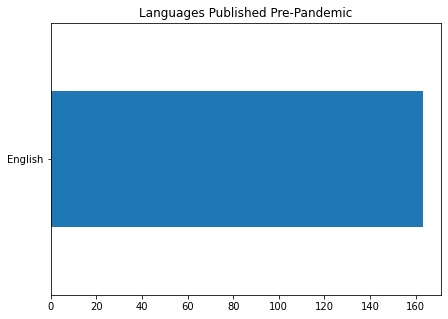

In [ ]:
# find uinque values in Language
print('Language in df19: ',df19['Language'].unique())
print('Language in df22: ',df22['Language'].unique())

# Replace value 'eng' with 'English' in Language
df19.replace({'eng':'English'}, inplace = True)
df22.replace({'eng':'English'}, inplace = True)

# Find number of docs with nan language:
if df22['Language'].isna().any():
    lang22_nan_index = df22[df22['Language'].isna()].index
    print('\nDetected NaN language type in df22')
if df19['Language'].isna().any():
    lang19_nan_index = df19[df19['Language'].isna()].index
    print('Detected NaN Language type in df19')

# find uinque values in Language
print('\nAfter replacement:')
print('Language in df19: ',df19['Language'].unique())
print('Language in df22: ',df22['Language'].unique())

#Find frequency of each language
print('The frequency of each language pre-pandemic: ',df19['Language'].value_counts())
ax = df19['Language'].value_counts().plot(kind = 'barh', title='Languages Published Pre-Pandemic', figsize=(7,5))
ax.figure.savefig(out_img_dir + 'lang-freq-19.jpg', bbox_inches='tight', dpi=150)

## **Removing non-English docs**

In [ ]:
# detecting language from the abstract of NaN lang from df22
# If they are english, label them accordingly
from langdetect import detect

for index in lang22_nan_index:
    #print(df22.loc[index][['Language', 'Title', 'Abstract']])
    abstract = df22.loc[index]['Abstract']
    if type(abstract) is str:
        lang = detect(abstract)
        if lang != 'en':
            print('Non-English detected: {} at index {}'.format(lang, index) )

# no non-english found, so label all NaN doc into English doc
df22['Language'].fillna('English', inplace=True)
df22['Language'].unique()

array(['English', 'French', 'Arabic', 'English; French', 'Greek',
       'Italian', 'Portuguese', 'Spanish',
       'Romanian; Moldavian; Moldovan', 'Russian', 'Polish',
       'English; Portuguese; Spanish', 'English; Portuguese',
       'English; Spanish', 'English; Italian', 'Turkish', 'German',
       'Afrikaans', 'Persian', 'Bosnian', 'Malay', 'Bulgarian', 'Czech',
       'English; Bosnian; Croatian', 'English; German', 'English; Polish',
       'Slovak', 'Chinese'], dtype=object)

In [ ]:
# Check the abstract of non-English docs to see if they are English. Otherwise, drop them out of df
non_eng_index = []
for index in df22[df22['Language'] != 'English'].index:
    abstract = df22.loc[index]['Abstract']
    if type(abstract) is str and abstract != '[No abstract available]':
        lang =  detect(abstract)
        if lang != 'en':
            print('Detected {} abstract from index {}'.format(lang, index))
            non_eng_index.append(index)
    elif abstract == '[No abstract available]': # Check the title language  in   docs that do not have an abstract
         if lang != 'en':
            print('Detected {} Title from index {}'.format(detect(df22.loc[index]['Title']), index))
            non_eng_index.append(index)
         
for i in non_eng_index:
    print('Index: ', i)
    print(df22.loc[i][['Title', 'Abstract']].values)
print('\nNumber of non-English docs to drop: {} \n df22 Size before dropping {}'.format(len(non_eng_index), len(df22)))

# Drop non-Eng docs
df22.drop(non_eng_index, inplace=True)

print('df22 Size after dropping: ', len(df22))

Detected fr abstract from index 4895
Detected fr abstract from index 4963
Detected es abstract from index 6293
Detected fr abstract from index 6393
Index:  4895
["In old people's homes, carers face Covid-19 [En Ehpad, les soignants face à la Covid-19]"
 "Many ethical issues were raised by the pandemic crisis. Caregivers were under great pressure and stress in their work in residential care facilities for the dependent elderly (Ehpad), both with residents and their families. The implementation of ethical support tools was only gradual, particularly for the management of residents’ deaths. Anxiety has set in among all the people working or living in the Ehpad, blurring interpersonal relations and increasing tensions and professional exhaustion. © 2022z De nombreux problèmes éthiques ont été soulevés par la crise pandémique liée à la Covid-19 z Les soignants ont été fortement sollicités et stressés dans leur travail en établissement d'hébergement pour personnes âgées dépendantes (Ehpad), 

The frequency of each language post-pandemic: 
 English                          6923
Italian                            44
Russian                            26
Portuguese                         21
Spanish                            15
German                             10
French                              8
Bosnian                             5
English; French                     4
Persian                             4
English; Spanish                    3
English; Italian                    3
English; Portuguese                 2
Polish                              2
Turkish                             2
Romanian; Moldavian; Moldovan       2
Arabic                              2
Bulgarian                           2
Czech                               2
English; German                     2
English; Portuguese; Spanish        1
Afrikaans                           1
Greek                               1
Malay                               1
English; Bosnian; Croatian          1
En

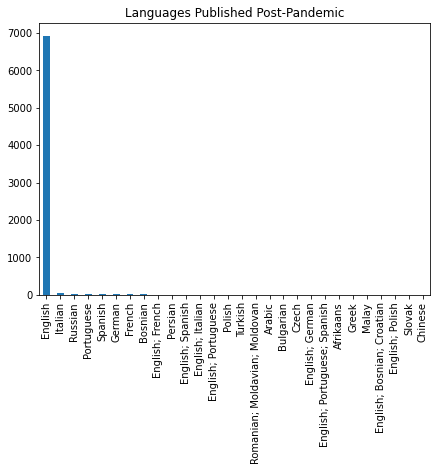

In [ ]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

print('The frequency of each language post-pandemic: \n', df22['Language'].value_counts())
ax = df22['Language'].value_counts().plot(kind = 'bar', title='Languages Published Post-Pandemic', figsize=(7,5))
ax.figure.savefig(out_img_dir + 'lang-freq-22.jpg', bbox_inches='tight', dpi=150)

## **Number of publications per year**

Pre-pandemic publications:  2018    46
2017    40
2016    39
2019    38
Name: Year, dtype: int64


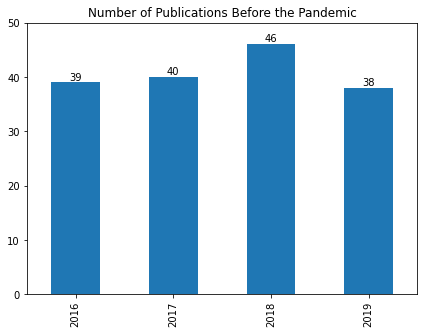

In [ ]:
print('Pre-pandemic publications: ', df19['Year'].value_counts())
data = df19['Year'].value_counts().sort_index()
ax = data.plot.bar( title='Number of Publications Before the Pandemic', figsize=(7,5))
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x()+0.25, p.get_height() * 1.01), ha='center')
ax.set_ylim(top=50)
ax.figure.savefig(out_img_dir+'docs-freq-19.jpg', bbox_inches='tight', dpi=150)


Pre-pandemic publications:  2021    3118
2022    2458
2020    1508
2023       6
Name: Year, dtype: int64


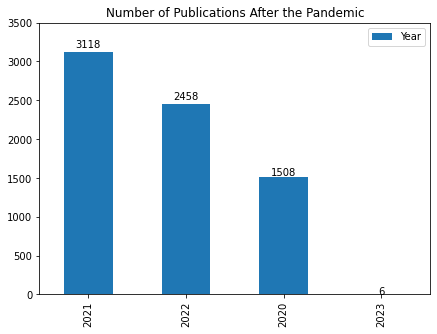

In [ ]:
print('Pre-pandemic publications: ', df22['Year'].value_counts())
data = df22['Year'].value_counts().to_frame()
ax = data.plot(kind='bar', title='Number of Publications After the Pandemic', figsize=(7,5))
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x()+0.25, p.get_height() *1.02), ha='center')
ax.set_ylim(top=3500)
ax.figure.savefig(out_img_dir+'docs-freq-22.jpg', bbox_inches='tight', dpi=150)

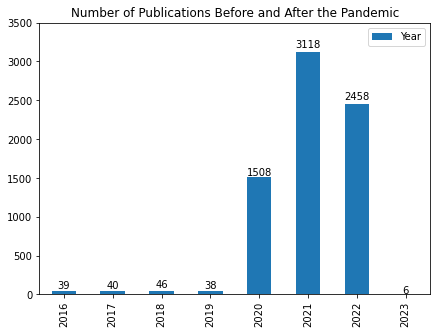

In [ ]:
year_pubs = df22['Year'].value_counts()
year_pubs = year_pubs.append(df19['Year'].value_counts()).sort_index().to_frame()
ax=year_pubs.plot(kind = 'bar', title='Number of Publications Before and After the Pandemic', figsize=(7,5))
count = 0
for p in ax.patches:
  if count < 4 or count > 6:
    txt_h = 2
  else:
    txt_h = 1.02  
  count+=1
  ax.annotate(str(p.get_height()), (p.get_x()+0.25, p.get_height() *txt_h), ha='center')
ax.set_ylim(top=3500)
ax.figure.savefig(out_img_dir+'all-docs-freq.jpg',bbox_inches='tight', dpi=150)

## **Journal Titles**

Journal Frequency Pre-Pandemic:  Proceedings of the International ISCRAM Conference                                                                                      16
Conference on Human Factors in Computing Systems - Proceedings                                                                          11
Proceedings of the ACM Conference on Computer Supported Cooperative Work, CSCW                                                           8
Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)     7
Proceedings of the ACM on Human-Computer Interaction                                                                                     6
                                                                                                                                        ..
Proceedings of the 5th ACM SIGSPATIAL International Workshop on the Use of GIS in Emergency Management, EM-GIS 2019                  

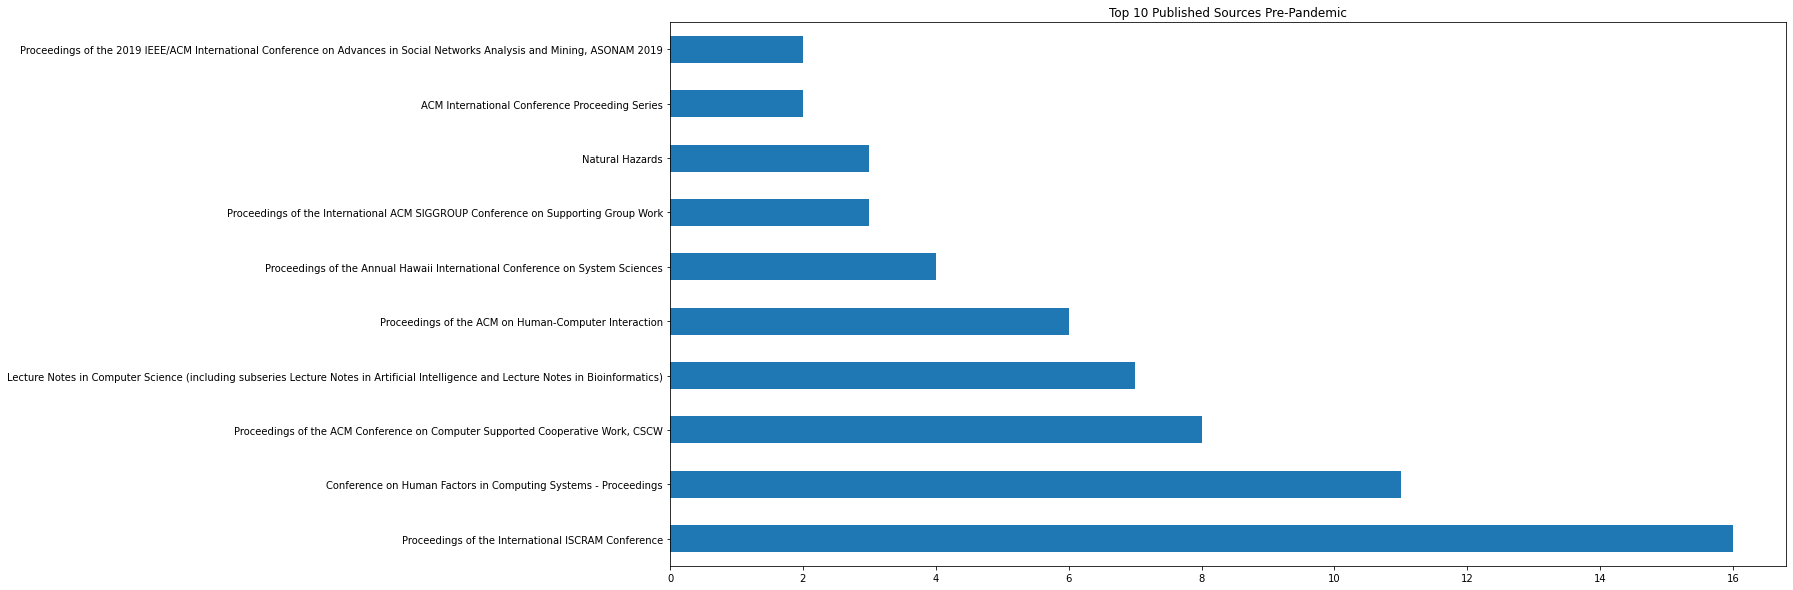

In [ ]:
print('Journal Frequency Pre-Pandemic: ', df19['Source Title'].value_counts())
ax = df19['Source Title'].value_counts()[:10].plot(kind = 'barh', title='Top 10 Published Sources Pre-Pandemic', figsize=(20,10))

ax.figure.savefig(out_img_dir+'top10-sources-19.jpg', bbox_inches='tight', dpi=150)

data = df19['Source Title'].value_counts()[:10].to_frame()
plt.figure(figsize=(20,10))
ax = plt.barh(data.index, data['Source Title'])
plt.title('Top 10 Published Sources Pre-Pandemic')
plt.xlabel('# Published Articles')
# Iterrating over the bars one-by-one
count = 0
for bar in ax.patches:
  plt.annotate(str(bar.get_y()),
                   (bar.get_width(), bar.get_x() + bar.get_width()), ha='center', va='center',
                   size=15, xytext=(0, 15),
                   textcoords='offset points')
  count += 1
plt.show()

Journal Frequency Post-Pandemic:  International Journal of Environmental Research and Public Health                                           283
Frontiers in Psychology                                                                                     177
PLoS ONE                                                                                                    127
Frontiers in Public Health                                                                                   94
Environmental Science and Pollution Research International                                                   53
                                                                                                           ... 
Systematic Reviews                                                                                            1
Health Psychology Open                                                                                        1
The Innovation                                                        

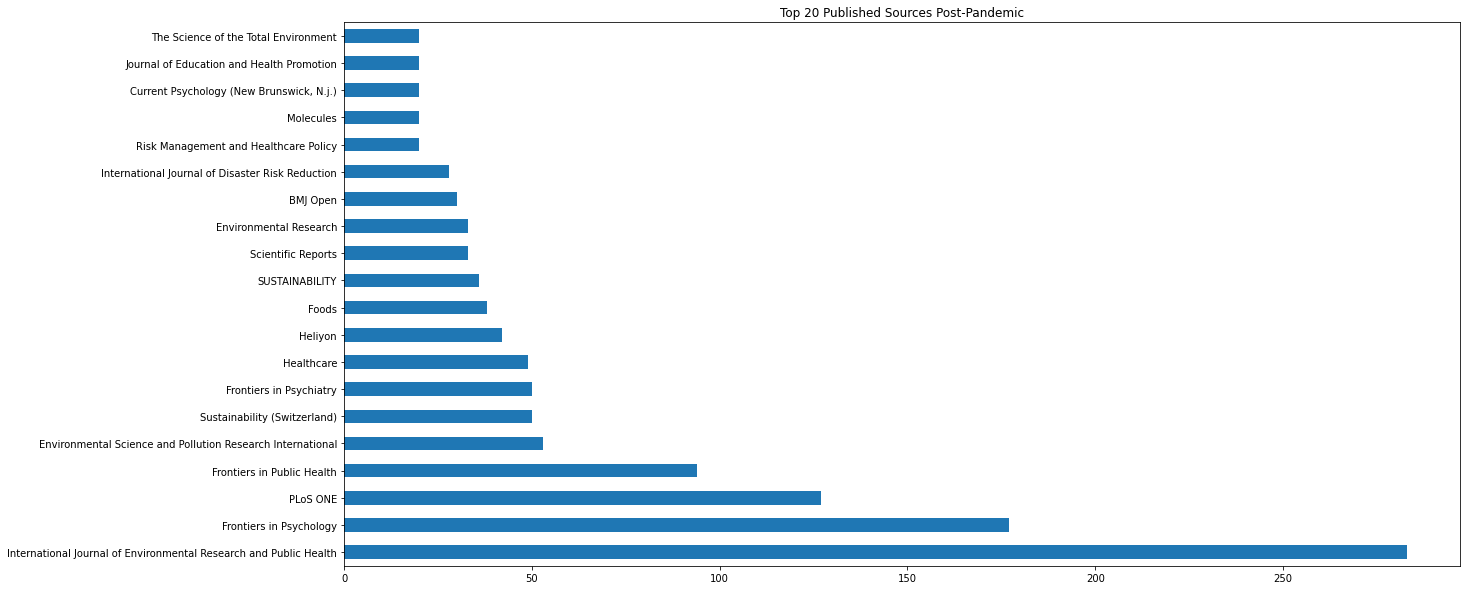

In [ ]:
print('Journal Frequency Post-Pandemic: ', df22['Source Title'].value_counts())
ax = df22['Source Title'].value_counts()[:20].plot(kind = 'barh', figsize=(20,10), title='Top 20 Published Sources Post-Pandemic')
ax.figure.savefig(out_img_dir+'top20-sources-22.jpg', bbox_inches='tight', dpi=150)


In [ ]:
df19['Source Title'].value_counts()[:20]

Proceedings of the International ISCRAM Conference                                                                                             16
Conference on Human Factors in Computing Systems - Proceedings                                                                                 11
Proceedings of the ACM Conference on Computer Supported Cooperative Work, CSCW                                                                  8
Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)            7
Proceedings of the ACM on Human-Computer Interaction                                                                                            6
Proceedings of the Annual Hawaii International Conference on System Sciences                                                                    4
Proceedings of the International ACM SIGGROUP Conference on Supporting Group Work                                           

In [ ]:
df22['Source Title'].value_counts()[:30]

International Journal of Environmental Research and Public Health    283
Frontiers in Psychology                                              177
PLoS ONE                                                             127
Frontiers in Public Health                                            94
Environmental Science and Pollution Research International            53
Sustainability (Switzerland)                                          50
Frontiers in Psychiatry                                               50
Healthcare                                                            49
Heliyon                                                               42
Foods                                                                 38
SUSTAINABILITY                                                        36
Scientific Reports                                                    33
Environmental Research                                                33
BMJ Open                                           

## **Authors**

In [ ]:
df19.to_csv(OUT+'processed_df19.csv', index=False)
df22.to_csv(OUT+'processed_df22.csv', index=False)
df19.reset_index(drop='True', inplace=True)
df22.reset_index(drop='True', inplace=True)

type(df19['Authors'][0])

list

In [ ]:
import ast

# Converting string to list
def convert_str_to_list(df):
  cols = ['Authors', 'Institutions', 'Affiliations', 'Countries']
  for c in cols:
   # print('Column: ', c)
    for index in range(len(df[c])):
      #print(df['Institutions'][index], type(df['Institutions'][index])) 
      if type(df[c][index]) is str and len(df[c][index]) >0:
        df[c][index] = ast.literal_eval(df[c][index])
        #print('Converted to: ',type(df[c][index])) 
  return df

df19 =  convert_str_to_list(df19)
df22 =  convert_str_to_list(df22)

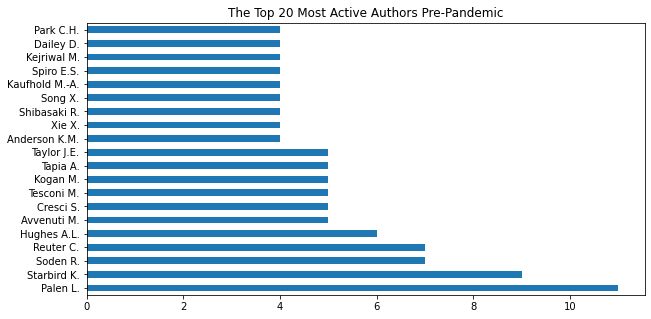

In [ ]:

author_list = sum(df19['Authors'], [])
authors19 = pd.Series(author_list)
ax = authors19.value_counts()[:20].plot(kind = 'barh', figsize=(10,5), title='The Top 20 Most Active Authors Pre-Pandemic')
ax.figure.savefig(out_img_dir+'top-authors-19.jpg',bbox_inches='tight', dpi=150)

<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-43-b3de5c57b243>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if authors is not 'Unknown':


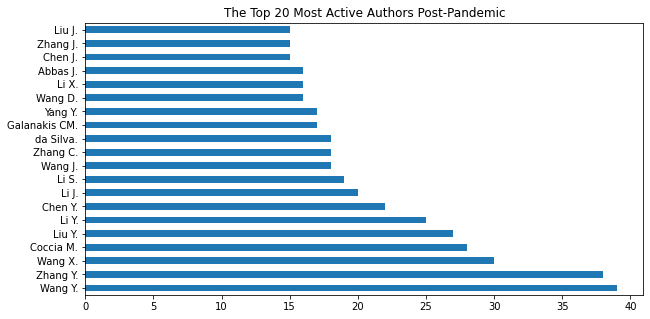

In [ ]:
# replace empty authors with Unknown
df22['Authors'].replace({'': ['Unknown']}, inplace=True)
# Append all authors post-pandemic to a list
author_list = []
for authors in df22['Authors']:
  if authors is not 'Unknown':
    author_list += authors

authors22 = pd.Series(author_list)
ax = authors22.value_counts()[:20].plot(kind = 'barh', figsize=(10,5), title='The Top 20 Most Active Authors Post-Pandemic')
ax.figure.savefig(out_img_dir+'top-authors-22.jpg', bbox_inches='tight', dpi=150)

In [ ]:
# Look at the most active authors in each df

def analyze_authors(df, authors_yr):
  top20_authors = authors_yr.value_counts()[:20].index
  print('Top 20 active authors: ',top20_authors)
  firstauthor_count  = dict.fromkeys(top20_authors, 0) # a dict with author name as key and their number of first-author docs count as key
  singleauthor_count = dict.fromkeys(top20_authors, 0)
  collab_authors     = dict.fromkeys(top20_authors, []) 

  # Iterating through a list of documents to get a list of authors
  for authors in df['Authors']:
    #print(authors)
    if len(authors) > 0:
      # Check if the first author name is in the top20 authors: 
      if authors[0] in top20_authors:
          if len(authors) == 1: # if his name appears at index 0 and he's the only one in the list --> he is single-athour
            singleauthor_count[authors[0]] += 1
            #print('Found an active author {} as single-author in {}'.format(authors[0], authors))            
          else:     # if an author appear at index 0 and there are more than 1 authors--> he is the first author, get his collaborators
            #print('Found an active author {} as first author in {}'.format(authors[0], authors))
            firstauthor_count[authors[0]] += 1
            collab_authors[authors[0]] = authors[1:] # add all his collaborators to coauthors dict
  return firstauthor_count, singleauthor_count #coauthors_count

# Convert top authors and their documents counts in a df
def exportDocCounts(authors_yr, singleauthor_count, firstauthor_count, coauthors_count, yr):
  authors_yr = authors_yr.value_counts()[:20].to_dict()
  top20authors_list = [authors_yr, singleauthor_count, firstauthor_count, coauthors_count]
  top20authors_list

  data = pd.DataFrame(top20authors_list)
  data = data.T.rename(columns={0: 'Total', 1:'Single_authored', 2:'First_authored', 3:'Coauthored'})
  data.to_csv(OUT+'authorsdf{}.csv'.format(yr), index=True)
  return data


def get_coauthor_count(authors_yr, singleauthor_count, firstauthor_count):
  top20authors = authors_yr.value_counts()[:20]
  coauthors_count  = dict.fromkeys(top20authors.index, 0)
  for key in coauthors_count.keys():
      coauthors_count[key] = top20authors[key] - singleauthor_count[key] - firstauthor_count[key]
  return coauthors_count

        
# Look at the most active authors in df19
firstauthor_count19, singleauthor_count19 = analyze_authors(df19, authors19)

# Look at the most active authors in df22
firstauthor_count22, singleauthor_count22 = analyze_authors(df22, authors22)

# Get the coauthors count of the top 20 authors
coauthors_count19 = get_coauthor_count(authors19, singleauthor_count19, firstauthor_count19)
coauthors_count22 = get_coauthor_count(authors22, singleauthor_count22, firstauthor_count22)

# Export the authorship information of the top 20 authors
authors19_df = exportDocCounts(authors19, singleauthor_count19, firstauthor_count19, coauthors_count19, 19)
authors22_df = exportDocCounts(authors22, singleauthor_count22, firstauthor_count22, coauthors_count22, 22)

coauthors_count19, coauthors_count22

Top 20 active authors:  Index(['Palen L.', 'Starbird K.', 'Soden R.', 'Reuter C.', 'Hughes A.L.',
       'Avvenuti M.', 'Cresci S.', 'Tesconi M.', 'Kogan M.', 'Tapia A.',
       'Taylor J.E.', 'Anderson K.M.', 'Xie X.', 'Shibasaki R.', 'Song X.',
       'Kaufhold M.-A.', 'Spiro E.S.', 'Kejriwal M.', 'Dailey D.',
       'Park C.H.'],
      dtype='object')
Top 20 active authors:  Index(['Wang Y.', 'Zhang Y.', 'Wang X.', 'Coccia M.', 'Liu Y.', 'Li Y.',
       'Chen Y.', 'Li J.', 'Li S.', 'Wang J.', 'Zhang C.', 'da Silva.',
       'Galanakis CM.', 'Yang Y.', 'Wang D.', 'Li X.', 'Abbas J.', 'Chen J.',
       'Zhang J.', 'Liu J.'],
      dtype='object')


({'Palen L.': 8,
  'Starbird K.': 8,
  'Soden R.': 2,
  'Reuter C.': 4,
  'Hughes A.L.': 5,
  'Avvenuti M.': 0,
  'Cresci S.': 5,
  'Tesconi M.': 5,
  'Kogan M.': 2,
  'Tapia A.': 5,
  'Taylor J.E.': 5,
  'Anderson K.M.': 4,
  'Xie X.': 4,
  'Shibasaki R.': 4,
  'Song X.': 0,
  'Kaufhold M.-A.': 3,
  'Spiro E.S.': 4,
  'Kejriwal M.': 0,
  'Dailey D.': 1,
  'Park C.H.': 0},
 {'Wang Y.': 30,
  'Zhang Y.': 28,
  'Wang X.': 23,
  'Coccia M.': 9,
  'Liu Y.': 21,
  'Li Y.': 21,
  'Chen Y.': 19,
  'Li J.': 13,
  'Li S.': 13,
  'Wang J.': 16,
  'Zhang C.': 12,
  'da Silva.': 17,
  'Galanakis CM.': 10,
  'Yang Y.': 14,
  'Wang D.': 13,
  'Li X.': 12,
  'Abbas J.': 12,
  'Chen J.': 13,
  'Zhang J.': 10,
  'Liu J.': 12})

## **Affiliations**

**Countries**

In [ ]:

def plot_freq(df, yr, name, pad):
  countries = sum(df, [])
  countries = pd.Series(countries)
  if yr == 19:  period = 'Pre-Pandemic'; 
  else: period = 'Post-Pandemic';        
  ax = countries.value_counts()[:20].plot(kind = 'bar', figsize=(10,5), title='Top 20 Active {} in Publishing Articles {}'.format(name, period))
  for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.25, p.get_height() + pad), ha='center')
  ax.figure.savefig(out_img_dir+'top-{}-{}.jpg'.format(name,yr),bbox_inches='tight', dpi=150)


# condense df[Countries] into a set to only get unique countries
def condense_country_to_set(df):
  set_countries = []
  for listofcountries in df:
    if len(listofcountries) > 1:
      set_countries.append(set(listofcountries))
    else:
      set_countries.append(set())
  countries = [list(i) for i in set_countries]
  return countries

set_countries19 = condense_country_to_set(df19['Countries'])
df19['Countries' ] = list(set_countries19)

set_countries22 = condense_country_to_set(df22['Countries'])
df22['Countries' ] = list(set_countries22)


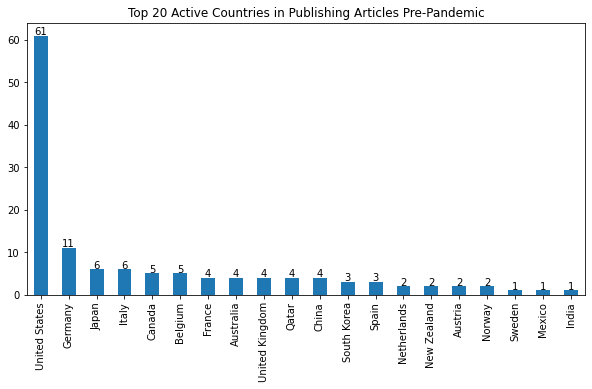

In [ ]:
plot_freq(df19['Countries'], 19, 'Countries', pad=0.2)

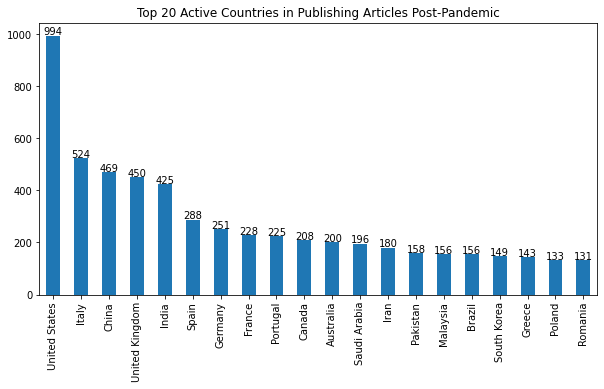

In [ ]:
plot_freq(df22['Countries'], 22, 'Countries', pad=2.5)

**Institutions**

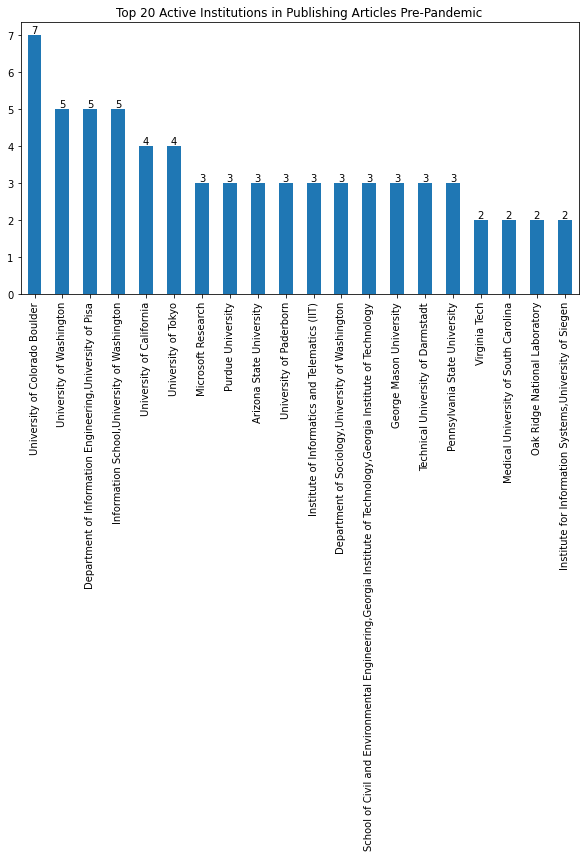

In [ ]:
set_insti19 = condense_country_to_set(df19['Institutions'])
df19['Institutions' ] = set_insti19
plot_freq(df19['Institutions'], 19, 'Institutions', pad=0.06)


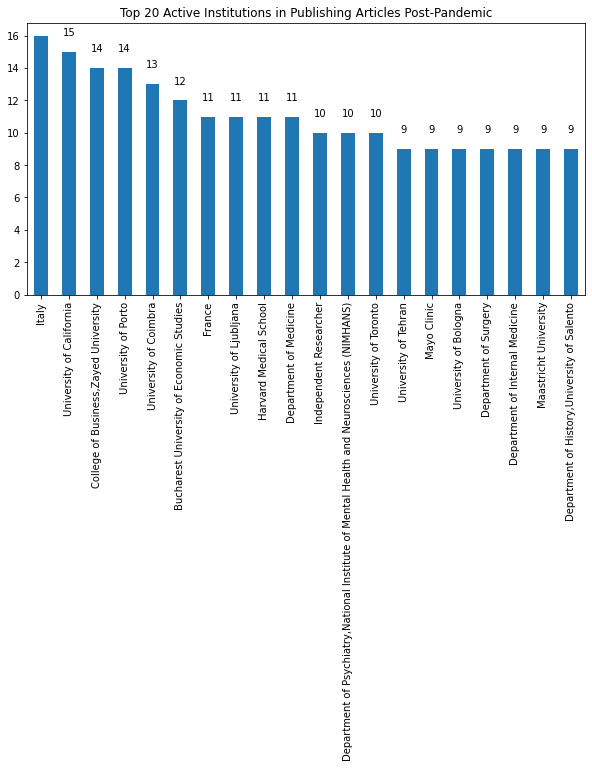

In [ ]:
set_insti22 = condense_country_to_set(df22['Institutions'])
df22['Institutions' ] = set_insti22
plot_freq(df22['Institutions'], 22, 'Institutions', pad = 1)

# **Export dfs**

In [ ]:
def join_str(df):
  df_copy = df.copy()
  df_copy['Institutions'] = df['Institutions'].apply(lambda x: '; '.join(x) if type(x) is not float else '')#changed from ,
  df_copy['Countries']    = df['Countries'].apply(lambda x: ', '.join(x)    if type(x) is not float else '')
  df_copy['Authors']      = df['Authors'].apply(lambda x: ', '.join(x)      if type(x) is not float else '') # sep by ,
  df_copy['Affiliations'] = df['Affiliations'].apply(lambda x: '; '.join(x) if type(x) is not float else '') #sep by ;
  return df_copy

df19_copy  = join_str(df19)
df22_copy  = join_str(df22) 
# export csv
df19_copy.to_csv(OUT+'vos_df19.csv', index=None)
df22_copy.to_csv(OUT+'vos_df22.csv', index=None)

In [ ]:

if not os.path.exists('processed_df/'):  os.makedirs('processed_df/')
df19copy = df19.copy()
df22copy = df22.copy()
lang
# Combine list of str to a big str, unless the author name is Unknown
df19copy['Authors']=df19copy['Authors'].apply(lambda x: ', '.join(x))
df22copy['Authors']=df22copy['Authors'].apply(lambda x: ', '.join(x) if x !='Unknown' else 'Unknown')

df19copy.to_csv('processed_df/processed_df19.csv', index=False)
df22copy.to_csv('processed_df/processed_df22.csv', index=False)
df22copy[df22copy['Authors'] != 'Unknown'].to_csv('processed_df/filteredunknown_df22.csv', index=False)

In [ ]:
import re
s = 'In December 2019, news broke out from the World Health Organisation (WHO), with the first outbreak of coronavirus disease 2019 (COVID-19) in Wuhan, China'
filt =  df22['Abstract'] == s
for index, row in df22.iterrows():
  #print(type(s), type(i), i)
  if type(row['Abstract']) is not float:
    if s in row['Abstract']:
      print(index, df22.iloc[index])
  #break
#df22[filt]


5415 Authors                      [Jallow H., Renukappa S., Suresh S.]
Title           The impact of COVID-19 outbreak on United King...
Year                                                         2021
Source Title              Smart and Sustainable Built Environment
Abstract        Purpose: In December 2019, news broke out from...
PMID                                                          NaN
Language                                                  English
Affiliations    [Costain Plc, London, United Kingdom, Faculty ...
Institutions                                                   []
Countries                                        [United Kingdom]
Addresses                                                     NaN
Name: 5415, dtype: object


### Drill down to the most active authors


1.   How many articles are single-authored by that author?
2.   How many articles where he/she is the first author?
3.   How many articles where he/she is the co-author?
4.   Who did he/she collab with?
5.   Who are the most active-first authors?



In [ ]:
authors19_df

Total  Single_authored  First_authored  Coauthored
Palen L.           11                0               3           8
Starbird K.         9                0               1           8
Soden R.            7                1               4           2
Reuter C.           7                0               3           4
Hughes A.L.         6                0               1           5
Kogan M.            5                1               2           2
Tesconi M.          5                0               0           5
Taylor J.E.         5                0               0           5
Avvenuti M.         5                0               5           0
Cresci S.           5                0               0           5
Tapia A.            5                0               0           5
Anderson K.M.       4                0               0           4
Song X.             4                0               4           0
Dailey D.           4                0               3           1
Spiro E.S.          4                0               0           4
Kejriwal M.         4                0               4           0
Park C.H.           4                0               4           0
Kaufhold M.-A.      4                0               1           3
Xie X.              4                0               0           4
Shibasaki R.        4                0               0           4

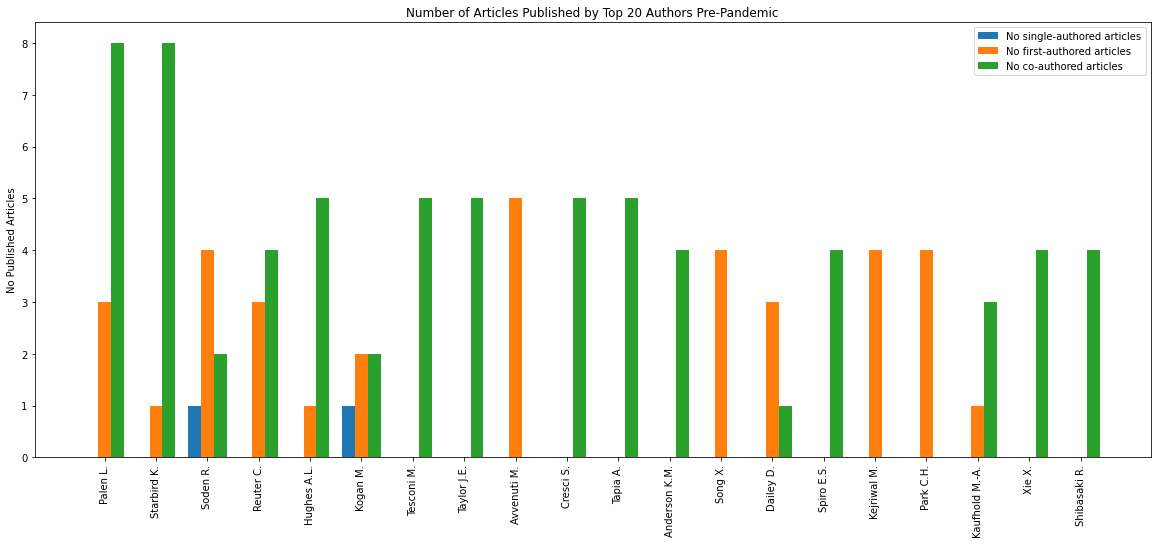

In [ ]:
import numpy as np
def plotbarfromdict(coauthor, firstauthor, singleauthor, period):
  plt.figure(figsize(20,8))
  names   = list(coauthor.keys())
  x       = np.arange(0, len(names),0.5)
  width = 0.5
  r1 = np.arange(0,len(names)*2,2) #r1 was reset 
  r2 = [x + width for x in r1]
  r3 = [x + width for x in r2]

  values1 = list(singleauthor.values())
  values2 = list(firstauthor.values())
  values3 = list(coauthor.values())

  plt.bar(r1, values1, width,  label='No single-authored articles')
  plt.bar(r2, values2, width,  label='No first-authored articles')
  plt.bar(r3, values3, width,  label='No co-authored articles')
  plt.xticks([r + width for r in range(0,len(names)*2,2)], names, rotation=90)
  plt.legend()
  plt.ylabel('No Published Articles')
  if period == 19: title = 'Pre-Pandemic'
  else: title = 'Post-Pandemic'
  plt.title('Number of Articles Published by Top 20 Authors ' + title)
  plt.savefig(out_img_dir+'top20authors-analysis-{}.jpg'.format(period),bbox_inches='tight', dpi=200)
  plt.show()

plotbarfromdict(coauthors_count19, firstauthor_count19, singleauthor_count19, 19)

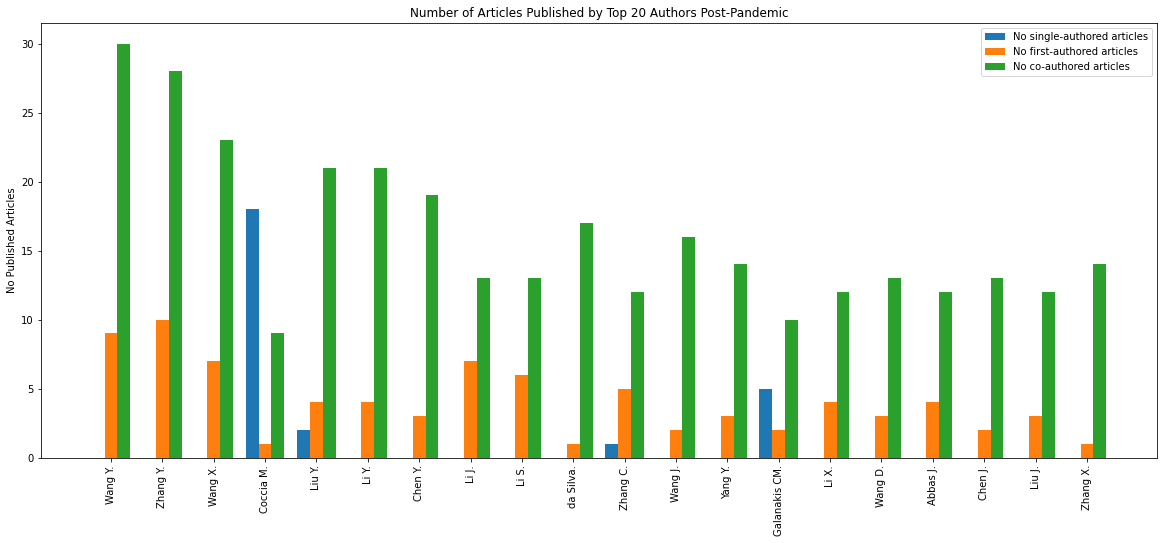

In [ ]:
plotbarfromdict(coauthors_count22, firstauthor_count22, singleauthor_count22, 22)

In [ ]:
collab_authors     = dict.fromkeys(top20_authors19, []) 
l = ['A', 'B', 'C']; a = set(['D', 'E', 'F'])
collab_authors['Palen L.'] = l[1:]
collab_authors['Palen L.'] += [i for i in a]
collab_authors

NameError: ignored

# use metaknowledge
#!pip install metaknowledge
import metaknowledge as mk
RC = mk.RecordCollection("pmc-crisisinformatics_16_19.txt")


In [ ]:
  # Else if he as coauthors are in the top authors --> how many articles did he co-author?
    #elif len(set(authors).intersection(set(top20_authors19))) > 0: 
       
 # check if the coauthors are in the top 20 
        topcoauthor_set = set(authors).intersection(set(top20_authors19))
        topcoauthor = authors.index(topcoauthor_set)
        if len(topcoauthor_set) == 1:
            print('Found an active author {} as coauthor in {}'.format(topcoauthor_set, authors))
            collaborators = set(authors)-topcoauthor_set  # collaborators of the target author
            if len(collaborators) == 1:
                print('single colaborator: ', collaborators)
                collab_authors[topcoauthor].append( collaborators[0])
                coauthors[topcoauthor] += 1
            elif len(collaborators) > 1:
                for a in topcoauthor_set: # add coauthors to every single top-coauthor, the added author may already existed, count the number of existence later to get frequency of collab
                  collab_authors[a] += [c for c in collaborators]
            else: # len(collaborators) ==0   empty set --> all authors are top active authors, add all of them as their collab_authors
                for a in authors: # add coauthors to every single top-coauthor, the added author may already existed, count the number of existence later to get frequency of collab
                  collab_authors[a] += [c for c in authors]
        elif len(topcoauthor_set) > 1:
            print('Found multiple active authors {} as coauthors in {}'.format(topcoauthor_set, authors))

# **Applying keyword extraction**

In [ ]:
from keybert import KeyBERT

kw_model = KeyBERT()

df22_sample = df22.sample(frac = 0.05)
len(df22_sample)

## **Save data and keywords**

In [ ]:
# Join all titles together per period and run KeyBERT. Do the same thing with Abstracts
titles19    = ';'.join(df19['Title'])
abstracts19 = ';'.join(df19['Abstract'].astype(str))

titles22    = ';'.join(df22['Title'])
abstracts22 = ';'.join(df22['Abstract'].astype(str))
abstracts22_sample =  ';'.join(df22_sample['Abstract'].astype(str))

# Save to files:
f = open('titles19.txt', 'w')
f.write(titles19)
f.close()

f = open('titles22.txt', 'w')
f.write(titles22)
f.close()

f = open('abstracts19.txt', 'w')
f.write(abstracts19)
f.close()

f = open('abstracts22.txt', 'w')
f.write(abstracts22)
f.close()

f = open('abstracts22_sample.txt', 'w')
f.write(abstracts22_sample)
f.close()

# save 3 dfs in csv files
if not os.path.exists('df/'): os.makedirs('df/')
pmc19_df.to_csv('df/pmc19_df.csv', index =False, header=True, sep=',')
pmc22_df.to_csv('df/pmc22_df.csv', index =False, header=True, sep=',')
scopus19_df.to_csv('df/scopus19_df.csv', index =False, header=True, sep=',')
scopus22_df.to_csv('df/scopus22_df.csv', index =False, header=True, sep=',')
wos19_df.to_csv('df/wos19_df.csv', index =False, header=True, sep=',')
wos22_df.to_csv('df/wos22_df.csv', index =False, header=True, sep=',')

In [ ]:
keywords_title19 = kw_model.extract_keywords(titles19, keyphrase_ngram_range=(1, 3),\
                                      stop_words= 'english', use_mmr=True, diversity=0.7, top_n = 50)
keywords_title19


In [ ]:
keywords_title22 = kw_model.extract_keywords(titles22, keyphrase_ngram_range=(1, 3),\
                                      stop_words= 'english', use_mmr=True, diversity=0.7, top_n = 50)
keywords_title22


In [ ]:

keywords_abstract19 = kw_model.extract_keywords(abstracts19, keyphrase_ngram_range=(1, 3),\
                                      stop_words= 'english', use_mmr=True, diversity=0.7, top_n = 50)

keywords_abstract19

In [ ]:

keywords_abstract22 = kw_model.extract_keywords(abstracts22, keyphrase_ngram_range=(1, 3),\
                                      stop_words= 'english', use_mmr=True, diversity=0.7, top_n = 50)

keywords_abstract22

# **Create Word Cloud of Keywords**

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def create_wordcloud(kw_list, filename):
  #convert list to string and generate
  unique_string=(" ").join(kw_list)
  wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
  plt.figure(figsize=(15,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.savefig("{}-nostopwords.png".format(filename), bbox_inches='tight')
  plt.show()
  plt.close()

file_list = ['kw-titles19.txt', 'kw-titles22.txt', 'kw-abstracts19.txt', 'kw-abstracts22_sample.txt']
for file in file_list:
  f = open(file, 'r')
  kw_list = [line.rstrip() for line in f] # stripping \n from each line and read the lines into a list
  print('Creating wordcloud for {}'.format(file))
  create_wordcloud(kw_list, file)


In [ ]:
import gzip
f = gzip.open('all-titles.txt.gz', 'wt')
f.write(titles) #([i for i in j[0] for j in keywords_title])
f.close()

f = gzip.open('all-abstracts.txt.gz', 'wt')
f.write(abstracts) #([i for i in j[0] for j in keywords_title])
f.close()

In [ ]:
abstracts

unique_doc = df.index.drop_duplicates(keep= 'first')
df.loc[unique_doc]

In [ ]:
!gunzip all-abstracts.txt.gz

In [ ]:
import gzip

f = gzip.GzipFile('extracted-kw.txt', 'rb')
f.close()

In [ ]:
import os
os.listdir()

In [ ]:
kw = [('stage colorectal cancer', 0.0631), ('binding domain', 0.0573), ('phase does', 0.0548), ('causes origins', 0.0547), ('abdominal aortic aneurysm', 0.0516), ('epilepsy maintained ketogenic', 0.029), ('outlook forced remote', 0.0253)]
print(kw)

In [ ]:
k = [i[0] for i in kw]
for i in kw:
  print(i[0])
k

In [ ]:
with open('out.txt', 'w') as f:
   for i in kw:
      f.write('{}\n'.format(i[0]))
f.close()

In [ ]:
s = 'all_abstracts.txt'
s.split('_')[1]